<a href="https://colab.research.google.com/github/PosgradoMNA/Zayra-Annette-Lopez-Regalado-A00544748-Actividades-de-aprendizaje/blob/main/Avance4_28Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TC5035.10
### Proyecto Integrador

<br>

#### Avance 4. Modelos alternativos
<br>

Este avance implica construir múltiples modelos (individuales, no ensambles) relevantes para resolver el problema y evaluar su desempeño. Diferentes algoritmos pueden comportarse de manera óptima en diferentes tipos de datos o tareas. La construcción de modelos alternativos permite explorar y evaluar cuál de ellos proporciona el mejor rendimiento para un problema particular.

Además, los modelos se pueden ajustar para determinar si se puede mejorar su rendimiento. Diferentes configuraciones de hiperparámetros pueden afectar significativamente el rendimiento de un modelo. Construir modelos alternativos implica explorar y ajustar estos hiperparámetros para encontrar la configuración óptima.

Las siguientes son acciones que deberás abordar en este avance:

Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
Comparar el rendimiento de los modelos obtenidos.
Seleccionar los dos modelos que proporcionen el mejor rendimiento.
Ajustar los dos mejores modelos.
Elegir el modelo individual final.

# Integrantes del equipo:

*   Zayra Annette lopez Regalado - A00544748
*   Diego Alberto Olarte Mira - A01794028
*   Andres Javier Galindo Vargas - A01793927

Cargar Bases de Datos:


1.   Primera DB: Resultados de encuesta realizada antes de la pandemia
2.   Segunda DB: Resultados de encuesta realizada posterior a la pandemia


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
import warnings

# Omitir los warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [ ]:
primera_bd = pd.read_excel('/content/Primera BD.xlsx')
segunda_bd = pd.read_excel('/content/Segundo BD.xlsx')



Mostramos las primeras filas

In [ ]:
primera_bd.head()

Marca temporal  Edad       Sexo  SEXO CLAVE  \
0 2020-09-14 13:44:00.462    18  Masculino           1   
1 2020-09-14 13:44:05.584    18  Masculino           1   
2 2020-09-14 14:28:36.419    18  Masculino           1   
3 2020-09-14 14:28:42.086    18  Masculino           1   
4 2020-09-14 15:45:41.336    19  Masculino           1   

  ¿Actualmente vives con tus padres/tutor?    \
0                                         Si   
1                                         Si   
2                                         Si   
3                                         Si   
4                                         Si   

   ¿Actualmente vives con tus padres/tutor?  CLAVE ¿Vives solo?  \
0                                                1           No   
1                                                1           No   
2                                                1           No   
3                                                1           No   
4                                                1           No   

   ¿Vives solo? CLAVE ¿De qué estado eres?  ¿De qué estado eres? CLAVE  ...  \
0                   2           Nuevo León                          11  ...   
1                   2           Nuevo León                          11  ...   
2                   2           Nuevo León                          11  ...   
3                   2           Nuevo León                          11  ...   
4                   2           Nuevo León                          11  ...   

  PREG21  PREG22 PREG23  PREG24 PREG25  PUNTAJE TOTAL  [Embriología].1  \
0      4       4      4       4      4            100              NaN   
1      4       4      4       4      4            100              NaN   
2      4       4      4       4      4            100              NaN   
3      4       4      4       4      4            100              NaN   
4      4       4      4       4      4            100              NaN   

   [Bioquímica].1  reprobo 1   1 año atorados  
0             NaN           2               2  
1             NaN           2               2  
2             NaN           2               2  
3             NaN           2               2  
4             NaN           2               2  

[5 rows x 85 columns]

In [ ]:
segunda_bd.head()

Marca temporal Edad       Sexo  Sexo CLAVE  \
0 2021-03-16 12:16:01.184   19   Femenino           2   
1 2021-03-16 12:21:06.636   20   Femenino           2   
2 2021-03-16 12:39:40.592   18   Femenino           2   
3 2021-03-16 12:46:53.798   18  Masculino           1   
4 2021-03-16 12:47:33.993   19   Femenino           2   

  ¿Actualmente vives con tus padres/tutor?    \
0                                         Si   
1                                         No   
2                                         Si   
3                                         Si   
4                                         Si   

   ¿Actualmente vives con tus padres/tutor?  CLAVE ¿Vives solo?  \
0                                                1           No   
1                                                2           SI   
2                                                1           No   
3                                                1           No   
4                                                1           No   

   ¿Vives solo? CLAVE ¿De qué estado eres?  ¿De qué estado eres? CLAVE  ...  \
0                   2           Nuevo León                          11  ...   
1                   1           Tamaulipas                          19  ...   
2                   2              Jalisco                          10  ...   
3                   2      San Luis Potosí                          15  ...   
4                   2           Nuevo León                          11  ...   

  PREG18  PREG19 PREG20  PREG21 PREG22  PREG23 PREG24  PREG25 PUNTAJE TOTAL  \
0      2       2      2       1      3       1      3       3            62   
1      2       0      3       4      2       3      3       3            55   
2      3       1      3       1      1       3      2       3            48   
3      4       2      2       4      3       3      4       3            65   
4      3       3      3       3      3       3      3       3            75   

   reprobo 1er semestre?  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 85 columns]

Verificar tipos de datos

In [ ]:
primera_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 85 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype         
---  ------                                                                                                                                                    --------------  -----         
 0   Marca temporal                                                                                                                                            551 non-null    datetime64[ns]
 1   Edad                                                                                                                                                      551 non-null    int64         
 2   Sexo                                                                                                                              

In [ ]:
segunda_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 85 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype         
---  ------                                                                                                                                                    --------------  -----         
 0   Marca temporal                                                                                                                                            654 non-null    datetime64[ns]
 1   Edad                                                                                                                                                      654 non-null    object        
 2   Sexo                                                                                                                              

En la segunda_bd se identifica que la columna edad no esta de tipo numerico, por lo cual se debe hacer una revision y limpieza de los datos

## Renombrar variables

Renombrado de variables para que la interpretación sea más fácil en etapas posteriores

### Primera BD

In [ ]:
# Diccionario de mapeo de variables
variable_mapping = {
    "¿Actualmente vives con tus padres/tutor?  ": "v_padres/tutor",
    "¿Actualmente vives con tus padres/tutor?  CLAVE": "v_padres/tutor CLAVE",
    "¿Vives solo?": "v_solo",
    "¿Vives solo? CLAVE": "v_solo CLAVE",
    "¿De qué estado eres?": "estado",
    "¿De qué estado eres? CLAVE": "estado CLAVE",
    "Normalmente,  ¿cuánto tardas en llegar a la facultad?": "tiempo_llegada_facultad",
    "Normalmente,  ¿cuánto tardas en llegar a la facultad? CLAVE": "tiempo_llegada_facultad CLAVE",
    "¿Actualmente trabajas?": "empleo",
    "¿Actualmente trabajas? CLAVE": "empleo CLAVE",
    "¿Es la primera universidad a la que aplicaste? Si la respuesta es no ¿Cuántos intentos te tomó entrar a universidades previas? ": "intentos_ingreso_u_previas",
    "¿Es la primera universidad a la que aplicaste? Si la respuesta es no ¿Cuántos intentos te tomó entrar a universidades previas? CLAVE": "intentos_ingreso_u_previas CLAVE",
    "¿Cuántos intentos utilizaste para entrar a esta universidad?": "intentos_ingreso_u_actual",
    "¿Has dejado otra materia en la carrera? Si sí, ¿Cuál o Cuáles y en qué oportunidad la dejaste? (2 oportunidad, 3 oportunidad, 4 oportunidad, etc.)": "reprobo_materia",
    "¿Has dejado otra materia en la carrera? Si sí, ¿Cuál o Cuáles y en qué oportunidad la dejaste? (2 oportunidad, 3 oportunidad, 4 oportunidad, etc.) CLAVE": "reprobo_materia CLAVE",
    " [Embriología]": "embriologia",
    " [Bioquímica]": "bioquimica",
    " [Introducción a la medicina]": "Introducción a la medicina",
    " [Optativa 1 semestre]": "Optativa 1 semestre",
    " [Biología celular y tisular]": "Biología celular y tisular",
    " [IBC]": "IBC",
    " [Responsabilidad Social y Desarrollo Sustentable]": "Responsabilidad Social y Desarrollo Sustentable",
    " [Optativa 2 semestre]": "Optativa 2 semestre",
    " [ 1.Soy capaz de adaptarme a los cambios]": "1. adaptación_cambios",
    " [2.Tengo personas en las que puedo confiar y con las que me siento seguro]": "2. confianza_seguridad",
    " [3.Algunas veces dejo que el destino o Dios me ayude]": "3. destino_ayuda",
    " [4.Puedo resolver cualquier acontecimiento que se me presente]": "4. resolver_todo",
    " [5. Los éxitos pasados me ayudan a afrontar nuevos desafíos con confianza]": "5. éxitos_confianza",
    " [6. Veo el lado divertido de las cosas]": "6. lado_divertido",
    " [7. Afrontar el estrés, me fortalece]": "7. estrés_fortalece",
    " [8. Tiendo a recuperarme de las enfermedades o de las dificultades]": "8. recuperación_dificultades",
    " [9. Pienso que las cosas ocurren por alguna razón]": "9. razón_ocurren",
    " [10. Me esfuerzo al máximo en cada ocasión]": "10. esfuerzo_máximo",
    " [11. Puedo conseguir mis metas]": "11. conseguir_metas",
    " [12. Cuando parece que irremediablemente algo no tiene solución, no abandono]": "12. no_abandono",
    " [13. Sé dónde acudir a por ayuda]": "13. buscar_ayuda",
    " [14. Bajo presión, me concentro y pienso claramente]": "14. presión_concentración",
    " [15. Prefiero tomar la iniciativa cuando hay que resolver un problema]": "15. iniciativa_problemas",
    " [16. No me desanimo fácilmente por el fracaso]": "16. no_desánimo",
    " [17. Pienso que soy una persona fuerte]": "17. persona_fuerte",
    " [18. Tomo decisiones difíciles o impopulares]": "18. decisiones_difíciles",
    " [19. Puedo manejar sentimientos desagradables]": "19. manejar_sentimientos",
    " [20. Sigo los presentimientos que tengo]": "20. seguir_presentimientos",
    " [21. Tengo muy claro por donde quiero ir en mi vida]": "21. claridad_vida",
    " [22. Siento que controlo mi vida]": "22. control_vida",
    " [23. Me gustan los desafíos]": "23. gustan_desafíos",
    " [24. Trabajo para conseguir mis metas]": "24. trabajar_metas",
    " [25. Me siento orgulloso de mis logros]": "25. orgullo_logros"
}

In [ ]:
primera_bd = primera_bd.rename(columns=variable_mapping)

In [ ]:
primera_bd.columns

Index(['Marca temporal', 'Edad', 'Sexo', 'SEXO CLAVE', 'v_padres/tutor',
       'v_padres/tutor CLAVE', 'v_solo', 'v_solo CLAVE', 'estado',
       'estado CLAVE', 'tiempo_llegada_facultad',
       'tiempo_llegada_facultad CLAVE', 'empleo', 'empleo CLAVE',
       'intentos_ingreso_u_previas', 'intentos_ingreso_u_previas CLAVE',
       'intentos_ingreso_u_actual', 'reprobo_materia', 'reprobo_materia CLAVE',
       'AÑOS recurso', 'MATERIAS recurso total', 'Semestres que recurso ',
       'embriologia', 'bioquimica', 'Introducción a la medicina',
       'Optativa 1 semestre', 'Biología celular y tisular', 'IBC',
       'Responsabilidad Social y Desarrollo Sustentable',
       'Optativa 2 semestre', '1. adaptación_cambios',
       '2. confianza_seguridad', '3. destino_ayuda', '4. resolver_todo',
       '5. éxitos_confianza', '6. lado_divertido', '7. estrés_fortalece',
       '8. recuperación_dificultades', '9. razón_ocurren',
       '10. esfuerzo_máximo', '11. conseguir_metas', '12. no_aba

### Segunda BD

In [ ]:
# Diccionario de mapeo de variables
variable_mapping = {
    "¿Actualmente vives con tus padres/tutor?  ": "v_padres/tutor",
    "¿Actualmente vives con tus padres/tutor?  CLAVE": "v_padres/tutor CLAVE",
    "¿Vives solo?": "v_solo",
    "¿Vives solo? CLAVE": "v_solo CLAVE",
    "¿De qué estado eres?": "estado",
    "¿De qué estado eres? CLAVE": "estado CLAVE",
    "¿Cuentas con acceso a internet en casa?": "internet",
    "¿Cuentas con acceso a internet en casa? CLAVE": "internet CLAVE",
    "¿Cuentas con dispositivo electrónico? [Telefono inteligente (smartphone)]": "smartphone",
    "¿Cuentas con dispositivo electrónico? [Telefono inteligente (smartphone)] CLAVE": "smartphone CLAVE",
    "¿Cuentas con dispositivo electrónico? [Tableta]": "tablet",
    "¿Cuentas con dispositivo electrónico? [Tableta] CLAVE": "tablet CLAVE",
    "¿Cuentas con dispositivo electrónico? [Computadora (Laptop o de escritorio)]": "computadora",
    "¿Cuentas con dispositivo electrónico? [Computadora (Laptop o de escritorio)] CLAVE": "computadora CLAVE",
    "¿Actualmente trabajas?": "empleo",
    "¿Actualmente trabajas? CLAVE": "empleo CLAVE",
    "¿Es la primera universidad a la que aplicaste? Si la respuesta es no ¿Cuántos intentos te tomó entrar a universidades previas? ": "intentos_ingreso_u_previas",
    "¿Es la primera universidad a la que aplicaste? Si la respuesta es no ¿Cuántos intentos te tomó entrar a universidades previas? CLAVE": "intentos_ingreso_u_previas CLAVE",
    "¿Cuántos intentos utilizaste para entrar a esta universidad?": "intentos_ingreso_u_actual",
    "¿Has dejado otra materia en la carrera? Si sí, ¿Cuál o Cuáles y en qué oportunidad la dejaste? (2 oportunidad, 3 oportunidad, 4 oportunidad, etc.)": "reprobo_materia",
    "¿Has dejado otra materia en la carrera? Si sí, ¿Cuál o Cuáles y en qué oportunidad la dejaste? (2 oportunidad, 3 oportunidad, 4 oportunidad, etc.) CLAVE": "reprobo_materia CLAVE",
    " [Embriología]": "embriologia",
    " [Bioquímica]": "bioquimica",
    " [Introducción a la medicina]": "Introducción a la medicina",
    " [Optativa 1 semestre]": "Optativa 1 semestre",
    " [Biología celular y tisular]": "Biología celular y tisular",
    " [IBC]": "IBC",
    " [Responsabilidad Social y Desarrollo Sustentable]": "Responsabilidad Social y Desarrollo Sustentable",
    " [Optativa 2 semestre]": "Optativa 2 semestre",
    " [ 1.Soy capaz de adaptarme a los cambios]": "1. adaptación_cambios",
    " [2.Tengo personas en las que puedo confiar y con las que me siento seguro]": "2. confianza_seguridad",
    " [3.Algunas veces dejo que el destino o Dios me ayude]": "3. destino_ayuda",
    " [4.Puedo resolver cualquier acontecimiento que se me presente]": "4. resolver_todo",
    " [5. Los éxitos pasados me ayudan a afrontar nuevos desafíos con confianza]": "5. éxitos_confianza",
    " [6. Veo el lado divertido de las cosas]": "6. lado_divertido",
    " [7. Afrontar el estrés, me fortalece]": "7. estrés_fortalece",
    " [8. Tiendo a recuperarme de las enfermedades o de las dificultades]": "8. recuperación_dificultades",
    " [9. Pienso que las cosas ocurren por alguna razón]": "9. razón_ocurren",
    " [10. Me esfuerzo al máximo en cada ocasión]": "10. esfuerzo_máximo",
    " [11. Puedo conseguir mis metas]": "11. conseguir_metas",
    " [12. Cuando parece que irremediablemente algo no tiene solución, no abandono]": "12. no_abandono",
    " [13. Sé dónde acudir a por ayuda]": "13. buscar_ayuda",
    " [14. Bajo presión, me concentro y pienso claramente]": "14. presión_concentración",
    " [15. Prefiero tomar la iniciativa cuando hay que resolver un problema]": "15. iniciativa_problemas",
    " [16. No me desanimo fácilmente por el fracaso]": "16. no_desánimo",
    " [17. Pienso que soy una persona fuerte]": "17. persona_fuerte",
    " [18. Tomo decisiones difíciles o impopulares]": "18. decisiones_difíciles",
    " [19. Puedo manejar sentimientos desagradables]": "19. manejar_sentimientos",
    " [20. Sigo los presentimientos que tengo]": "20. seguir_presentimientos",
    " [21. Tengo muy claro por donde quiero ir en mi vida]": "21. claridad_vida",
    " [22. Siento que controlo mi vida]": "22. control_vida",
    " [23. Me gustan los desafíos]": "23. gustan_desafíos",
    " [24. Trabajo para conseguir mis metas]": "24. trabajar_metas",
    " [25. Me siento orgulloso de mis logros]": "25. orgullo_logros"
}

In [ ]:
segunda_bd = segunda_bd.rename(columns=variable_mapping)

In [ ]:
segunda_bd.columns

Index(['Marca temporal', 'Edad', 'Sexo', 'Sexo CLAVE', 'v_padres/tutor',
       'v_padres/tutor CLAVE', 'v_solo', 'v_solo CLAVE', 'estado',
       'estado CLAVE', 'internet', 'internet CLAVE', 'smartphone',
       'smartphone CLAVE', 'tablet', 'tablet CLAVE', 'computadora',
       'computadora CLAVE', 'empleo', 'empleo CLAVE',
       'intentos_ingreso_u_previas', 'intentos_ingreso_u_previas CLAVE',
       'intentos_ingreso_u_actual', 'reprobo_materia', 'reprobo_materia CLAVE',
       'embriologia', 'bioquimica', 'Introducción a la medicina',
       'Optativa 1 semestre', 'Biología celular y tisular', 'IBC',
       'Responsabilidad Social y Desarrollo Sustentable',
       'Optativa 2 semestre', '1. adaptación_cambios',
       '2. confianza_seguridad', '3. destino_ayuda', '4. resolver_todo',
       '5. éxitos_confianza', '6. lado_divertido', '7. estrés_fortalece',
       '8. recuperación_dificultades', '9. razón_ocurren',
       '10. esfuerzo_máximo', '11. conseguir_metas', '12. no_aband

## Limpieza de Datos

Llevar todos los valores en la columna edad de la segunda_bd a una misma estructura para poderlo llevar a tipo numerico

In [ ]:
# Obtener los índices de las filas que contienen texto en la columna "edad"
indices_con_texto = segunda_bd[segunda_bd['Edad'].apply(lambda x: not  str(x).isdigit())].index

# Mostrar los valores de las filas con texto en la columna "edad"
segunda_bd.loc[indices_con_texto, 'Edad']


6       21 años
33      18 años
53      19 años
65      19 años
76      21 años
93      19 años
104     19 años
107     19 años
127    19 años 
167     20 años
180         2p2
183     18 años
187     19 años
190     20 años
209     20 años
221     18 años
258    18 años 
292     20 años
299    18 años.
309     18 AÑOS
313     20 años
329     21 años
332     20 años
348     18 años
453    19 años 
463     21 añoa
527    20 años 
536     20 años
537     19 años
563     20 años
578     20 años
582     19 años
601     20 años
652    20 años 
Name: Edad, dtype: object

In [ ]:
# Función para limpiar la columna 'Edad' y extraer solo los números

def limpiar_edad(texto):
    # Utilizamos una expresión regular para buscar números en el texto
    match = re.findall(r'\d+', str(texto))
    if match:
        return int(''.join(match))
    else:
        return None

In [ ]:
 # Aplicar la función de limpieza a la columna 'Edad'
 segunda_bd.loc[indices_con_texto, 'Edad'] = segunda_bd.loc[indices_con_texto, 'Edad'].apply(limpiar_edad)

In [ ]:
# Mostrar los nuevos valores despues de limpiar la columna Edad"
segunda_bd.loc[indices_con_texto, 'Edad']

6      21
33     18
53     19
65     19
76     21
93     19
104    19
107    19
127    19
167    20
180    22
183    18
187    19
190    20
209    20
221    18
258    18
292    20
299    18
309    18
313    20
329    21
332    20
348    18
453    19
463    21
527    20
536    20
537    19
563    20
578    20
582    19
601    20
652    20
Name: Edad, dtype: object

In [ ]:
# Convertir la columna 'Edad' a tipo int
segunda_bd['Edad'] = segunda_bd['Edad'].astype(int)

In [ ]:
# Validar que el tipo de dato ha cambiado a Int64
segunda_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 85 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Marca temporal                                   654 non-null    datetime64[ns]
 1   Edad                                             654 non-null    int64         
 2   Sexo                                             654 non-null    object        
 3   Sexo CLAVE                                       654 non-null    int64         
 4   v_padres/tutor                                   654 non-null    object        
 5   v_padres/tutor CLAVE                             654 non-null    int64         
 6   v_solo                                           654 non-null    object        
 7   v_solo CLAVE                                     654 non-null    int64         
 8   estado                                  

Llevar todos los valores en la columna v_padres/tutor a una misma estructura, reemplazando el valor 1 por la palabra "No" de acuerdo a las reglas de negocio

In [ ]:
primera_bd["v_padres/tutor"].value_counts()

v_padres/tutor
Si    468
No     65
1      18
Name: count, dtype: int64

In [ ]:
primera_bd['v_padres/tutor'] = primera_bd['v_padres/tutor'].replace({1: 'No'})

In [ ]:
primera_bd["v_padres/tutor"].value_counts()

v_padres/tutor
Si    468
No     83
Name: count, dtype: int64

Llevar todos los valores en la columna v_solo a una misma estructura, reemplazando el valor 2 por la palabra "No" de acuerdo a las reglas de negocio

In [ ]:
primera_bd["v_solo"].value_counts()

v_solo
No    496
SI     53
2       2
Name: count, dtype: int64

In [ ]:
primera_bd['v_solo'] = primera_bd['v_solo'].replace({2: 'No'})

In [ ]:
primera_bd["v_solo"].value_counts()

v_solo
No    498
SI     53
Name: count, dtype: int64

Llevar todos los valores en la columna intentos_ingreso_u_previas a una misma estructura, reemplazando la palabra 'si' por el valor 0 de acuerdo a las reglas de negocio

In [ ]:
segunda_bd["intentos_ingreso_u_previas"].value_counts()


intentos_ingreso_u_previas
Si          552
1            56
2            29
3             9
4             4
Más de 5      4
Name: count, dtype: int64

In [ ]:
primera_bd["intentos_ingreso_u_previas"].value_counts()

intentos_ingreso_u_previas
Si    485
1      41
2      16
3       5
4       4
Name: count, dtype: int64

In [ ]:
primera_bd['intentos_ingreso_u_previas'] = primera_bd['intentos_ingreso_u_previas'].replace({'Si': 0})
segunda_bd['intentos_ingreso_u_previas'] = segunda_bd['intentos_ingreso_u_previas'].replace({'Si': 0})
segunda_bd['intentos_ingreso_u_previas'] = segunda_bd['intentos_ingreso_u_previas'].replace({'Más de 5': 5})

In [ ]:
primera_bd["intentos_ingreso_u_previas"].value_counts()

intentos_ingreso_u_previas
0    485
1     41
2     16
3      5
4      4
Name: count, dtype: int64

In [ ]:
segunda_bd["intentos_ingreso_u_previas"].value_counts()

intentos_ingreso_u_previas
0    552
1     56
2     29
3      9
4      4
5      4
Name: count, dtype: int64

Llevar todos los valores en la columna intentos_ingreso_u_actual a una misma estructura, reemplazando 'Más de 5' por el valor 5 de acuerdo a las reglas de negocio

In [ ]:
primera_bd["intentos_ingreso_u_actual"].value_counts()

intentos_ingreso_u_actual
1           335
2           170
3            30
4            12
Más de 5      4
Name: count, dtype: int64

In [ ]:
primera_bd['intentos_ingreso_u_actual'] = primera_bd['intentos_ingreso_u_actual'].replace({'Más de 5': 5})
segunda_bd['intentos_ingreso_u_actual'] = segunda_bd['intentos_ingreso_u_actual'].replace({'Más de 5': 5})

In [ ]:
primera_bd["intentos_ingreso_u_actual"].value_counts()

intentos_ingreso_u_actual
1    335
2    170
3     30
4     12
5      4
Name: count, dtype: int64

In [ ]:
segunda_bd["intentos_ingreso_u_actual"].value_counts()


intentos_ingreso_u_actual
1    334
2    262
3     35
4     20
5      3
Name: count, dtype: int64

##¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?

### Primera *bd*

In [ ]:
primera_bd.columns

Index(['Marca temporal', 'Edad', 'Sexo', 'SEXO CLAVE', 'v_padres/tutor',
       'v_padres/tutor CLAVE', 'v_solo', 'v_solo CLAVE', 'estado',
       'estado CLAVE', 'tiempo_llegada_facultad',
       'tiempo_llegada_facultad CLAVE', 'empleo', 'empleo CLAVE',
       'intentos_ingreso_u_previas', 'intentos_ingreso_u_previas CLAVE',
       'intentos_ingreso_u_actual', 'reprobo_materia', 'reprobo_materia CLAVE',
       'AÑOS recurso', 'MATERIAS recurso total', 'Semestres que recurso ',
       'embriologia', 'bioquimica', 'Introducción a la medicina',
       'Optativa 1 semestre', 'Biología celular y tisular', 'IBC',
       'Responsabilidad Social y Desarrollo Sustentable',
       'Optativa 2 semestre', '1. adaptación_cambios',
       '2. confianza_seguridad', '3. destino_ayuda', '4. resolver_todo',
       '5. éxitos_confianza', '6. lado_divertido', '7. estrés_fortalece',
       '8. recuperación_dificultades', '9. razón_ocurren',
       '10. esfuerzo_máximo', '11. conseguir_metas', '12. no_aba

In [ ]:
# 1. Valores faltantes
missing_values_primera = primera_bd.isnull().sum()

# Filtrar para mostrar solo columnas con uno o más valores faltantes
missing_values_primera_filtered = missing_values_primera[missing_values_primera > 0]

print("Valores faltantes por columna con uno o más valores faltantes:")
print(missing_values_primera_filtered)

Valores faltantes por columna con uno o más valores faltantes:
AÑOS recurso                                       548
MATERIAS recurso total                             548
Semestres que recurso                              551
embriologia                                        334
bioquimica                                         420
Introducción a la medicina                         548
Optativa 1 semestre                                537
Biología celular y tisular                         357
IBC                                                492
Responsabilidad Social y Desarrollo Sustentable    544
Optativa 2 semestre                                535
 [Embriología].1                                   334
 [Bioquímica].1                                    420
dtype: int64


Despues de hacer el análisis de los datos faltantes para la primera bd , para las columnas:

*   AÑOS recurso  
*   MATERIAS recurso total
*   Semestres que recurso
*   [Embriología].1
*   [Bioquímica].1

tiene sentido que hayan valores faltantes, ya que estas columnas no son directamente inputadas desde la encuesta, estas son features que generaron los investigadores manualmente para tratar de generar nuevas features, sin embargo en las reuniones de entendimiento nos comentaron que no era confiable la informacion de estas columnas por lo tanto se solicitaron las reglas de negocio para generar estas features de manera automatica, las cuales vamos a generar en la etapa de feature engineering

Para las columnas:
* [Embriología]                                     
* [Bioquímica]                                      
* [Introducción a la medicina]                      
* [Optativa 1 semestre]                             
* [Biología celular y tisular]                      
* [IBC]                                             
* [Responsabilidad Social y Desarrollo Sustentable]
* [Optativa 2 semestre]

Tiene sentido que hayan valores faltantes ya que en este caso el nulo o vacio significa que el estudiante no reprobo esta materia

In [ ]:
# Eliminar las columnas que nos indicaron no tener confiabilidad y posteriormente se generan estas features con las reglas de negocio

primera_bd = primera_bd.drop(['AÑOS recurso', 'MATERIAS recurso total', 'Semestres que recurso ', ' [Embriología].1', ' [Bioquímica].1'], axis=1)


### Segunda bd

In [ ]:
# 1. Valores faltantes
missing_values_segunda = segunda_bd.isnull().sum()

# Filtrar para mostrar solo columnas con uno o más valores faltantes
missing_values_segunda_filtered = missing_values_segunda[missing_values_segunda > 0]

print("Valores faltantes por columna con uno o más valores faltantes:")
print(missing_values_segunda_filtered)

Valores faltantes por columna con uno o más valores faltantes:
smartphone                                           8
tablet                                              53
computadora                                         10
embriologia                                        317
bioquimica                                         447
Introducción a la medicina                         646
Optativa 1 semestre                                642
Biología celular y tisular                         405
IBC                                                488
Responsabilidad Social y Desarrollo Sustentable    638
Optativa 2 semestre                                637
reprobo 1er semestre?                              654
dtype: int64


Despues de hacer el análisis de los datos faltantes para la segunda bd , para las columna:

*   reprobo 1er semestre?

tiene sentido que hayan valores faltantes, ya que estas columnas no son directamente inputadas desde la encuesta, estas son features que generaron los investigadores manualmente para tratar de generar nuevas features, sin embargo en las reuniones de entendimiento nos comentaron que no era confiable la informacion de estas columnas por lo tanto se solicitaron las reglas de negocio para generar estas features de manera automatica, las cuales vamos a generar en la etapa de feature engineering

Para las columnas:
* [Embriología]                                     
* [Bioquímica]                                      
* [Introducción a la medicina]                      
* [Optativa 1 semestre]                             
* [Biología celular y tisular]                      
* [IBC]                                             
* [Responsabilidad Social y Desarrollo Sustentable]
* [Optativa 2 semestre]

Tiene sentido que hayan valores faltantes ya que en este caso el nulo o vacio significa que el estudiante no reprobo esta materia

Para las columnas:
* smartphone
* tablet
* computadora

Estos valores se aclararon con los investigadores y se llego a la conclusión de que los que tienen valores vacios se deben asignar el valor de "No cuento con el dispositivo"

In [ ]:
# Eliminar las columnas que nos indicaron no tener confiabilidad y posteriormente se generan estas features con las reglas de negocio

segunda_bd = segunda_bd.drop(['reprobo 1er semestre?'], axis=1)


In [ ]:
#los que tienen valores vacios se deben asignar el valor de "No cuento con el dispositivo"
segunda_bd['smartphone'].fillna('No cuento con el dispositivo', inplace=True)
segunda_bd['tablet'].fillna('No cuento con el dispositivo', inplace=True)
segunda_bd['computadora'].fillna('No cuento con el dispositivo', inplace=True)

In [ ]:
segunda_bd['smartphone'].value_counts()

smartphone
Propio                          626
No cuento con el dispositivo     17
No propio                        11
Name: count, dtype: int64

In [ ]:
segunda_bd['tablet'].value_counts()


tablet
No cuento con el dispositivo    415
Propio                          185
No propio                        54
Name: count, dtype: int64

In [ ]:
segunda_bd['computadora'].value_counts()


computadora
Propio                          480
No propio                       136
No cuento con el dispositivo     38
Name: count, dtype: int64

##¿Cuáles son las estadísticas resumidas del conjunto de datos?

### Primera bd

A continuación , un analisis resumido de las estadisticas, en la seccion de analisis preliminar se realiza un analisis mas detallado

In [ ]:
summary_statistics = primera_bd.describe().T
print("Estadísticas resumidas:")
display(summary_statistics)

Estadísticas resumidas:


count  \
Marca temporal                                     551   
Edad                                             551.0   
SEXO CLAVE                                       551.0   
v_padres/tutor CLAVE                             551.0   
v_solo CLAVE                                     551.0   
estado CLAVE                                     551.0   
tiempo_llegada_facultad CLAVE                    551.0   
empleo CLAVE                                     551.0   
intentos_ingreso_u_previas                       551.0   
intentos_ingreso_u_previas CLAVE                 551.0   
intentos_ingreso_u_actual                        551.0   
reprobo_materia CLAVE                            551.0   
embriologia                                      217.0   
bioquimica                                       131.0   
Introducción a la medicina                         3.0   
Optativa 1 semestre                               14.0   
Biología celular y tisular                       194.0   
IBC                                               59.0   
Responsabilidad Social y Desarrollo Sustentable    7.0   
Optativa 2 semestre                               16.0   
PREG1                                            551.0   
PREG2                                            551.0   
PREG3                                            551.0   
PREG4                                            551.0   
PREG5                                            551.0   
PREG6                                            551.0   
PREG7                                            551.0   
PREG8                                            551.0   
PREG9                                            551.0   
PREG10                                           551.0   
PREG11                                           551.0   
PREG12                                           551.0   
PREG13                                           551.0   
PREG14                                           551.0   
PREG15                                           551.0   
PREG16                                           551.0   
PREG17                                           551.0   
PREG18                                           551.0   
PREG19                                           551.0   
PREG20                                           551.0   
PREG21                                           551.0   
PREG22                                           551.0   
PREG23                                           551.0   
PREG24                                           551.0   
PREG25                                           551.0   
PUNTAJE TOTAL                                    551.0   
reprobo 1                                        551.0   
1 año atorados                                   551.0   

                                                                          mean  \
Marca temporal                                   2020-09-14 00:47:21.674105088   
Edad                                                                 19.426497   
SEXO CLAVE                                                            1.602541   
v_padres/tutor CLAVE                                                  1.150635   
v_solo CLAVE                                                          1.903811   
estado CLAVE                                                         11.551724   
tiempo_llegada_facultad CLAVE                                         2.764065   
empleo CLAVE                                                               2.0   
intentos_ingreso_u_previas                                            0.188748   
intentos_ingreso_u_previas CLAVE                                      4.589837   
intentos_ingreso_u_actual                                             1.511797   
reprobo_materia CLAVE                                                 1.402904   
embriologia                                                           3.552995   
bioquimica                                                

Análisis con columnas categoricas

In [ ]:
summary_statistics_cat = primera_bd.describe(include = 'object').T
print("Estadísticas resumidas:")
display(summary_statistics_cat)

Estadísticas resumidas:


count unique                    top freq
Sexo                           551      2               Femenino  332
v_padres/tutor                 551      2                     Si  468
v_solo                         551      2                     No  498
estado                         551     21             Nuevo León  387
tiempo_llegada_facultad        551      4          Mas de 1 hora  176
empleo                         551      2                     No  463
reprobo_materia                551      2                     Si  329
1. adaptación_cambios          551      5    Bastante de acuerdo  224
2. confianza_seguridad         551      5  Totalmente de acuerdo  298
3. destino_ayuda               551      5        Algo de acuerdo  162
4. resolver_todo               551      5    Bastante de acuerdo  232
5. éxitos_confianza            551      5    Bastante de acuerdo  221
6. lado_divertido              551      5  Totalmente de acuerdo  179
7. estrés_fortalece            551      5    Bastante de acuerdo  188
8. recuperación_dificultades   551      5  Totalmente de acuerdo  218
9. razón_ocurren               551      5  Totalmente de acuerdo  229
10. esfuerzo_máximo            551      5    Bastante de acuerdo  237
11. conseguir_metas            551      5  Totalmente de acuerdo  285
12. no_abandono                551      5    Bastante de acuerdo  183
13. buscar_ayuda               551      5  Totalmente de acuerdo  197
14. presión_concentración      551      5    Bastante de acuerdo  177
15. iniciativa_problemas       551      5  Totalmente de acuerdo  193
16. no_desánimo                551      5        Algo de acuerdo  152
17. persona_fuerte             551      5  Totalmente de acuerdo  214
18. decisiones_difíciles       551      5    Bastante de acuerdo  192
19. manejar_sentimientos       551      5    Bastante de acuerdo  217
20. seguir_presentimientos     551      5    Bastante de acuerdo  227
21. claridad_vida              551      5  Totalmente de acuerdo  276
22. control_vida               551      5    Bastante de acuerdo  175
23. gustan_desafíos            551      5    Bastante de acuerdo  208
24. trabajar_metas             551      5  Totalmente de acuerdo  293
25. orgullo_logros             551      5  Totalmente de acuerdo  297

### Segunda bd

In [ ]:
summary_statistics = segunda_bd.describe().T
print("Estadísticas resumidas:")
display(summary_statistics)

Estadísticas resumidas:


count  \
Marca temporal                                     654   
Edad                                             654.0   
Sexo CLAVE                                       654.0   
v_padres/tutor CLAVE                             654.0   
v_solo CLAVE                                     654.0   
estado CLAVE                                     654.0   
internet CLAVE                                   654.0   
smartphone CLAVE                                 654.0   
tablet CLAVE                                     654.0   
computadora CLAVE                                654.0   
empleo CLAVE                                     654.0   
intentos_ingreso_u_previas                       654.0   
intentos_ingreso_u_actual                        654.0   
reprobo_materia CLAVE                            654.0   
embriologia                                      337.0   
bioquimica                                       207.0   
Introducción a la medicina                         8.0   
Optativa 1 semestre                               12.0   
Biología celular y tisular                       249.0   
IBC                                              166.0   
Responsabilidad Social y Desarrollo Sustentable   16.0   
Optativa 2 semestre                               17.0   
PREG1                                            654.0   
PREG2                                            654.0   
PREG3                                            654.0   
PREG4                                            654.0   
PREG5                                            654.0   
PREG6                                            654.0   
PREG7                                            654.0   
PREG8                                            654.0   
PREG9                                            654.0   
PREG10                                           654.0   
PREG11                                           654.0   
PREG12                                           654.0   
PREG13                                           654.0   
PREG14                                           654.0   
PREG15                                           654.0   
PREG16                                           654.0   
PREG17                                           654.0   
PREG18                                           654.0   
PREG19                                           654.0   
PREG20                                           654.0   
PREG21                                           654.0   
PREG22                                           654.0   
PREG23                                           654.0   
PREG24                                           654.0   
PREG25                                           654.0   
PUNTAJE TOTAL                                    654.0   

                                                                          mean  \
Marca temporal                                   2021-03-18 23:23:13.183558144   
Edad                                                                 19.510703   
Sexo CLAVE                                                             1.70948   
v_padres/tutor CLAVE                                                  1.076453   
v_solo CLAVE                                                          1.940367   
estado CLAVE                                                         11.400612   
internet CLAVE                                                        1.012232   
smartphone CLAVE                                                       1.08104   
tablet CLAVE                                                          2.432722   
computadora CLAVE                                                      1.33945   
empleo CLAVE                                                               2.0   
intentos_ingreso_u_previas                                            0.270642   
intentos_ingreso_u_actual                                             1.617737   
reprobo_materia CLAVE                                     

Análisis con columnas categoricas

In [ ]:
summary_statistics_cat = segunda_bd.describe(include = 'object').T
print("Estadísticas resumidas:")
display(summary_statistics_cat)

Estadísticas resumidas:


count unique                           top  \
Sexo                               654      2                      Femenino   
v_padres/tutor                     654      2                            Si   
v_solo                             654      2                            No   
estado                             654     26                    Nuevo León   
internet                           654      2                            Si   
smartphone                         654      3                        Propio   
tablet                             654      3  No cuento con el dispositivo   
computadora                        654      3                        Propio   
empleo                             654      2                            No   
intentos_ingreso_u_previas CLAVE   654      6                             5   
reprobo_materia                    654      2                            Si   
1. adaptación_cambios              654      5           Bastante de acuerdo   
2. confianza_seguridad             654      5         Totalmente de acuerdo   
3. destino_ayuda                   654      5               Algo de acuerdo   
4. resolver_todo                   654      5           Bastante de acuerdo   
5. éxitos_confianza                654      5         Totalmente de acuerdo   
6. lado_divertido                  654      5           Bastante de acuerdo   
7. estrés_fortalece                654      5           Bastante de acuerdo   
8. recuperación_dificultades       654      5           Bastante de acuerdo   
9. razón_ocurren                   654      5         Totalmente de acuerdo   
10. esfuerzo_máximo                654      5           Bastante de acuerdo   
11. conseguir_metas                654      5         Totalmente de acuerdo   
12. no_abandono                    654      5         Totalmente de acuerdo   
13. buscar_ayuda                   654      5         Totalmente de acuerdo   
14. presión_concentración          654      5               Algo de acuerdo   
15. iniciativa_problemas           654      5           Bastante de acuerdo   
16. no_desánimo                    654      5               Algo de acuerdo   
17. persona_fuerte                 654      5         Totalmente de acuerdo   
18. decisiones_difíciles           654      5           Bastante de acuerdo   
19. manejar_sentimientos           654      5           Bastante de acuerdo   
20. seguir_presentimientos         654      5           Bastante de acuerdo   
21. claridad_vida                  654      5         Totalmente de acuerdo   
22. control_vida                   654      5           Bastante de acuerdo   
23. gustan_desafíos                654      5           Bastante de acuerdo   
24. trabajar_metas                 654      5         Totalmente de acuerdo   
25. orgullo_logros                 654      5         Totalmente de acuerdo   

                                 freq  
Sexo                              464  
v_padres/tutor                    604  
v_solo                            615  
estado                            449  
internet                          646  
smartphone                        626  
tablet                            415  
computadora                       480  
empleo                            549  
intentos_ingreso_u_previas CLAVE  552  
reprobo_materia                   469  
1. adaptación_cambios             224  
2. confianza_seguridad            330  
3. destino_ayuda                  226  
4. resolver_todo                  239  
5. éxitos_confianza               239  
6. lado_divertido                 217  
7. estrés_fortalece               197  
8. recuperación_dificultades      226  
9. razón_ocurren                  265  
10. esfuerzo_máximo               264  
11. conseguir_metas               304  
12. no_abandono                   195  
13. buscar_ayuda                  209  
14. presión_concentración         195  
15. iniciativa_problemas          220  
16. no_desánimo              

##¿Hay valores atípicos en el conjunto de datos?

### Primera bd

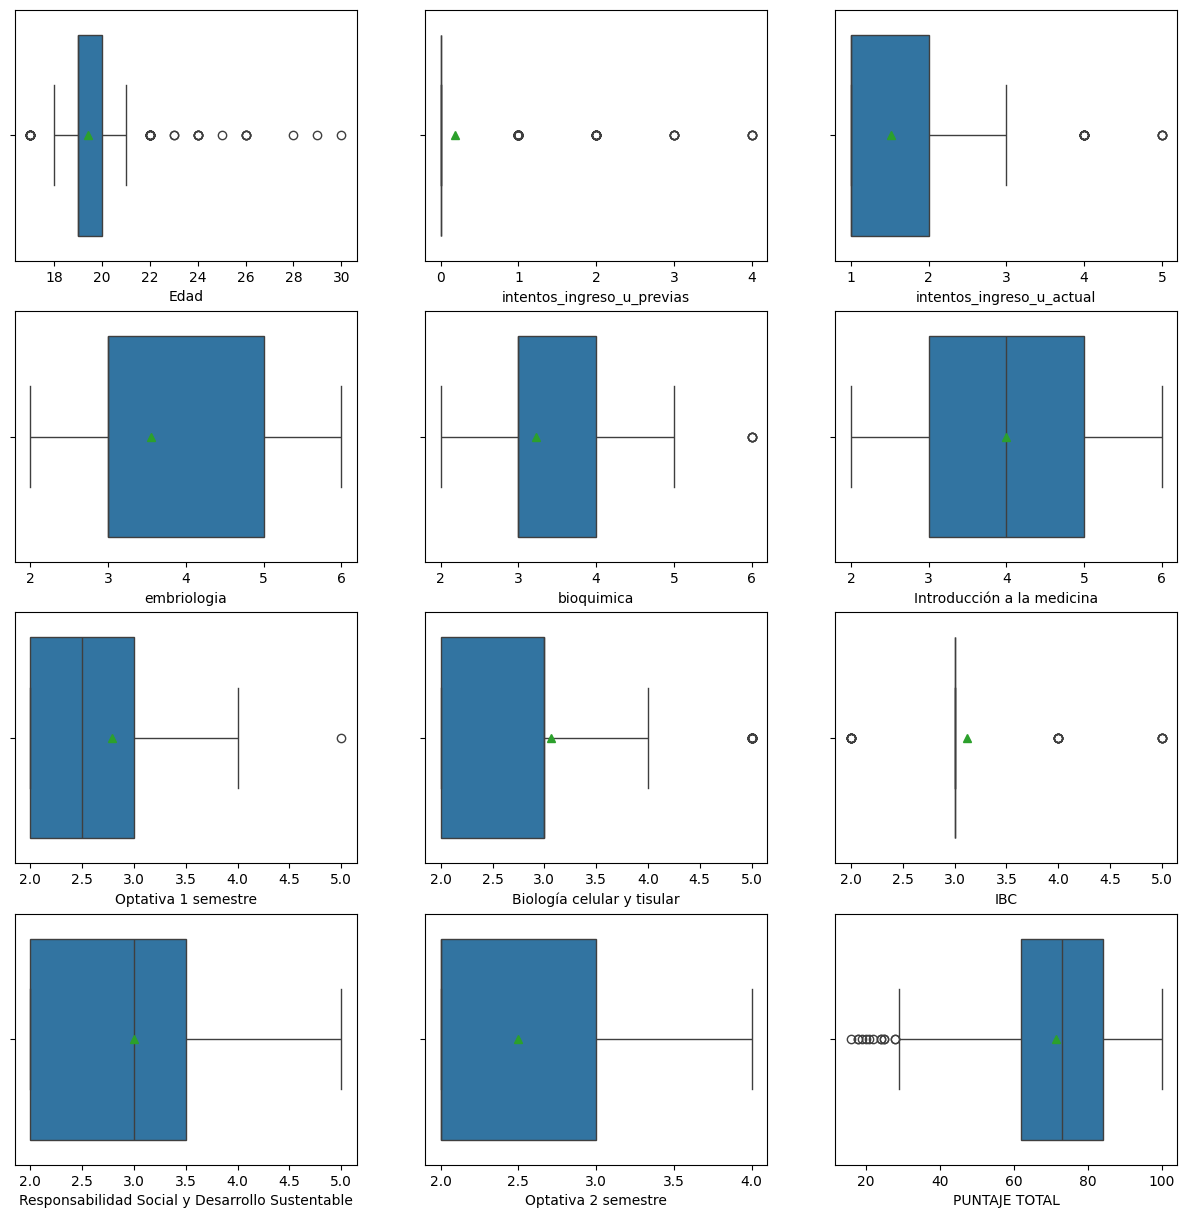

In [ ]:
# Listar las columnas numéricas
# Omitir las columnas que contienen la palabra "CLAVE y PREG ya que corresponden a un proceso manual de codificacion que hicieron los investigadores de variables categoricas a numeros"
columnas_con_clave = [col for col in primera_bd.columns if "CLAVE" in col or "PREG" in col]

# Graficar diagrama de caja para cada variable numérica
numeric_columns = primera_bd.drop(columnas_con_clave, axis=1).select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(4,3, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(numeric_columns, axes):
  sns.boxplot(x= primera_bd[col], ax=ax, showmeans=True)
  ax.set(xlabel=f'{col}')




### Segunda bd

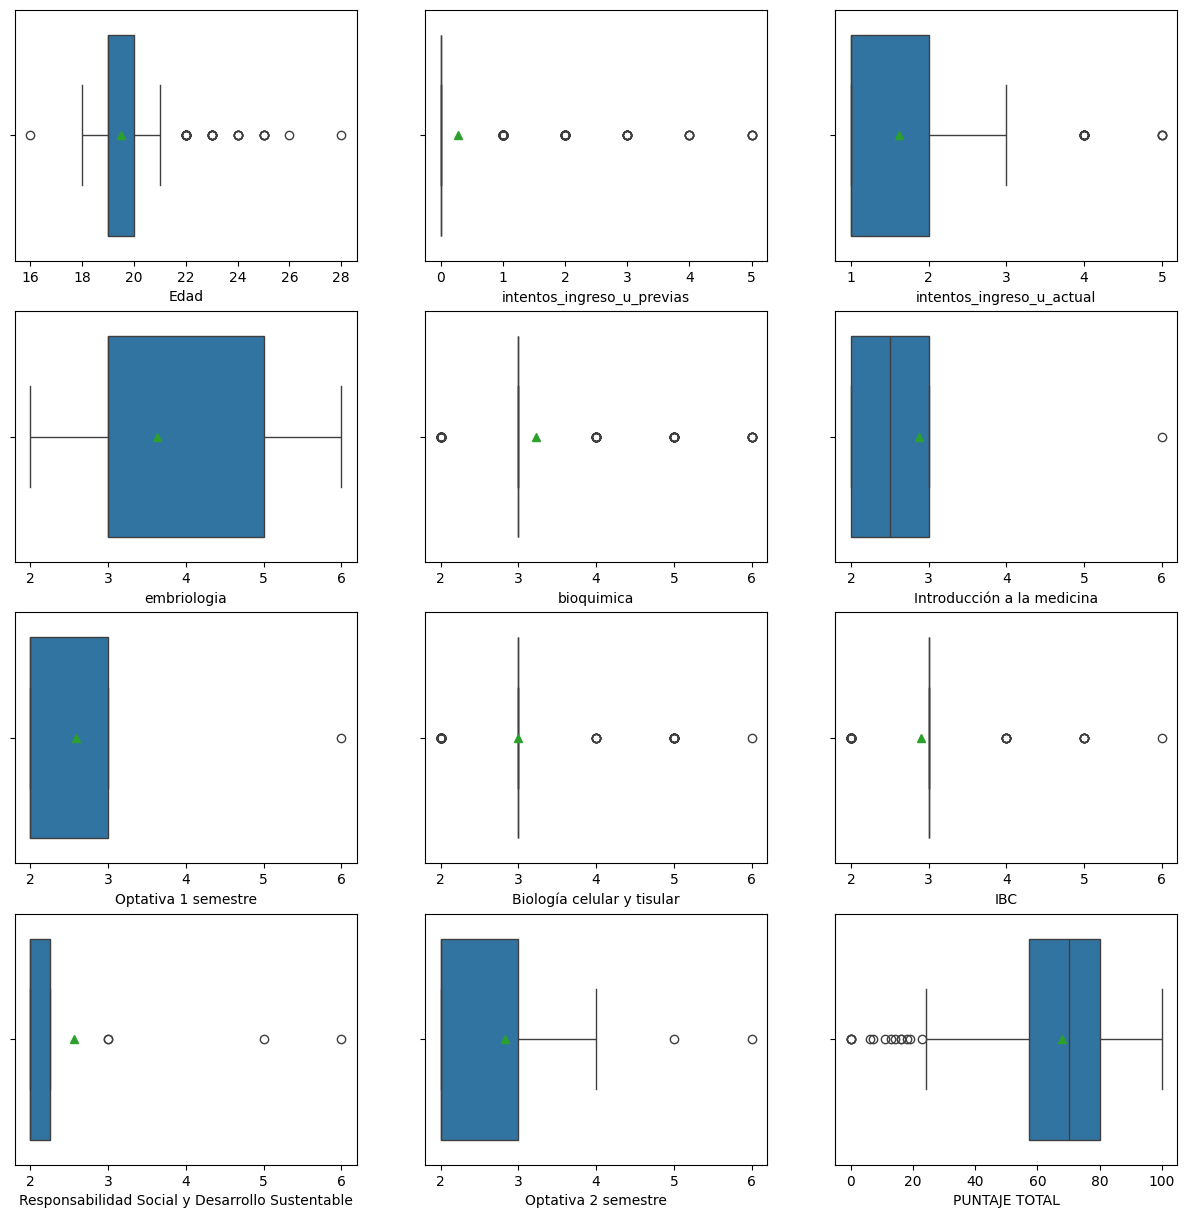

In [ ]:
# Listar las columnas numéricas
# Omitir las columnas que contienen la palabra "CLAVE y PREG ya que corresponden a un proceso manual de codificacion que hicieron los investigadores de variables categoricas a numeros"
columnas_con_clave = [col for col in segunda_bd.columns if "CLAVE" in col or "PREG" in col]

# Graficar diagrama de caja para cada variable numérica
numeric_columns = segunda_bd.drop(columnas_con_clave, axis=1).select_dtypes(include=['int64', 'float64']).columns
fig2, axes2 = plt.subplots(4,3, figsize=(15,15))
axes2 = axes2.ravel()
for col, ax in zip(numeric_columns, axes2):
  sns.boxplot(x= segunda_bd[col], ax=ax, showmeans=True)
  ax.set(xlabel=f'{col}')


##¿Cuál es la cardinalidad de las variables categóricas?

### Primera bd

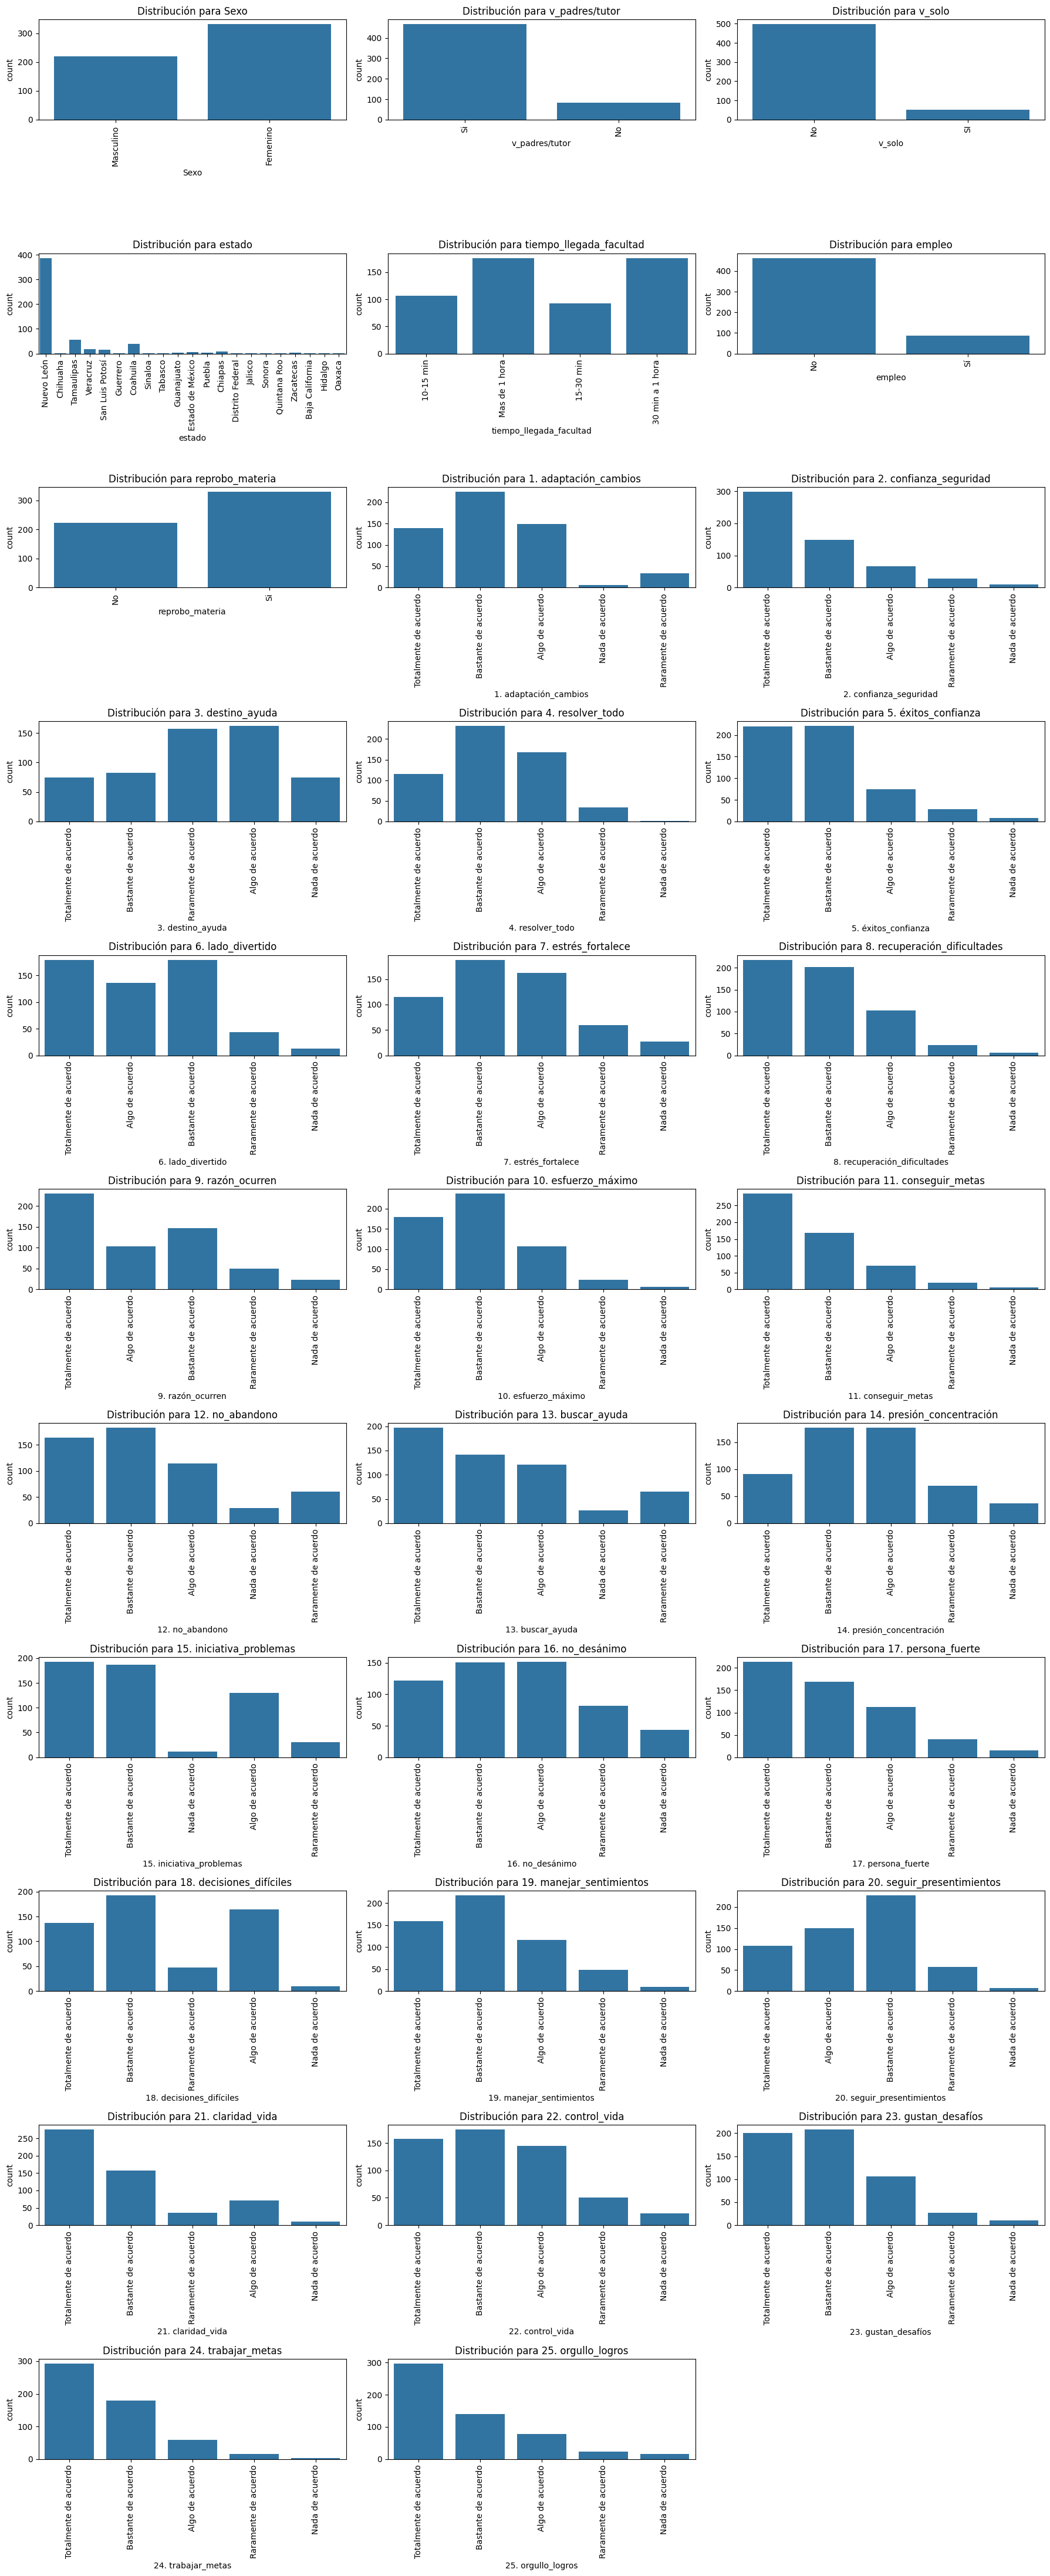

In [ ]:
# Listar las columnas numéricas
categorical_columns = primera_bd.select_dtypes(include=['object']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))

# Asegurarse de que axes sea una matriz bidimensional
axes = axes.flatten()

# Graficar diagrama de caja para cada variable categórica
for idx, column in enumerate(categorical_columns):
    sns.countplot(x=primera_bd[column], ax=axes[idx])
    axes[idx].set_title(f'Distribución para {column}')
    axes[idx].tick_params(axis='x', rotation=90)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Segunda bd

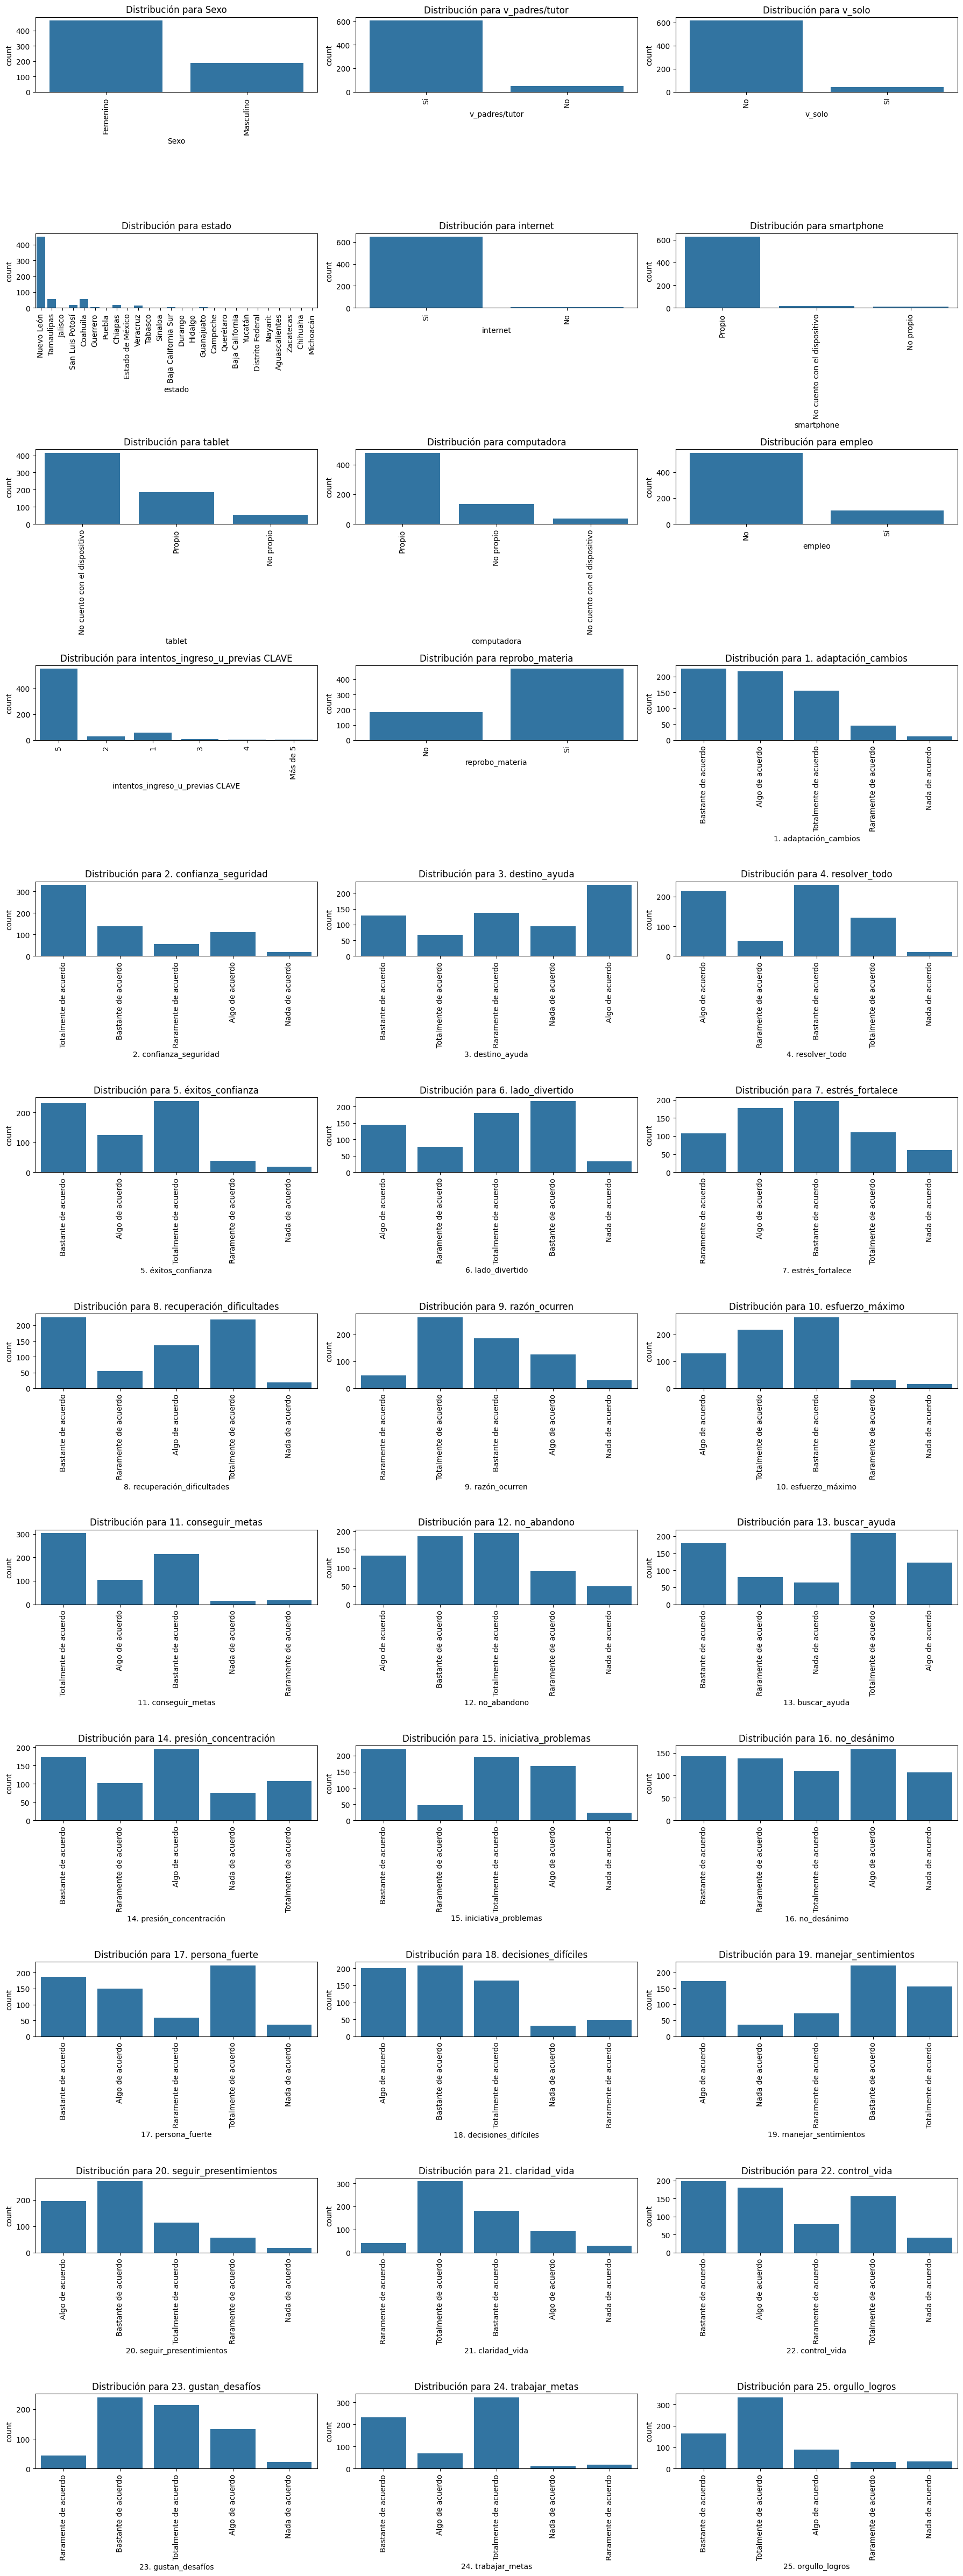

In [ ]:
# Listar las columnas numéricas
categorical_columns = segunda_bd.select_dtypes(include=['object']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))

# Asegurarse de que axes sea una matriz bidimensional
axes = axes.flatten()

# Graficar diagrama de caja para cada variable categórica
for idx, column in enumerate(categorical_columns):
    sns.countplot(x=segunda_bd[column], ax=axes[idx])
    axes[idx].set_title(f'Distribución para {column}')
    axes[idx].tick_params(axis='x', rotation=90)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?

### Primera bd

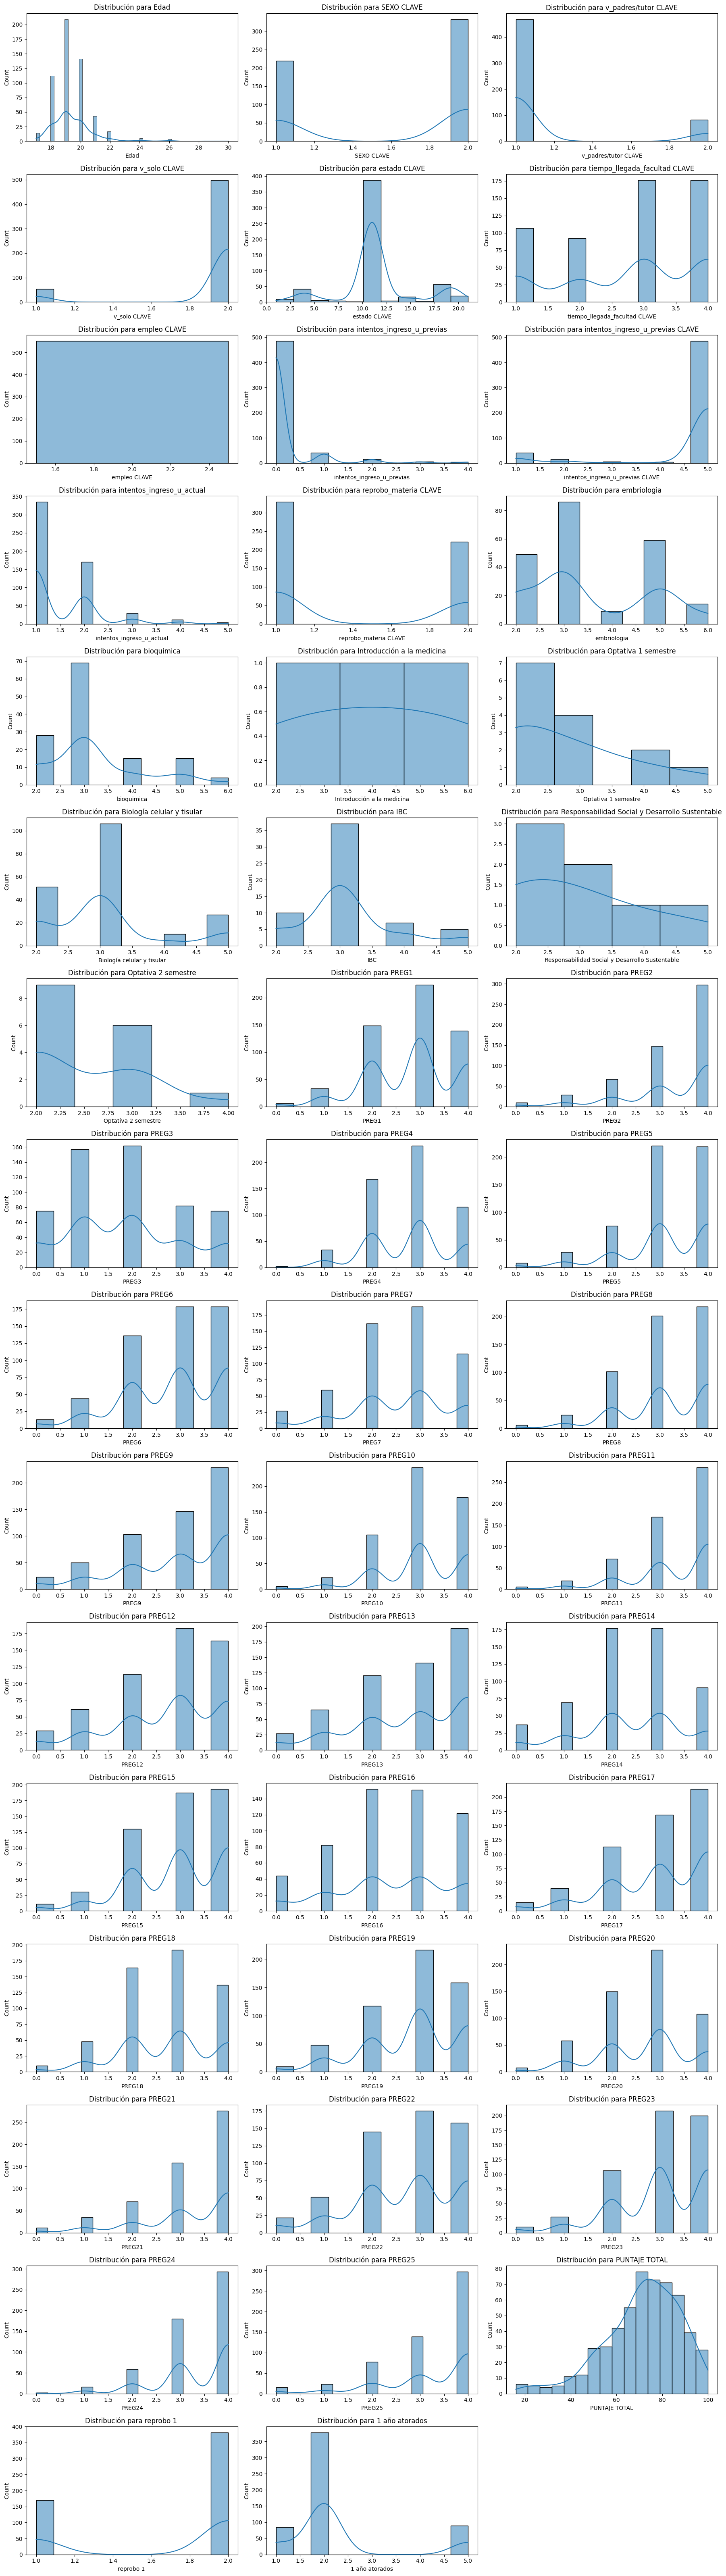

In [ ]:
# Listar las columnas numéricas
numeric_columns = primera_bd.select_dtypes(include=['int64', 'float64']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))

# Asegurarse de que axes sea una matriz bidimensional
axes = axes.flatten()

# Graficar histogramas para cada variable numérica
for idx, column in enumerate(numeric_columns):
    sns.histplot(primera_bd[column], ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribución para {column}')

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Segunda bd

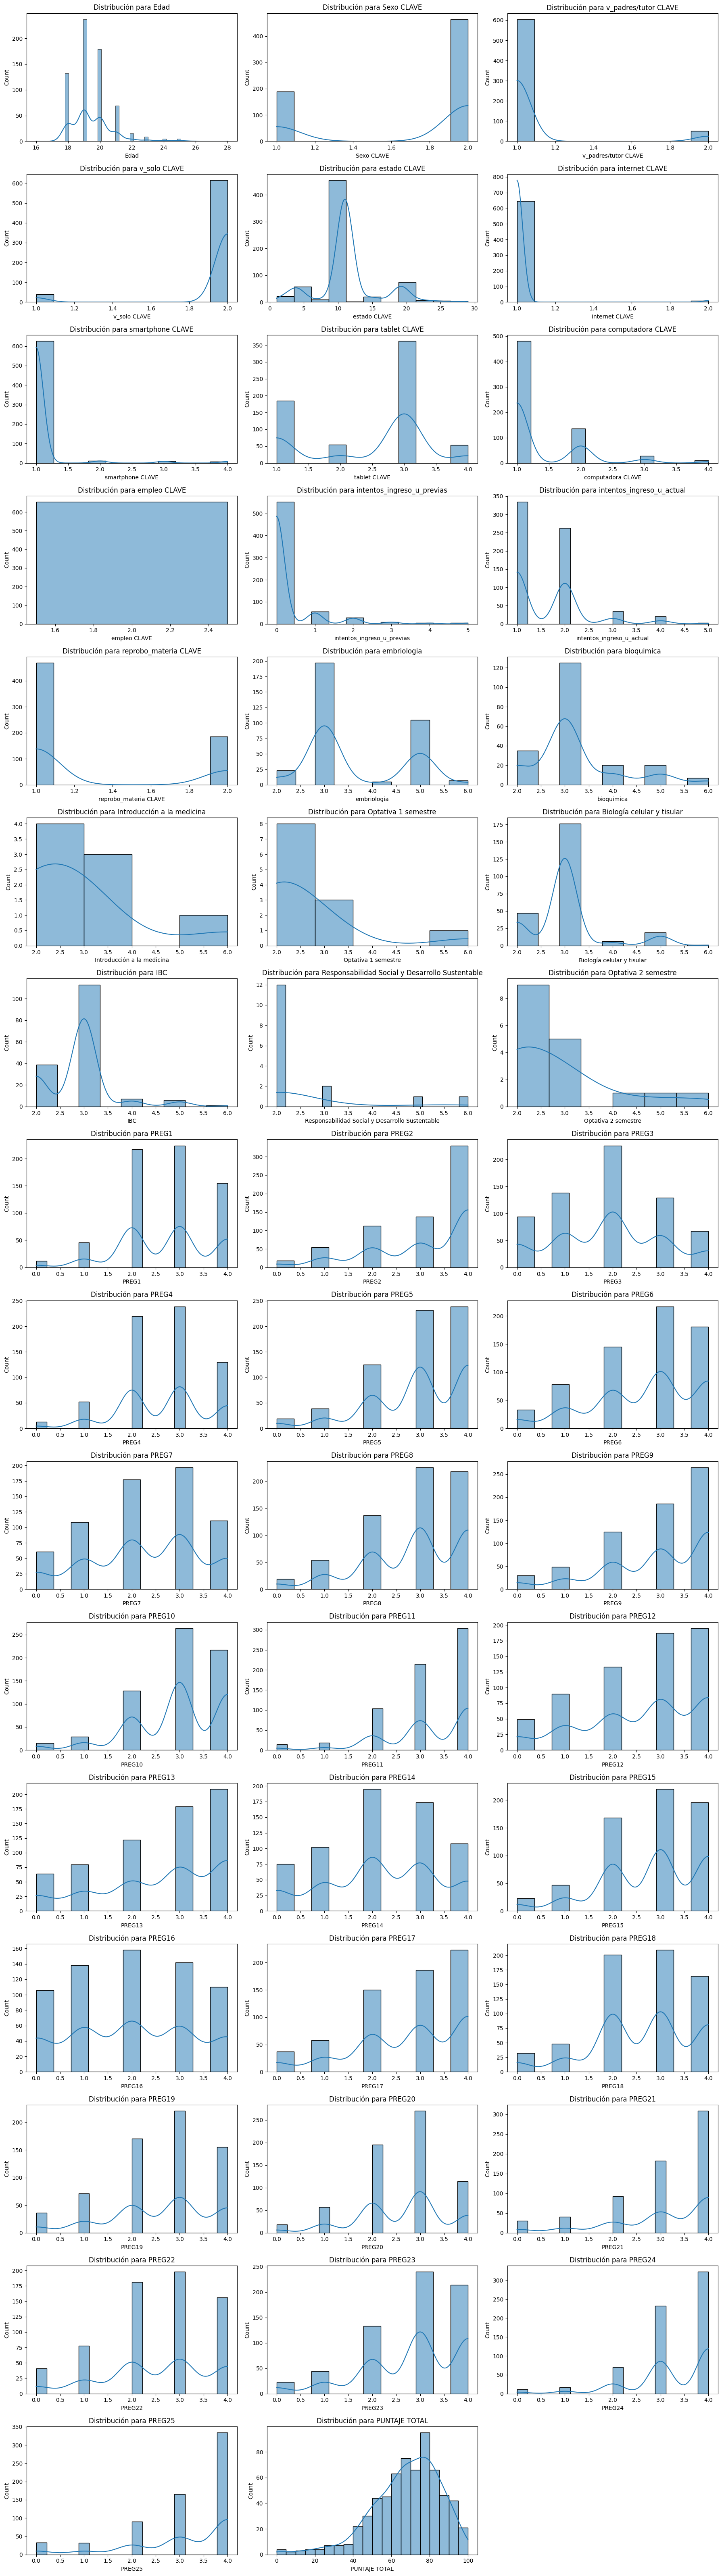

In [ ]:
# Listar las columnas numéricas
numeric_columns = segunda_bd.select_dtypes(include=['int64', 'float64']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 4))

# Asegurarse de que axes sea una matriz bidimensional
axes = axes.flatten()

# Graficar histogramas para cada variable numérica
for idx, column in enumerate(numeric_columns):
    sns.histplot(segunda_bd[column], ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribución para {column}')

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo)

En el momento solo se cuenta con una dimension de tiempo que es la fecha en la que se registro la encuesta, sin embargo en este caso no se pueden identificar tendencias ya que solo se registraron encuestas en un periodo entre marzo y abril pero no se siguieron registrando continuamente, sin embargo en un futuro pensamos construir una variable que nos indique el tiempo como antes y despues de la pandemia para unir las dos bases y ver sus diferencias

##¿Hay correlación entre las variables dependientes e independientes?

##primera bd

In [ ]:
columnas_con_preg = [col for col in primera_bd.columns if  "PREG" in col]
numeric_columns = primera_bd.drop(columnas_con_preg, axis=1).select_dtypes(include=['int64', 'float64']).columns

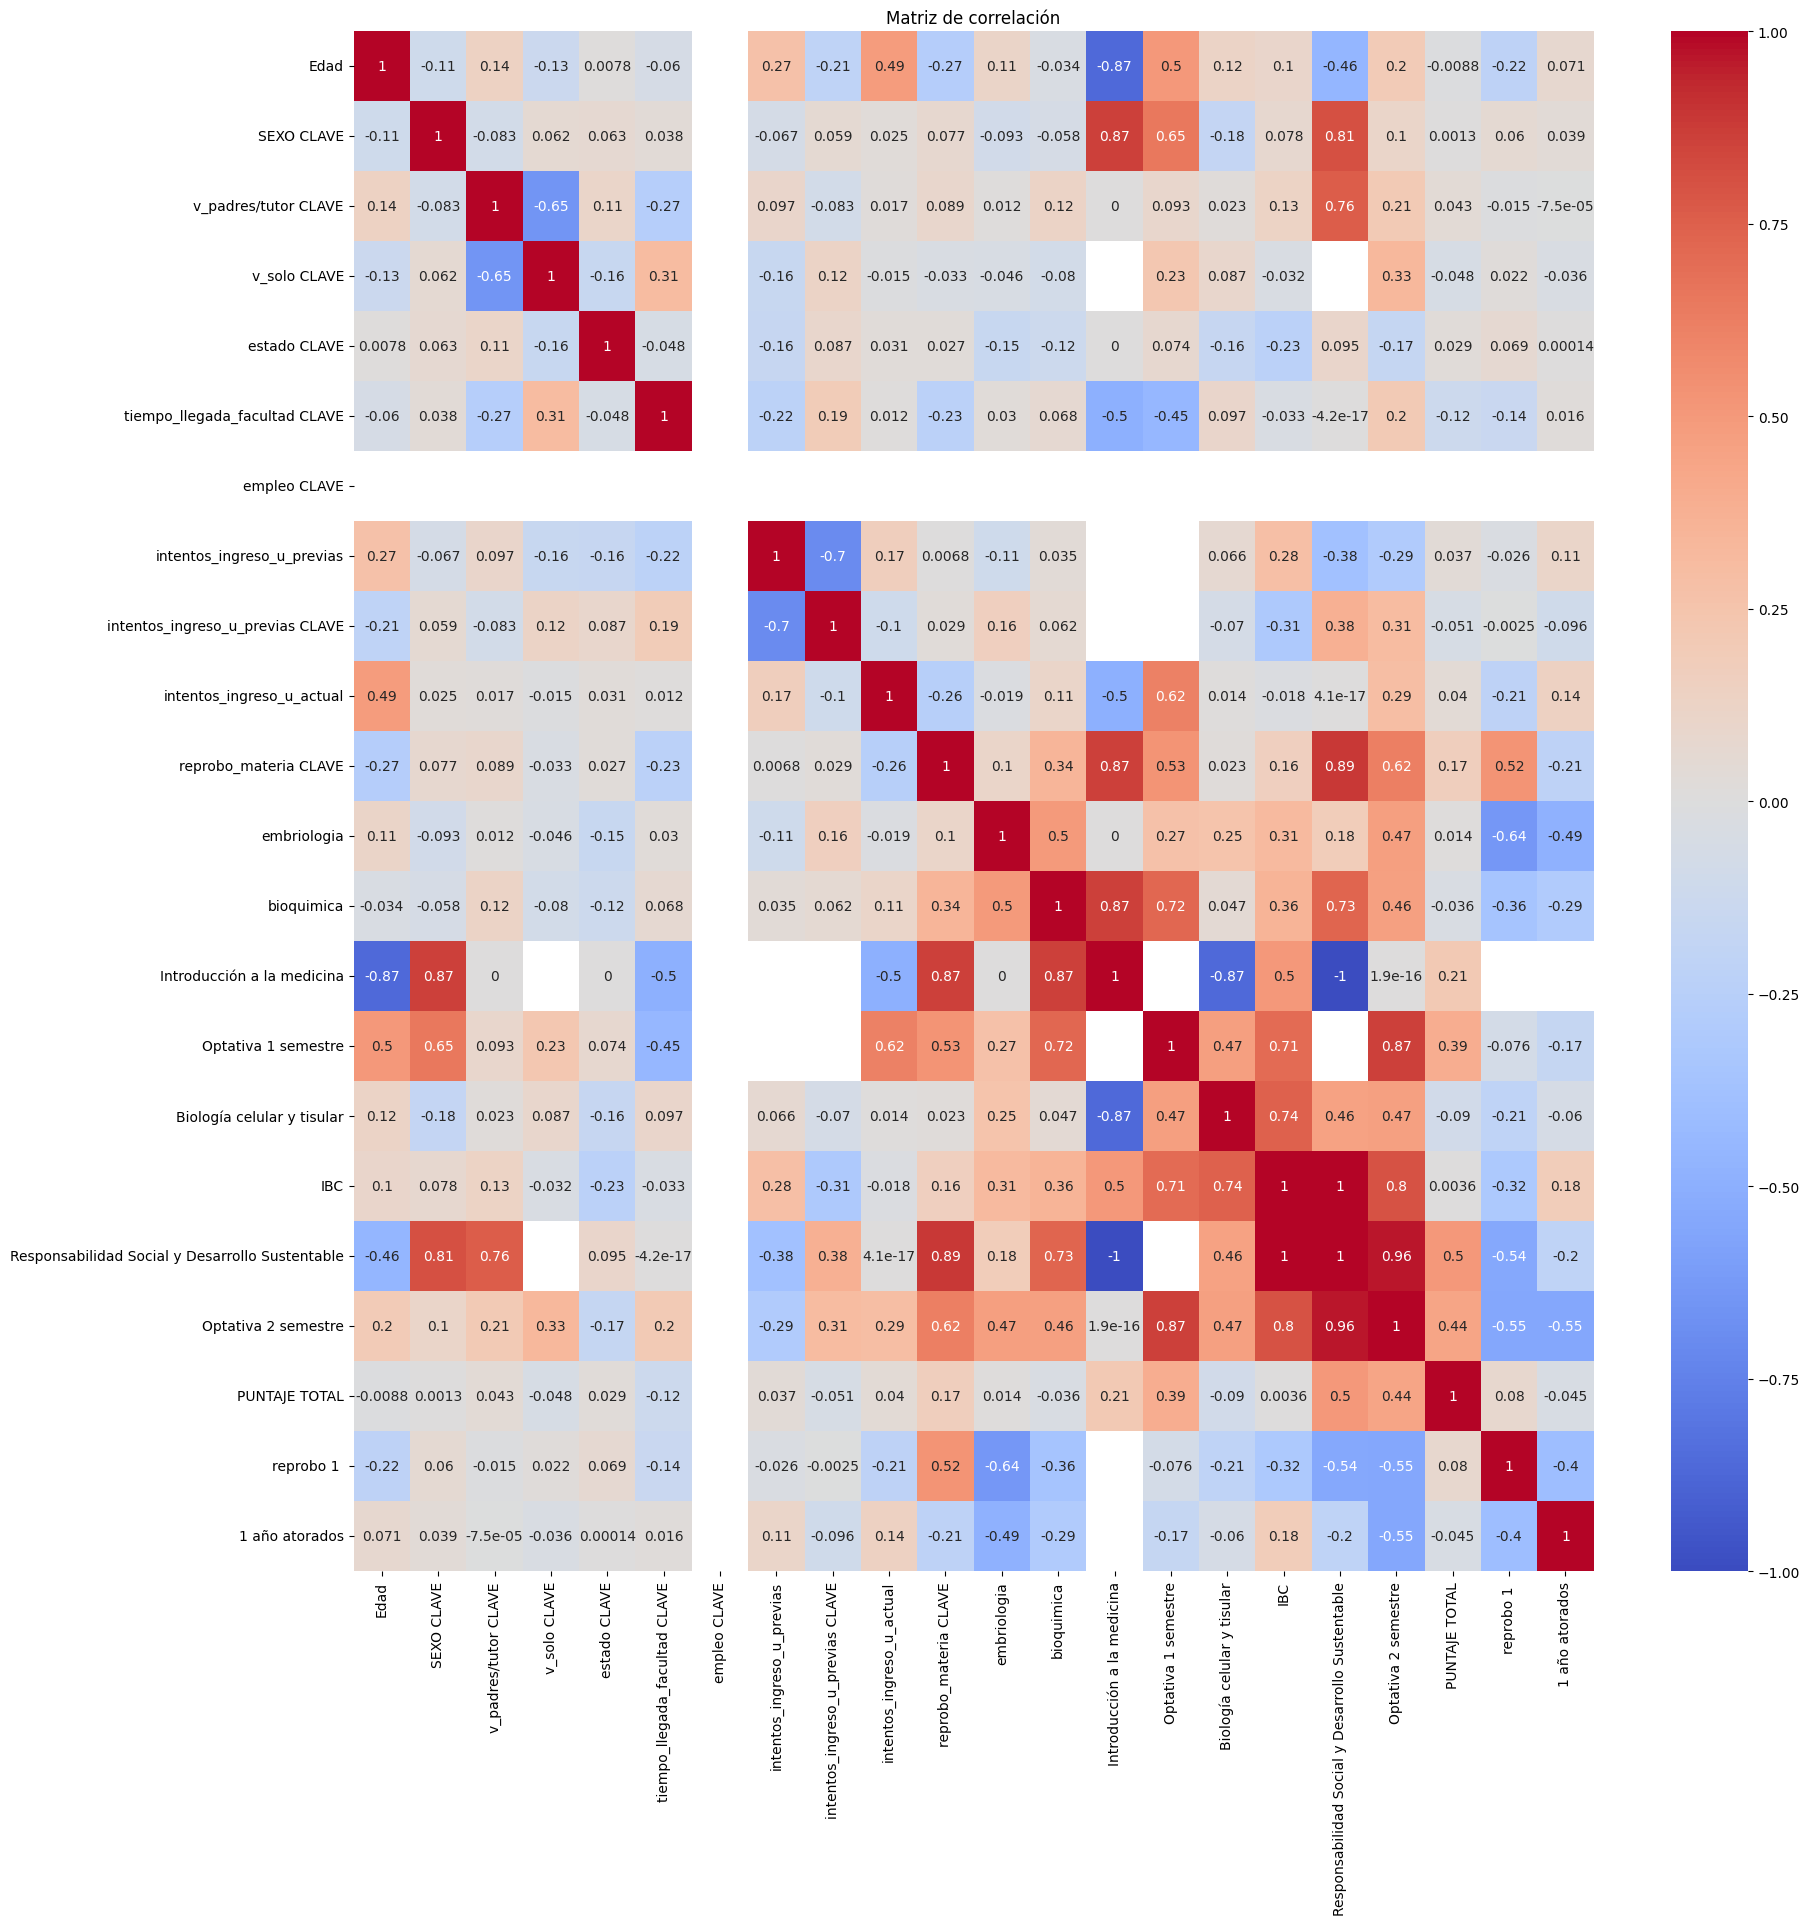

In [ ]:
correlation_matrix = primera_bd.loc[:, numeric_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

##segunda bd

In [ ]:
columnas_con_preg = [col for col in segunda_bd.columns if  "PREG" in col]
numeric_columns = segunda_bd.drop(columnas_con_preg, axis=1).select_dtypes(include=['int64', 'float64']).columns

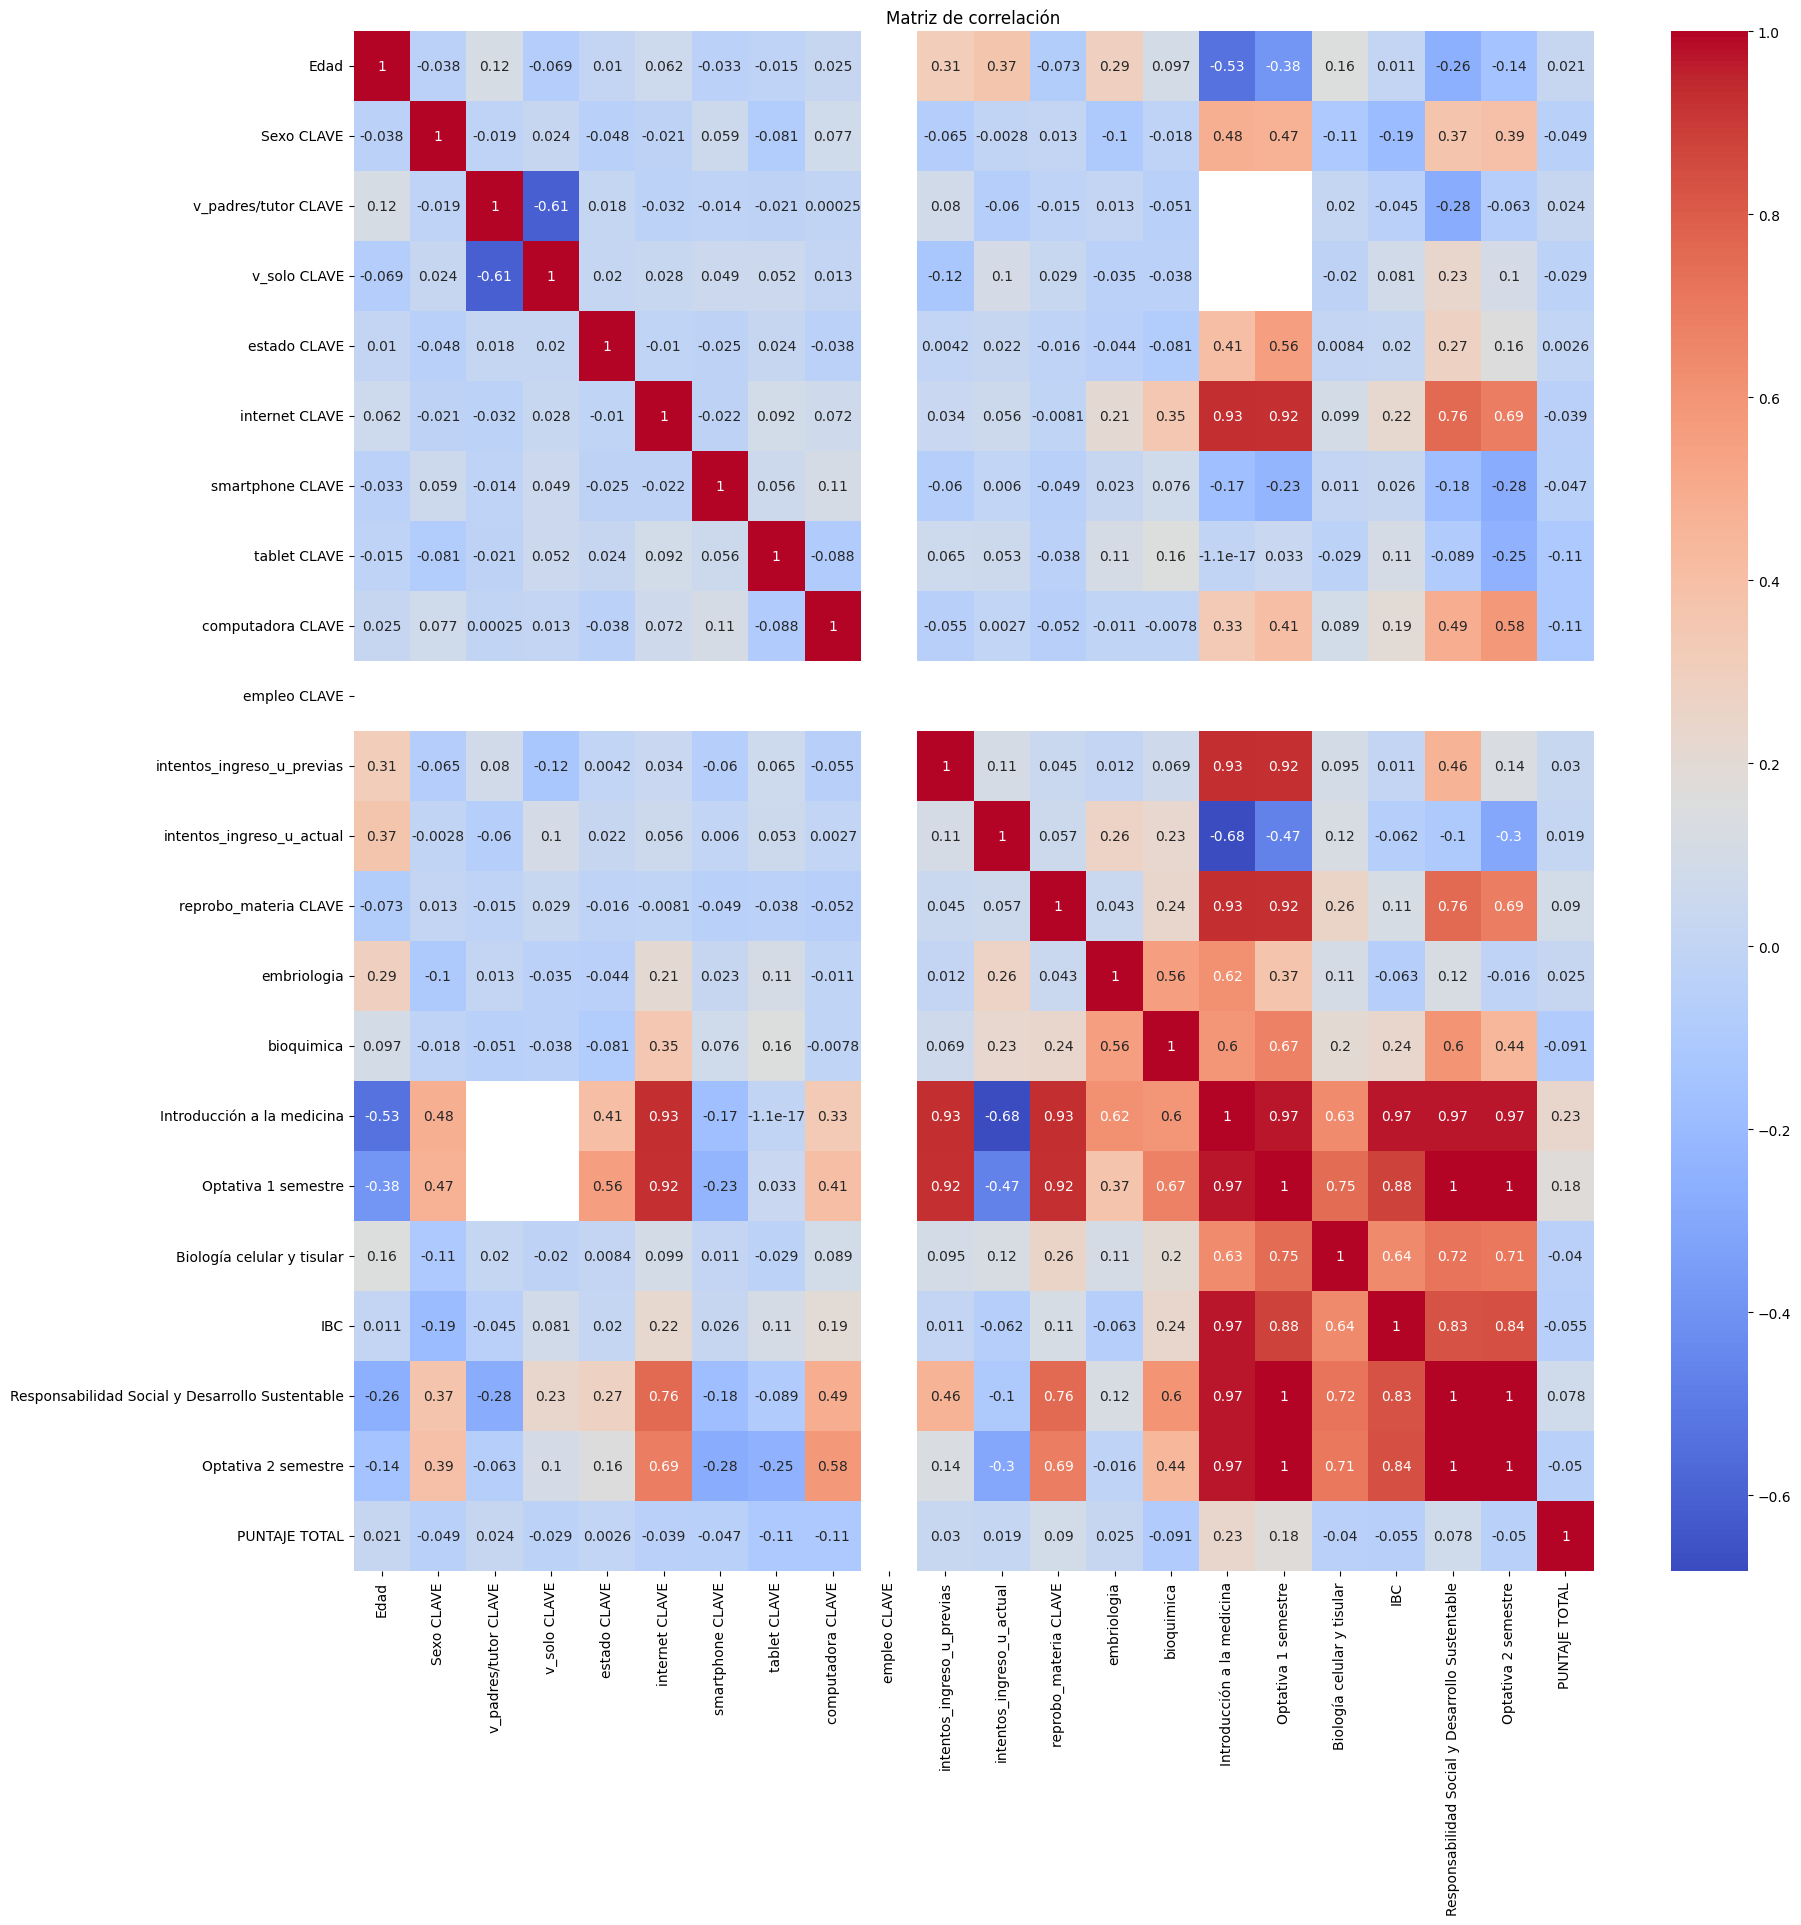

In [ ]:
correlation_matrix = segunda_bd.loc[:, numeric_columns].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

## ¿Cómo se distribuyen los datos en función de diferentes categorías?

### Generar boxplot para comparar variables categóricas en relación con el puntaje total

### Primera BD

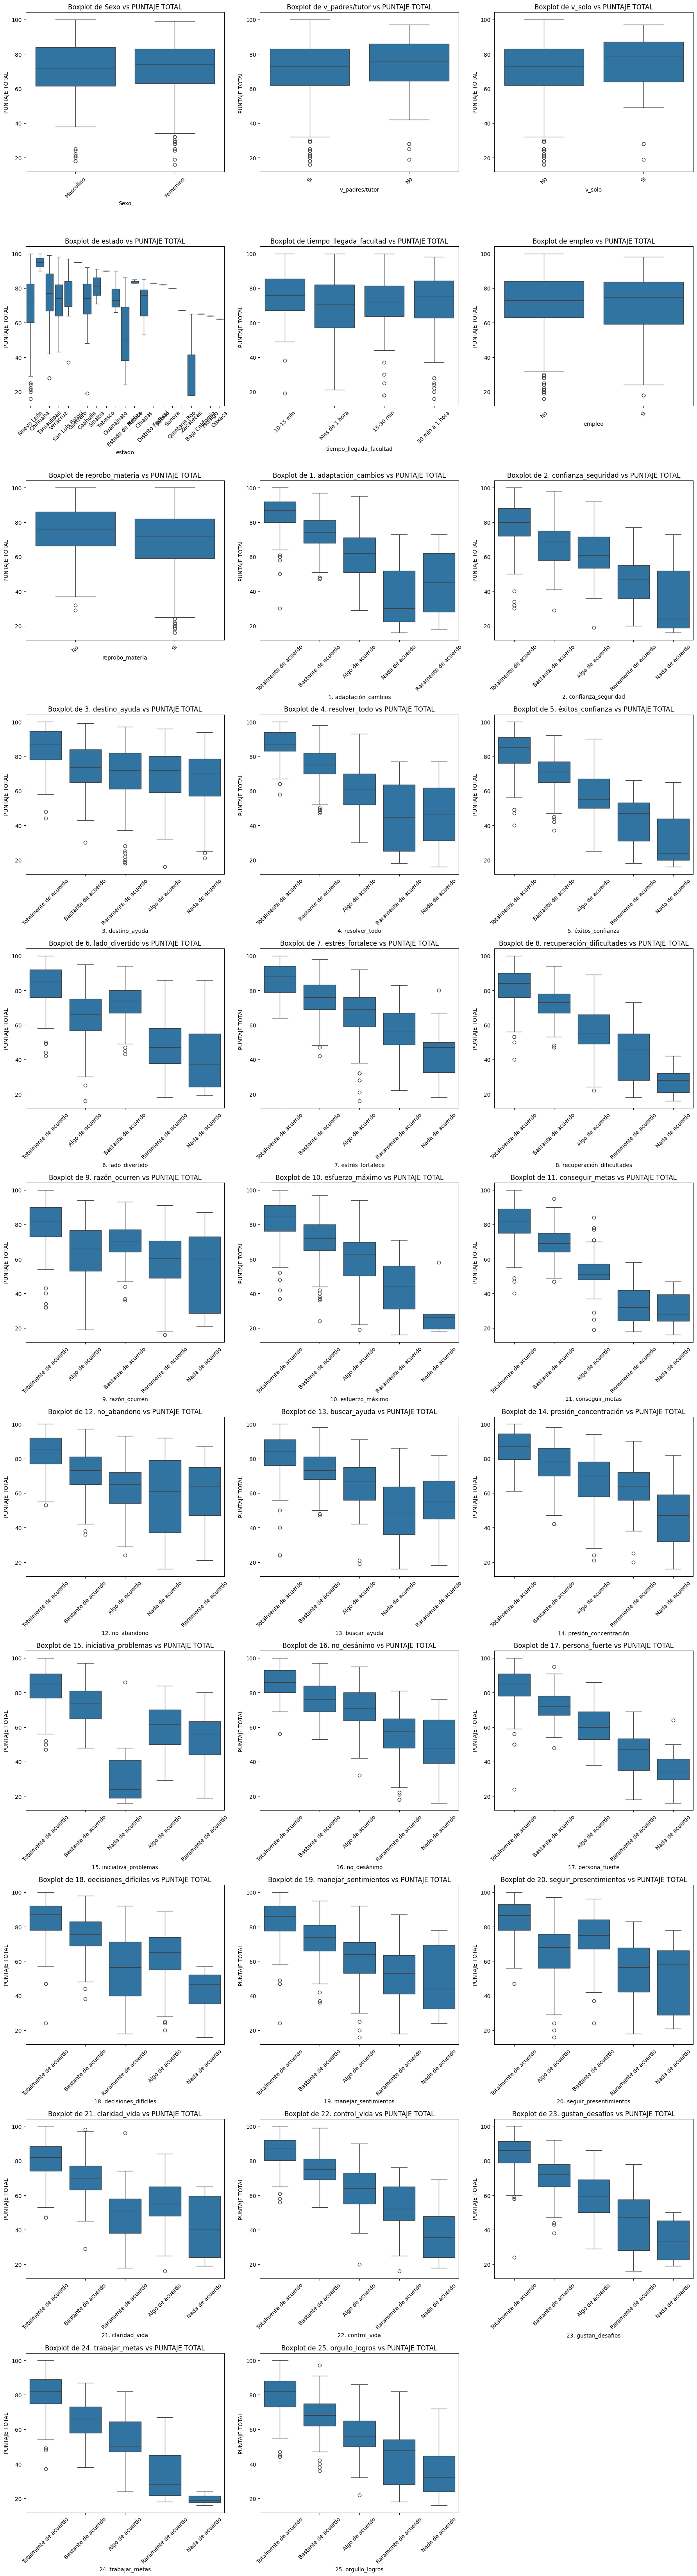

In [ ]:
# Listar las columnas categoricas
categorical_columns = primera_bd.select_dtypes(include=['object']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 6))
axes = axes.flatten()

# Graficar box plots para cada variable categórica en relación con el puntaje total
for idx, column in enumerate(categorical_columns):
    sns.boxplot(x=primera_bd[column], y=primera_bd["PUNTAJE TOTAL"], ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {column} vs {"PUNTAJE TOTAL"}')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Segunda BD

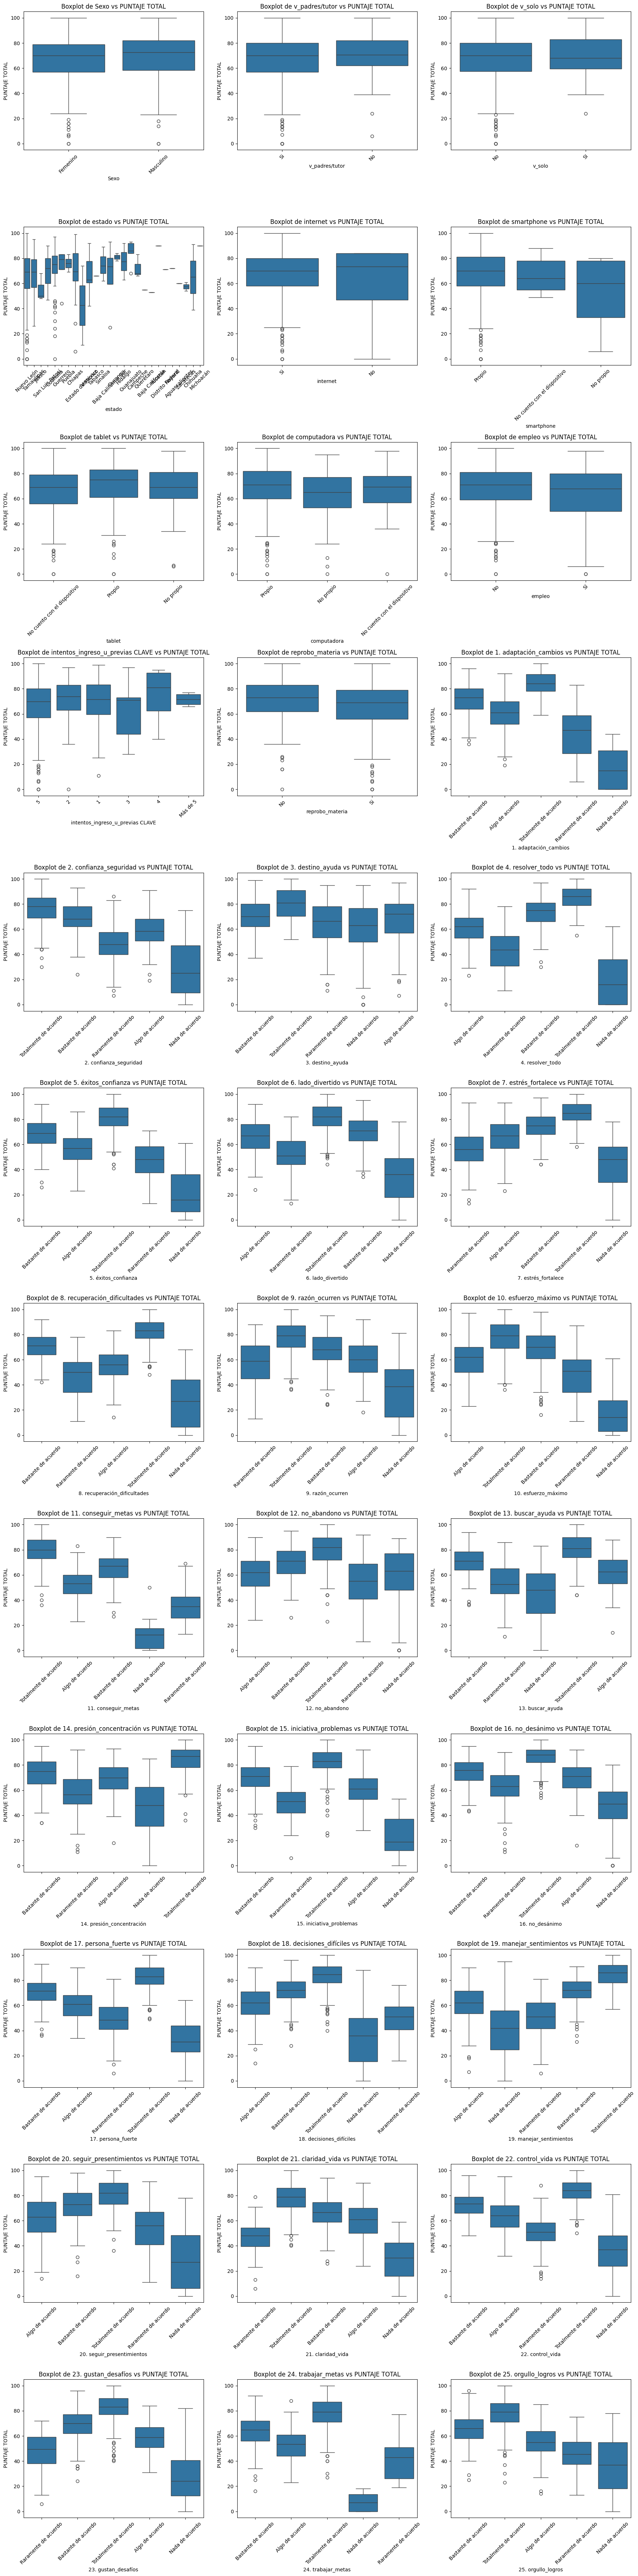

In [ ]:
# Listar las columnas categoricas
categorical_columns = segunda_bd.select_dtypes(include=['object']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(categorical_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 6))
axes = axes.flatten()

# Graficar box plots para cada variable categórica en relación con el puntaje total
for idx, column in enumerate(categorical_columns):
    sns.boxplot(x=segunda_bd[column], y=segunda_bd["PUNTAJE TOTAL"], ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {column} vs {"PUNTAJE TOTAL"}')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Generar scatter plot para comparar variables numericas en relación con el puntaje total

### Primera BD

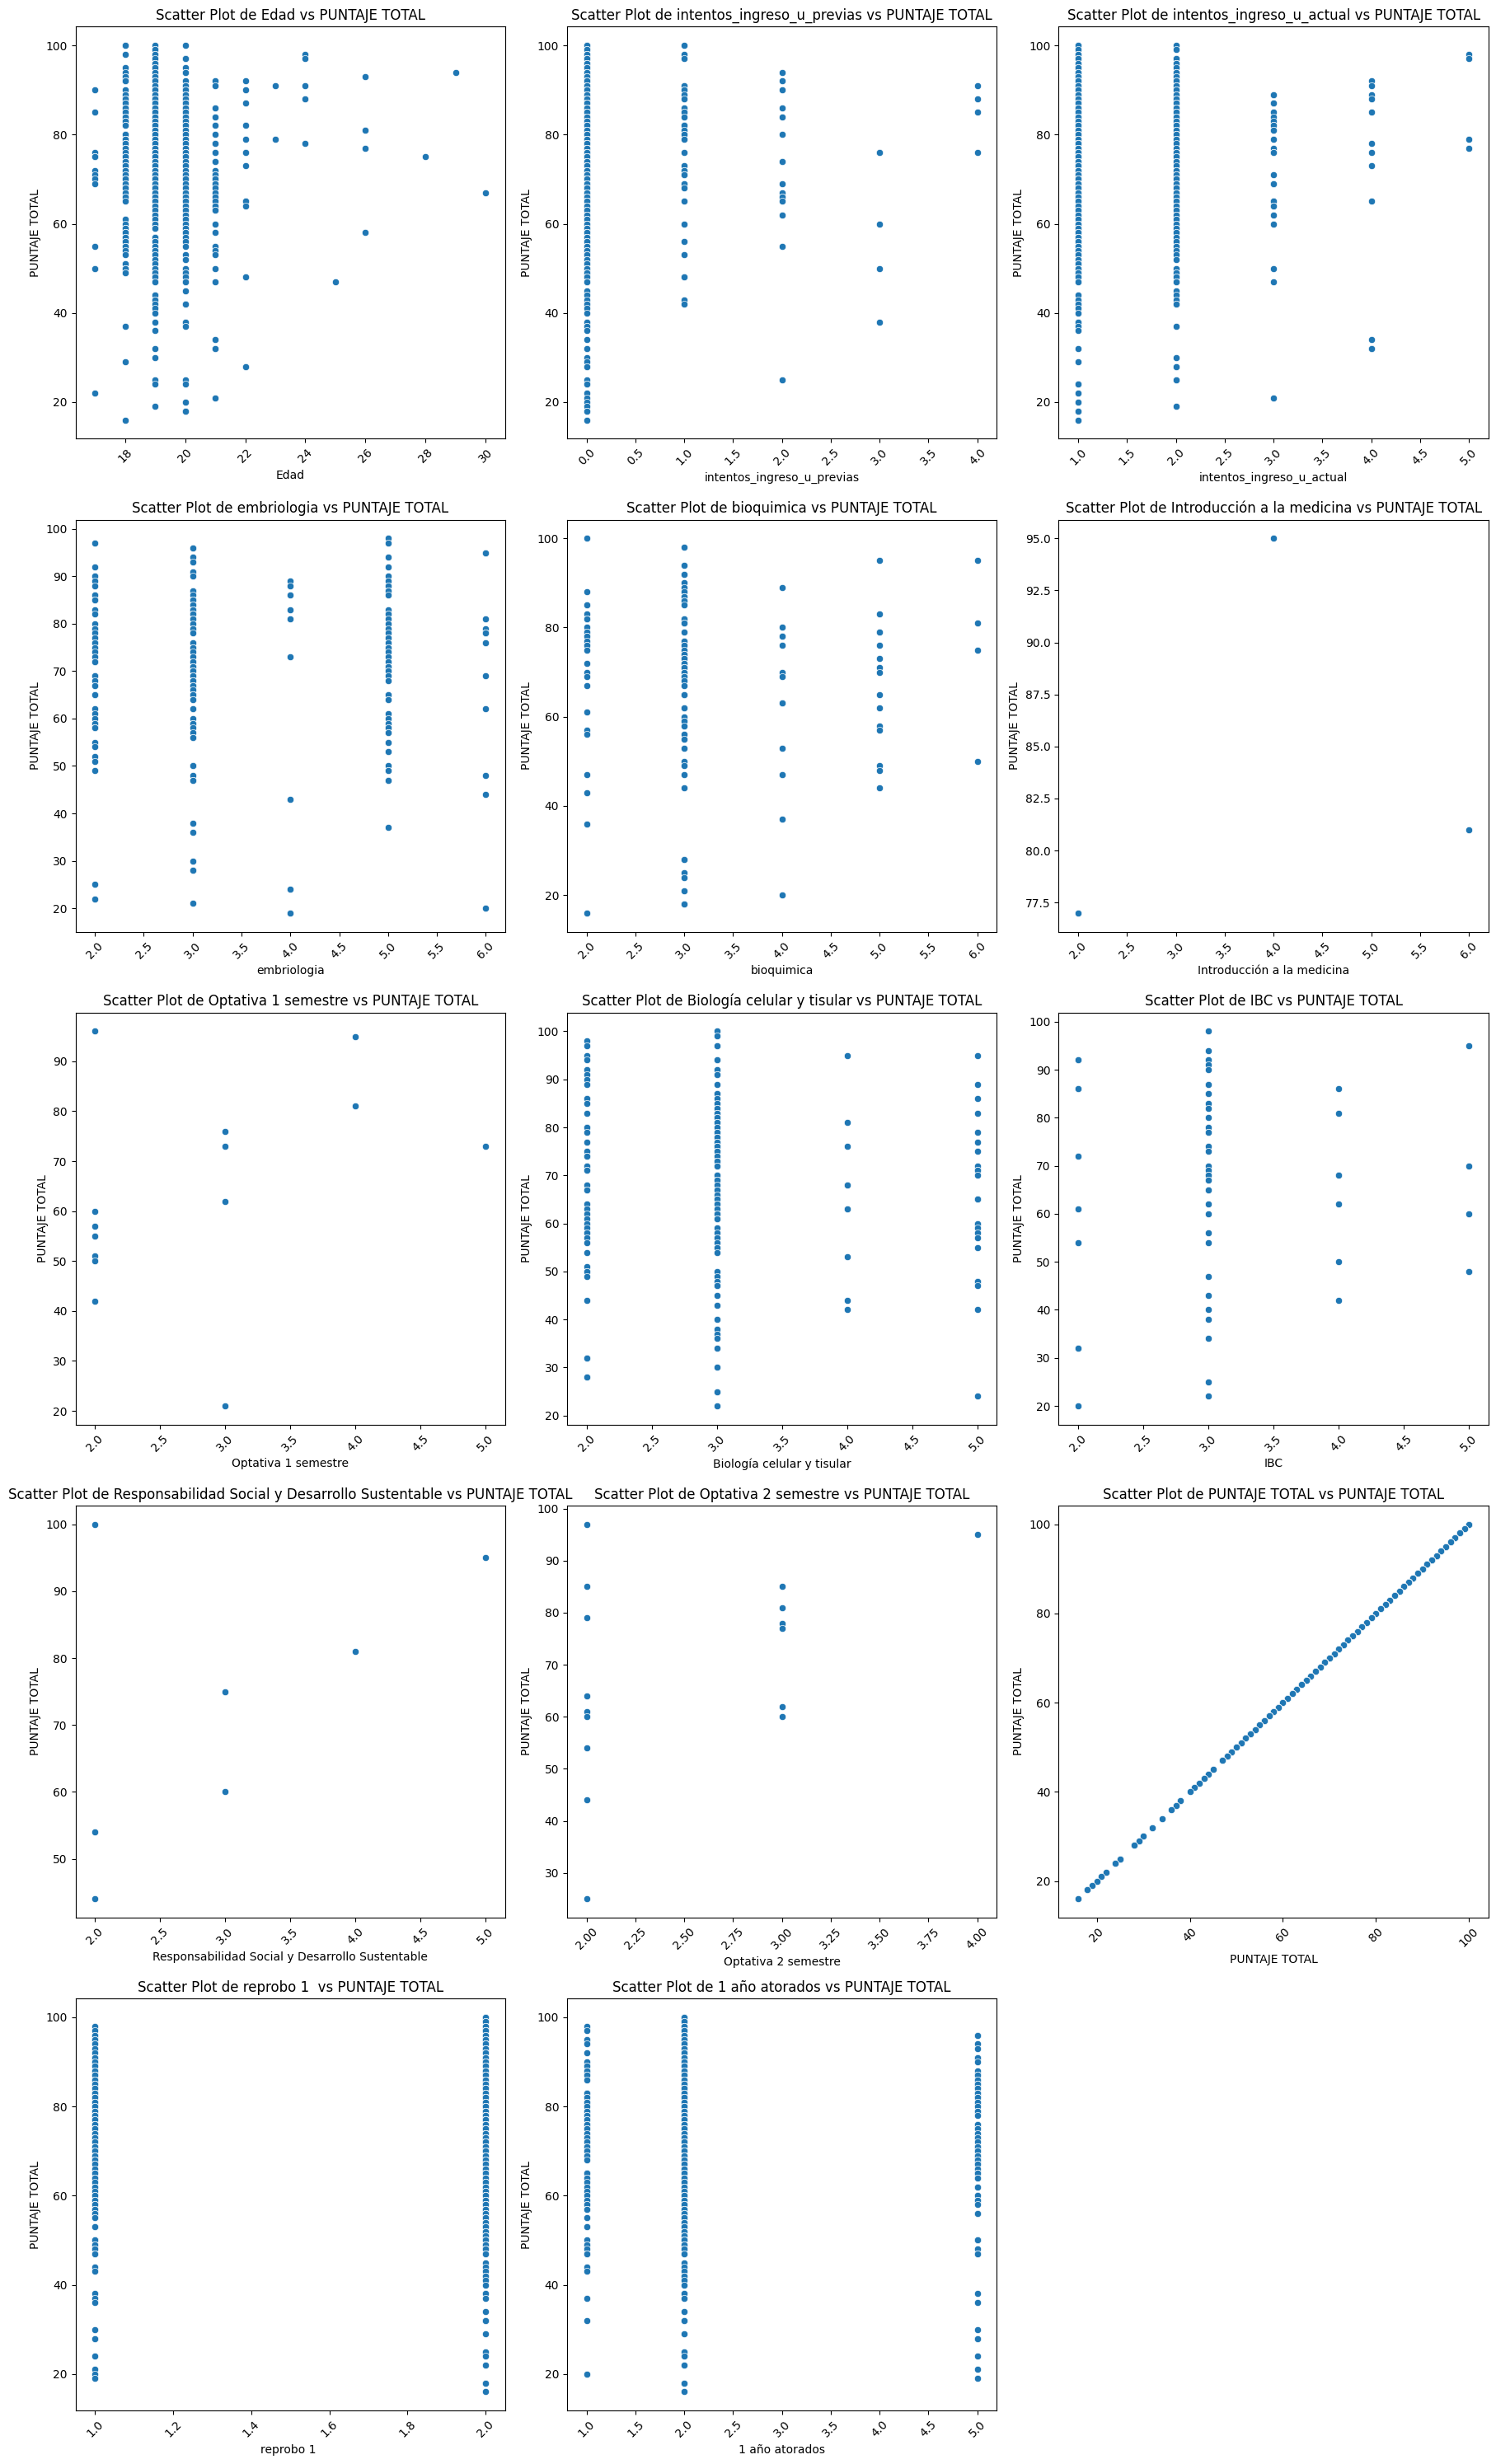

In [ ]:
# Listar las columnas numéricas
columnas_con_preg = [col for col in primera_bd.columns if  "PREG" in col or "CLAVE" in col]
numeric_columns = primera_bd.drop(columnas_con_preg, axis=1).select_dtypes(include=['int64', 'float64']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 6))
axes = axes.flatten()

# Graficar scatter para cada variable numericas en relación con el puntaje total
for idx, column in enumerate(numeric_columns):
    sns.scatterplot(x=primera_bd[column], y=primera_bd["PUNTAJE TOTAL"], ax=axes[idx])
    axes[idx].set_title(f'Scatter Plot de {column} vs {"PUNTAJE TOTAL"}')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Segunda BD

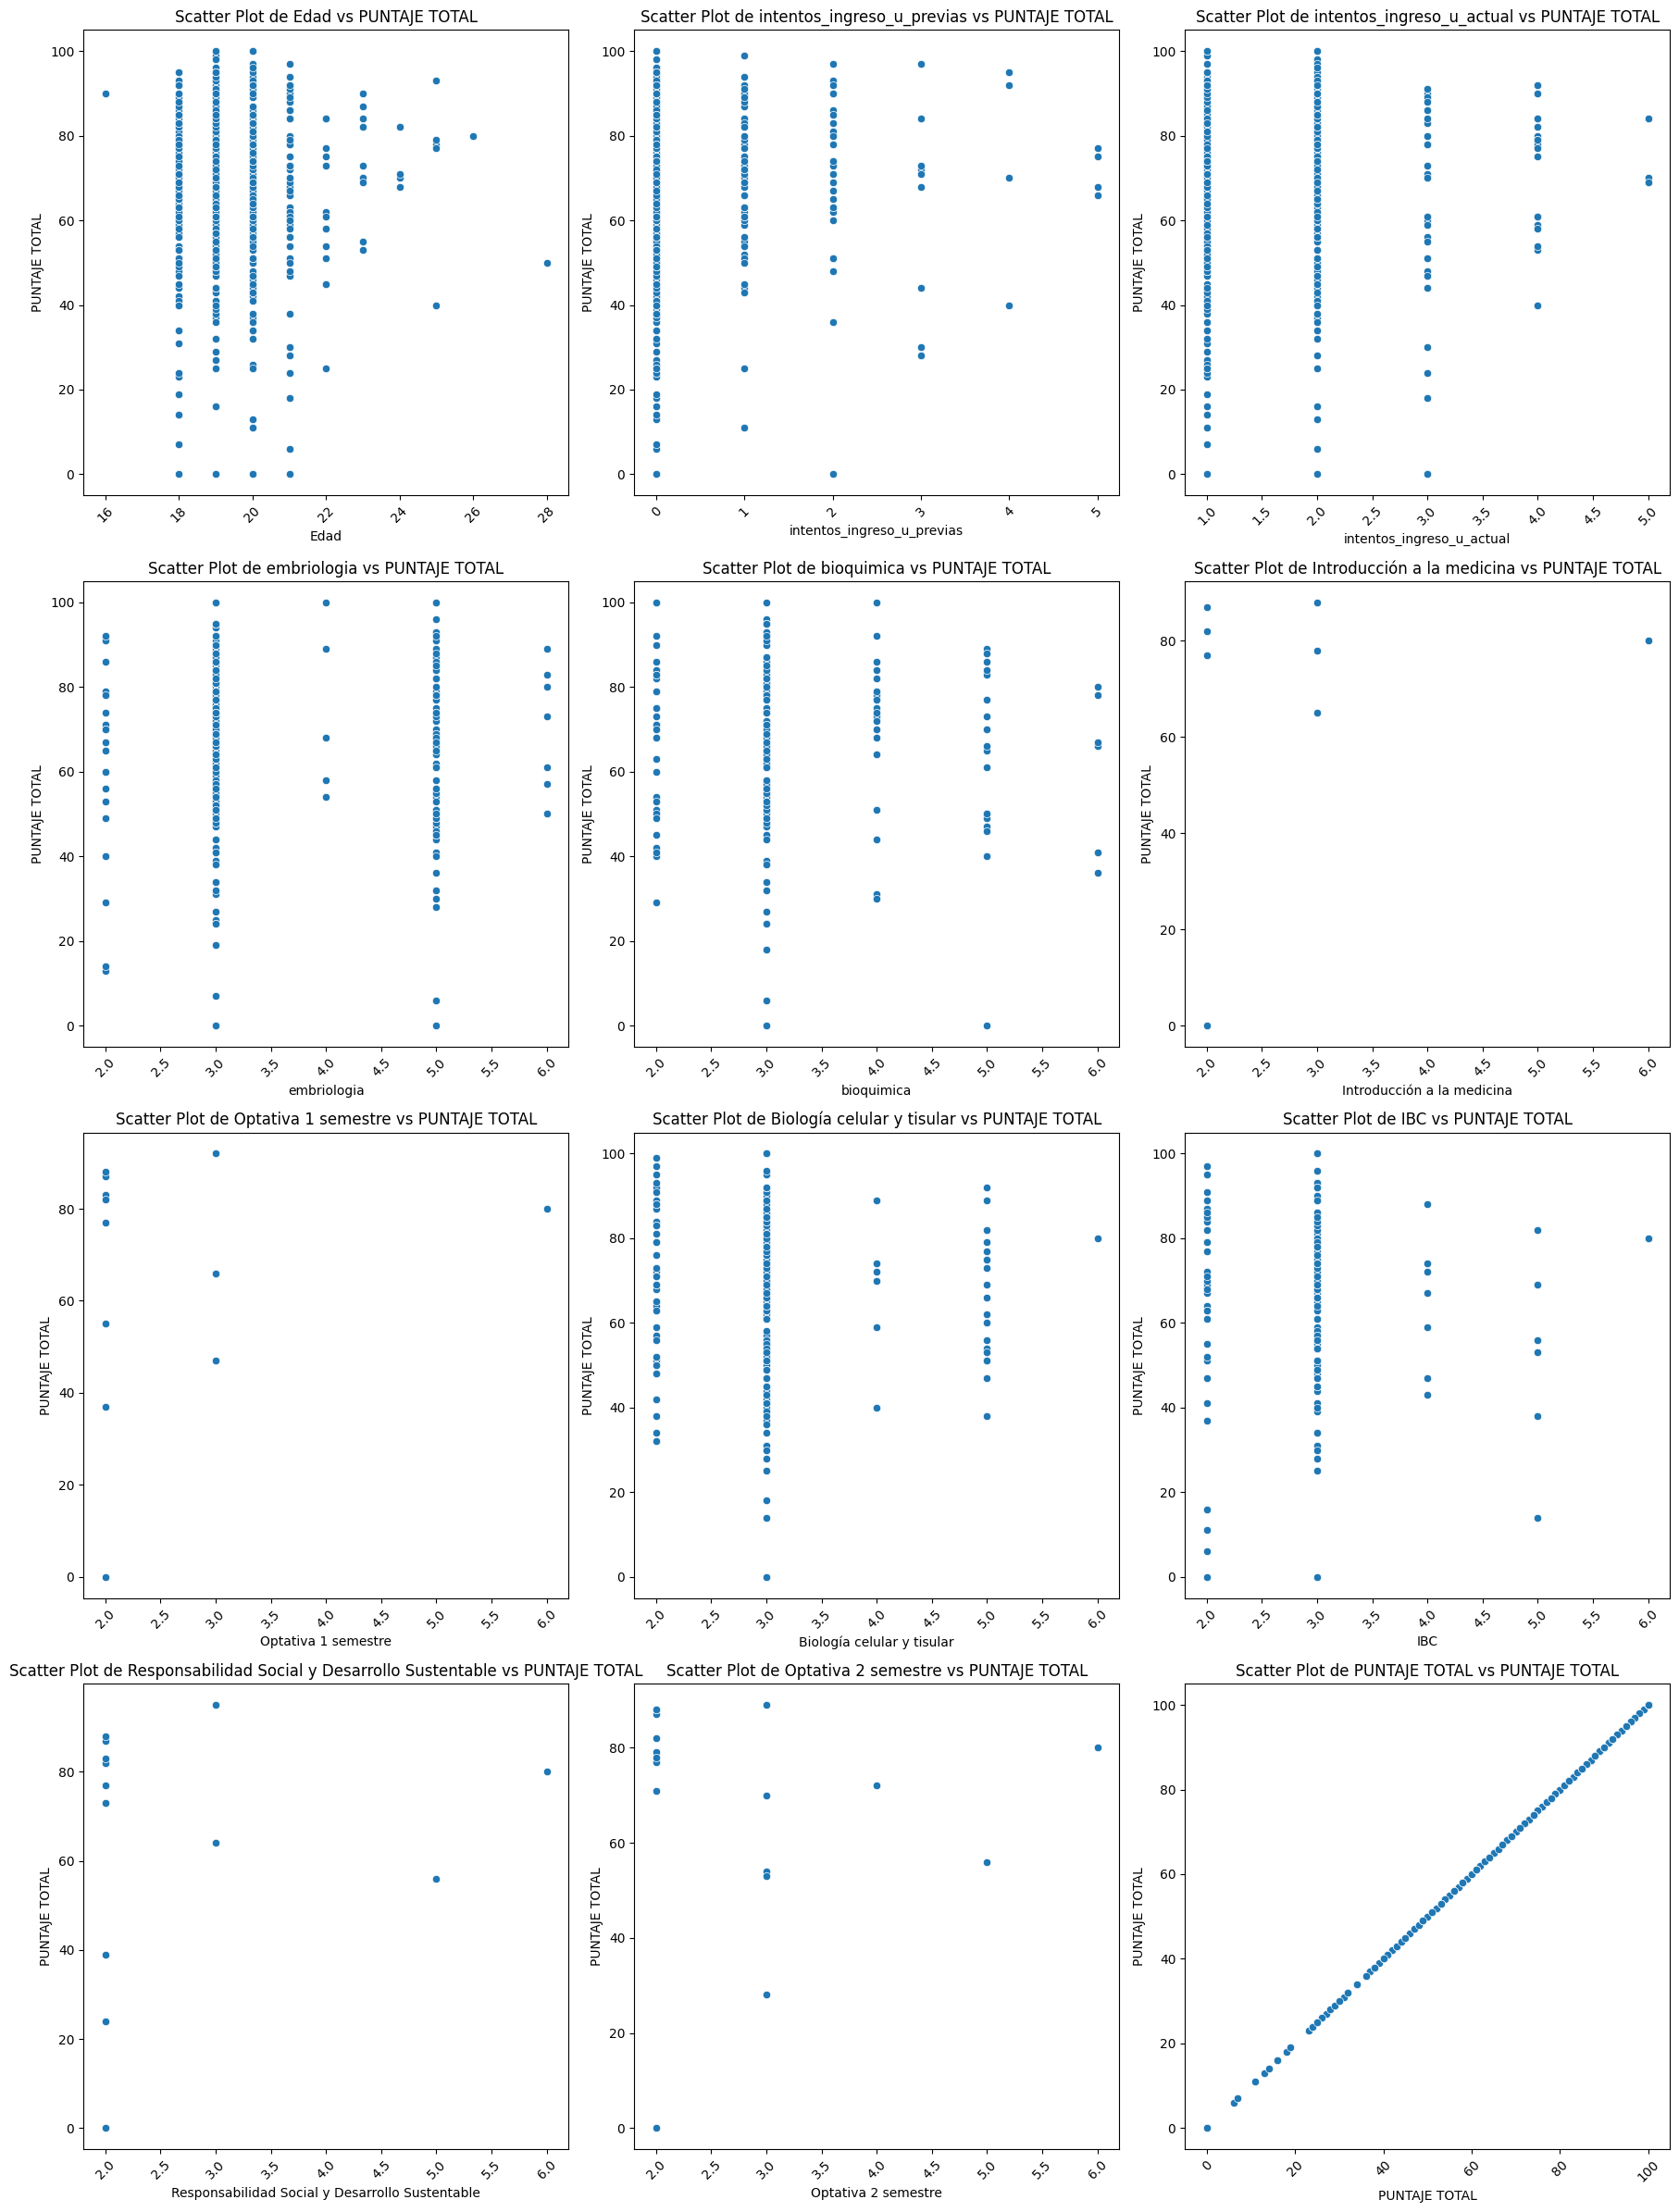

In [ ]:
# Listar las columnas numéricas
columnas_con_preg = [col for col in segunda_bd.columns if  "PREG" in col or "CLAVE" in col]
numeric_columns = segunda_bd.drop(columnas_con_preg, axis=1).select_dtypes(include=['int64', 'float64']).columns

# Configurar la figura y los subplots
num_columns = 3  # Número de subplots por fila
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesario

fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 6, num_rows * 6))
axes = axes.flatten()

# Graficar scatter para cada variable numericas en relación con el puntaje total
for idx, column in enumerate(numeric_columns):
    sns.scatterplot(x=segunda_bd[column], y=segunda_bd["PUNTAJE TOTAL"], ax=axes[idx])
    axes[idx].set_title(f'Scatter Plot de {column} vs {"PUNTAJE TOTAL"}')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45)

# Eliminar subplots vacíos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Engineering


Se pueden generar las siguientes features a partir de las features existentes en la base:

## Categorias de edad

Primera BD

In [ ]:
# Crear categorías de edad específicas para estudiantes
bins = [16, 20, 25, 30]
labels = ['16-19', '20-23', '24-30']
primera_bd['Edad_Categorias'] = pd.cut(primera_bd['Edad'], bins=bins, labels=labels)

Segunda BD

In [ ]:
# Crear categorías de edad específicas para estudiantes
bins = [16, 19, 23, 30]
labels = ['16-19', '20-23', '24-30']
segunda_bd['Edad_Categorias'] = pd.cut(segunda_bd['Edad'], bins=bins, labels=labels)

## Tiempo en llegar a la facultad

Dado que la variable ¿cuánto tardas en llegar a la facultad? representa intervalos de tiempo discretos, podemos crear las categorías "corto", "medio" y "largo" basándonos en estos intervalos.

In [ ]:
# Definir las categorías y asignarlas a los intervalos
intervalos = {
    "corto": ["10-15 min", "15-30 min"],
    "medio": ["30 min a 1 hora"],
    "largo": ["Mas de 1 hora"]
}

# Función para asignar la categoría correspondiente a cada valor
def categorizar_tiempo(tiempo):
    for categoria, valores in intervalos.items():
        if tiempo in valores:
            return categoria
    return None

Primera BD

In [ ]:
primera_bd["tiempo_llegada_cat"] = primera_bd["tiempo_llegada_facultad"].apply(categorizar_tiempo)

## Total dispositivos

Sumar la cantidad de dispositivos electronicos

In [ ]:
columns_dispositivos = [
    'smartphone',
    'tablet',
    'computadora'
]

# Creamos un diccionario para asignar un valor numérico a cada categoría
dict_valores = {'Propio': 1, 'No propio': 0, 'No cuento con el dispositivo': 0}

# Convertimos las categorías en valores numéricos y luego sumamos los valores para obtener el total de dispositivos
segunda_bd['Total_dispositivos'] = segunda_bd[columns_dispositivos].replace(dict_valores).sum(axis=1)


In [ ]:
segunda_bd['Total_dispositivos'].value_counts()

Total_dispositivos
2    369
1    142
3    137
0      6
Name: count, dtype: int64

## Total de materias reprobadas

Primera BD

In [ ]:
# Sumar 1 si la celda no es NaN, de lo contrario, sumar 0
columnas_materias = ['embriologia','bioquimica', 'Introducción a la medicina',
                     'Optativa 1 semestre', 'Biología celular y tisular',
                     'IBC', 'Responsabilidad Social y Desarrollo Sustentable',
                     'Optativa 2 semestre']
primera_bd['Total_materias_reprobadas'] = primera_bd[columnas_materias].notna().sum(axis=1)

In [ ]:
primera_bd['Total_materias_reprobadas'].value_counts()

Total_materias_reprobadas
0    221
1    140
2    101
3     70
4     13
5      3
8      2
6      1
Name: count, dtype: int64

Segunda BD

In [ ]:
# Sumar 1 si la celda no es NaN, de lo contrario, sumar 0
# Lista de columnas para calcular el total de materias reprobadas
columnas_materias = ['embriologia','bioquimica', 'Introducción a la medicina',
                     'Optativa 1 semestre', 'Biología celular y tisular',
                     'IBC', 'Responsabilidad Social y Desarrollo Sustentable',
                     'Optativa 2 semestre']
segunda_bd['Total_materias_reprobadas'] = segunda_bd[columnas_materias].notna().sum(axis=1)

In [ ]:
segunda_bd['Total_materias_reprobadas'].value_counts()

Total_materias_reprobadas
0    183
1    166
2    163
3     79
4     50
5      7
8      6
Name: count, dtype: int64

## Total de semestres retrasados

In [ ]:
columnas_materias_obligatorias = ['embriologia','bioquimica']

# Crear una función para calcular el número de semestres atorados
def calcular_semestres_atorados(row):
    max_valor = max(row[materia] for materia in columnas_materias)
    semestres_atorados = 0
    if max_valor >= 1 and max_valor < 3:
        semestres_atorados = 0
    elif max_valor >= 3 and max_valor < 5:
        semestres_atorados = 1
    elif max_valor >= 5:
        semestres_atorados = 2

    return semestres_atorados


Primera BD

In [ ]:
# Aplicar la función a cada fila del DataFrame
primera_bd['Semestres Retrasados'] = primera_bd.apply(calcular_semestres_atorados, axis=1)

In [ ]:
primera_bd['Semestres Retrasados'].value_counts()

Semestres Retrasados
0    363
1    105
2     83
Name: count, dtype: int64

Segunda BD

In [ ]:
# Aplicar la función a cada fila del DataFrame
segunda_bd['Semestres Retrasados'] = segunda_bd.apply(calcular_semestres_atorados, axis=1)

In [ ]:
segunda_bd['Semestres Retrasados'].value_counts()

Semestres Retrasados
0    328
1    206
2    120
Name: count, dtype: int64

## Mapeo de Respuestas Textuales a Números

### Primera BD

In [ ]:
primera_bd_encoded = primera_bd.copy()

In [ ]:
variables_categoricas_ordinal = ['v_padres/tutor','v_solo','tiempo_llegada_facultad','empleo','intentos_ingreso_u_previas','intentos_ingreso_u_actual','reprobo_materia','1. adaptación_cambios', '2. confianza_seguridad',
       '3. destino_ayuda', '4. resolver_todo', '5. éxitos_confianza',
       '6. lado_divertido', '7. estrés_fortalece',
       '8. recuperación_dificultades', '9. razón_ocurren',
       '10. esfuerzo_máximo', '11. conseguir_metas', '12. no_abandono',
       '13. buscar_ayuda', '14. presión_concentración',
       '15. iniciativa_problemas', '16. no_desánimo', '17. persona_fuerte',
       '18. decisiones_difíciles', '19. manejar_sentimientos',
       '20. seguir_presentimientos', '21. claridad_vida', '22. control_vida',
       '23. gustan_desafíos', '24. trabajar_metas', '25. orgullo_logros','tiempo_llegada_cat','Edad_Categorias',]

In [ ]:
variables_categoricas_no_ordinal = ['Sexo','estado','embriologia', 'bioquimica', 'Introducción a la medicina',
       'Optativa 1 semestre', 'Biología celular y tisular', 'IBC',
       'Responsabilidad Social y Desarrollo Sustentable',
       'Optativa 2 semestre']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Convertir todas las columnas a cadenas
primera_bd_encoded[variables_categoricas_ordinal] = primera_bd_encoded[variables_categoricas_ordinal].astype(str)

enc = OrdinalEncoder()
enc.fit(primera_bd_encoded[variables_categoricas_ordinal])
primera_bd_encoded[variables_categoricas_ordinal] = enc.transform(primera_bd_encoded[variables_categoricas_ordinal])


In [ ]:
primera_bd["v_padres/tutor"].value_counts()

v_padres/tutor
Si    468
No     83
Name: count, dtype: int64

In [ ]:
primera_bd_encoded["v_padres/tutor"].value_counts()

v_padres/tutor
1.0    468
0.0     83
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Transformar las variables categóricas usando OneHotEncoder
df2 = pd.DataFrame(encoder.fit_transform(primera_bd_encoded[variables_categoricas_no_ordinal]).toarray(), columns=encoder.get_feature_names_out(variables_categoricas_no_ordinal))

# Unir el DataFrame codificado con el DataFrame original
df_final = pd.concat([primera_bd_encoded.drop(columns=variables_categoricas_no_ordinal), df2], axis=1)

# Mostrar el DataFrame con las variables codificadas
display(df_final)


Marca temporal  Edad  SEXO CLAVE  v_padres/tutor  \
0   2020-09-14 13:44:00.462    18           1             1.0   
1   2020-09-14 13:44:05.584    18           1             1.0   
2   2020-09-14 14:28:36.419    18           1             1.0   
3   2020-09-14 14:28:42.086    18           1             1.0   
4   2020-09-14 15:45:41.336    19           1             1.0   
..                      ...   ...         ...             ...   
546 2020-09-17 19:24:03.984    20           1             1.0   
547 2020-09-14 14:43:29.531    19           2             0.0   
548 2020-09-14 11:43:57.758    20           1             1.0   
549 2020-09-14 11:44:11.606    20           1             1.0   
550 2020-09-08 19:48:48.562    18           2             1.0   

     v_padres/tutor CLAVE  v_solo  v_solo CLAVE  estado CLAVE  \
0                       1     0.0             2            11   
1                       1     0.0             2            11   
2                       1     0.0             2            11   
3                       1     0.0             2            11   
4                       1     0.0             2            11   
..                    ...     ...           ...           ...   
546                     1     0.0             2            11   
547                     2     1.0             1             4   
548                     1     0.0             2            21   
549                     1     0.0             2            21   
550                     1     0.0             2            11   

     tiempo_llegada_facultad  tiempo_llegada_facultad CLAVE  ...  IBC_nan  \
0                        0.0                              1  ...      1.0   
1                        0.0                              1  ...      1.0   
2                        0.0                              1  ...      1.0   
3                        0.0                              1  ...      1.0   
4                        3.0                              4  ...      1.0   
..                       ...                            ...  ...      ...   
546                      2.0                              3  ...      0.0   
547                      0.0                              1  ...      1.0   
548                      1.0                              2  ...      1.0   
549                      1.0                              2  ...      1.0   
550                      2.0                              3  ...      1.0   

     Responsabilidad Social y Desarrollo Sustentable_2.0  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
546                                                0.0     
547                                                0.0     
548                                                0.0     
549                                                0.0     
550                                                0.0     

     Responsabilidad Social y Desarrollo Sustentable_3.0  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
546                                                0.0     
547                                                0.0     
548                                                0.0     
549                                                0.0     
550                                                0.0     

     Responsabilidad Social y Desarrollo Sustentable_4.0  \
0                       

### Segunda BD

In [ ]:
segunda_bd_encoded = segunda_bd.copy()

In [ ]:
variables_categoricas_ordinal = ['v_padres/tutor','v_solo','empleo','intentos_ingreso_u_previas','intentos_ingreso_u_actual','reprobo_materia','1. adaptación_cambios', '2. confianza_seguridad',
       '3. destino_ayuda', '4. resolver_todo', '5. éxitos_confianza',
       '6. lado_divertido', '7. estrés_fortalece',
       '8. recuperación_dificultades', '9. razón_ocurren',
       '10. esfuerzo_máximo', '11. conseguir_metas', '12. no_abandono',
       '13. buscar_ayuda', '14. presión_concentración',
       '15. iniciativa_problemas', '16. no_desánimo', '17. persona_fuerte',
       '18. decisiones_difíciles', '19. manejar_sentimientos',
       '20. seguir_presentimientos', '21. claridad_vida', '22. control_vida',
       '23. gustan_desafíos', '24. trabajar_metas', '25. orgullo_logros','Edad_Categorias',]

In [ ]:
variables_categoricas_no_ordinal = ['Sexo','estado','smartphone','tablet','computadora','embriologia', 'bioquimica', 'Introducción a la medicina',
       'Optativa 1 semestre', 'Biología celular y tisular', 'IBC',
       'Responsabilidad Social y Desarrollo Sustentable',
       'Optativa 2 semestre']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Convertir todas las columnas a cadenas
segunda_bd_encoded[variables_categoricas_ordinal] = segunda_bd_encoded[variables_categoricas_ordinal].astype(str)

enc = OrdinalEncoder()
enc.fit(segunda_bd_encoded[variables_categoricas_ordinal])
segunda_bd_encoded[variables_categoricas_ordinal] = enc.transform(segunda_bd_encoded[variables_categoricas_ordinal])


In [ ]:
segunda_bd["v_padres/tutor"].value_counts()

v_padres/tutor
Si    604
No     50
Name: count, dtype: int64

In [ ]:
segunda_bd_encoded["v_padres/tutor"].value_counts()

v_padres/tutor
1.0    604
0.0     50
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Transformar las variables categóricas usando OneHotEncoder
df_ohe = pd.DataFrame(encoder.fit_transform(segunda_bd_encoded[variables_categoricas_no_ordinal]).toarray(), columns=encoder.get_feature_names_out(variables_categoricas_no_ordinal))

# Unir el DataFrame codificado con el DataFrame original
df_final2 = pd.concat([segunda_bd_encoded.drop(columns=variables_categoricas_no_ordinal), df_ohe], axis=1)

# Mostrar el DataFrame con las variables codificadas
display(df_final2)


Marca temporal  Edad  Sexo CLAVE  v_padres/tutor  \
0   2021-03-16 12:16:01.184    19           2             1.0   
1   2021-03-16 12:21:06.636    20           2             0.0   
2   2021-03-16 12:39:40.592    18           2             1.0   
3   2021-03-16 12:46:53.798    18           1             1.0   
4   2021-03-16 12:47:33.993    19           2             1.0   
..                      ...   ...         ...             ...   
649 2021-04-26 17:49:15.357    18           2             1.0   
650 2021-04-26 20:04:27.390    20           2             1.0   
651 2021-04-28 00:18:05.097    18           2             1.0   
652 2021-04-28 10:56:02.173    20           2             1.0   
653 2021-04-29 15:05:05.623    19           1             1.0   

     v_padres/tutor CLAVE  v_solo  v_solo CLAVE  estado CLAVE internet  \
0                       1     0.0             2            11       Si   
1                       2     1.0             1            19       Si   
2                       1     0.0             2            10       Si   
3                       1     0.0             2            15       Si   
4                       1     0.0             2            11       Si   
..                    ...     ...           ...           ...      ...   
649                     1     0.0             2            11       Si   
650                     1     0.0             2            11       Si   
651                     1     0.0             2            11       Si   
652                     1     0.0             2            11       Si   
653                     1     0.0             2            11       Si   

     internet CLAVE  ...  Responsabilidad Social y Desarrollo Sustentable_3.0  \
0                 1  ...                                                0.0     
1                 1  ...                                                0.0     
2                 1  ...                                                0.0     
3                 1  ...                                                0.0     
4                 1  ...                                                0.0     
..              ...  ...                                                ...     
649               1  ...                                                0.0     
650               1  ...                                                0.0     
651               1  ...                                                0.0     
652               1  ...                                                0.0     
653               1  ...                                                0.0     

     Responsabilidad Social y Desarrollo Sustentable_5.0  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
649                                                0.0     
650                                                0.0     
651                                                0.0     
652                                                0.0     
653                                                0.0     

     Responsabilidad Social y Desarrollo Sustentable_6.0  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
649                                                0.0     
650                                                0.0     
651                                                0.0     
652                                              

##¿Hay desequilibrio en las clases de la variable objetivo?

Como nuestra variable objetivo es un puntaje de 0 a 100, Para definir las clases de la variable objetivo se establecen inicialmente los niveles:
* Nivel bajo <= 50
* Nivel medio <= 80
* Nivel alto > 81

Sin embargo estos niveles podran ser ajustados posteriormente, teniendo en cuenta las reglas del negocio

In [ ]:
# Definir la función para asignar las clases
def asignar_nivel(valor):
    if valor <= 50:
        return 'Nivel bajo'
    elif valor <= 80:
        return 'Nivel medio'
    else:
        return 'Nivel alto'

###Primera bd

In [ ]:
# Aplicar la función a la columna VALOR_TOTAL
primera_bd['nivel_valor_total'] = primera_bd['PUNTAJE TOTAL'].apply(lambda x: asignar_nivel(x))

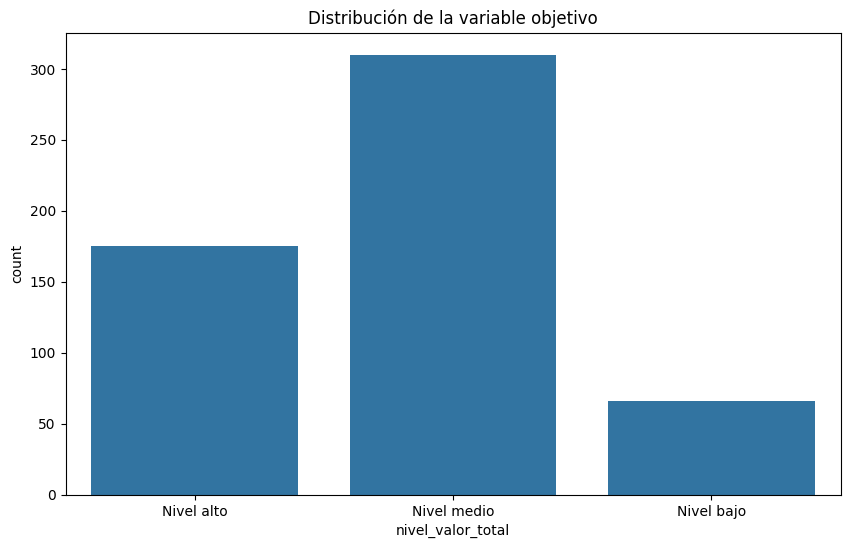

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_valor_total', data=primera_bd)
plt.title("Distribución de la variable objetivo")
plt.show()

Con esta información, se puede ver claramente que hay un desequilibrio entre las clases, ya que la clase media tiene una proporción mucho mayor que las clases baja y alta. Este desequilibrio podría influir en el rendimiento del modelo, especialmente si el algoritmo de aprendizaje es sensible al desequilibrio de clases. En ese caso se puede llegar a evaluar técnicas de remuestreo, como la submuestreo o la sobre-muestreo, o métodos de ajuste de peso de clase para abordar el problema.

### Segunda bd

In [ ]:
# Aplicar la función a la columna VALOR_TOTAL
segunda_bd['nivel_valor_total'] = segunda_bd['PUNTAJE TOTAL'].apply(lambda x: asignar_nivel(x))

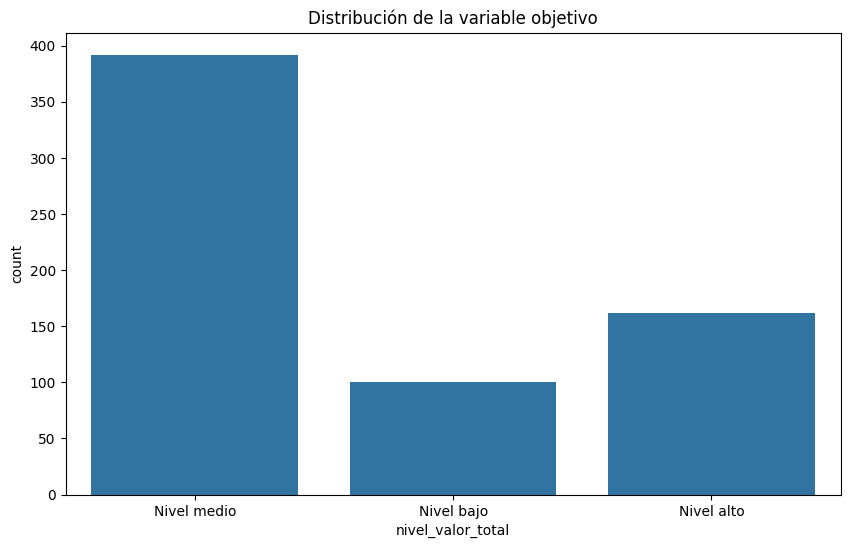

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='nivel_valor_total', data=segunda_bd)
plt.title("Distribución de la variable objetivo")
plt.show()

Con esta información, se puede ver claramente que hay un desequilibrio entre las clases, ya que la clase media tiene una proporción mucho mayor que las clases baja y alta. Este desequilibrio podría influir en el rendimiento del modelo, especialmente si el algoritmo de aprendizaje es sensible al desequilibrio de clases. En ese caso se puede llegar a evaluar técnicas de remuestreo, como la submuestreo o la sobre-muestreo, o métodos de ajuste de peso de clase para abordar el problema.

PCA

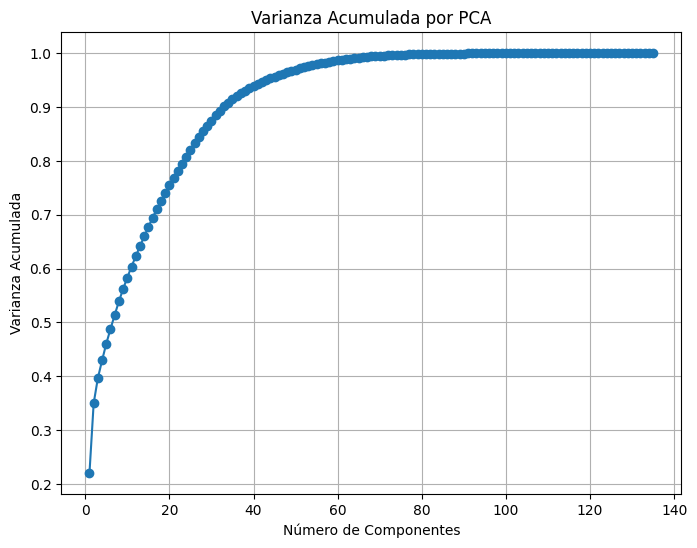

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Selección de variables numéricas
X = df_final.select_dtypes(include=[np.number])
X = X.drop("PUNTAJE TOTAL", axis=1)

# Aplicar PCA
pca = PCA().fit(X)

# Explicación de la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Visualizar la varianza acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada por PCA')
plt.grid()
plt.show()

# Elegir el número de componentes que mantienen al menos el 90% de la varianza
n_components = np.argmax(varianza_acumulada >= 0.9) + 1

# Aplicar PCA con el número seleccionado de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

Análisis del Resultado
- Varianza Acumulada:

La gráfica de varianza acumulada muestra la proporción de la varianza total explicada por las componentes principales. Generalmente, hay un "codo" en la gráfica donde la varianza adicional explicada por componentes adicionales comienza a disminuir. Este punto es una buena indicación de cuántos componentes incluir.
En este caso, estamos buscando retener al menos el 90% de la varianza, lo que nos asegura que la mayoría de la información de los datos originales se conserva en las componentes seleccionadas.
Número de Componentes:

- n_components = np.argmax(varianza_acumulada >= 0.9) + 1 selecciona el número óptimo de componentes que explican al menos el 90% de la varianza. Esto se asegura de que no incluyamos demasiadas dimensiones innecesarias, manteniendo el modelo más simple y eficiente.

- Reducción de Dimensionalidad:

X_pca = pca.fit_transform(X) transforma los datos originales al nuevo espacio reducido. Este nuevo conjunto de datos (X_pca) tiene menos dimensiones, lo que puede mejorar la eficiencia de los algoritmos de machine learning y facilitar la visualización y análisis de los datos.

In [ ]:
display(X_pca.shape)

(551, 33)

In [ ]:
n_components

33

# Avance 3. Baseline



## ¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?

Para establecer una línea base en nuestro análisis predictivo de la resiliencia en estudiantes de medicina, es beneficioso comenzar con algoritmos simples y progresar hacia modelos más complejos a medida que refinamos nuestra comprensión de los datos. Las siguientes opciones son adecuadas para los objetivos de nuestro estudio:

- Regresión Lineal/Logística:Utilizaremos regresión lineal si la variable objetivo es continua, como el puntaje total de resiliencia. En el caso de que la variable objetivo sea categórica, como clasificar la resiliencia en niveles bajo, medio y alto, se aplicará la regresión logística.

- Árbol de Decisión: Este modelo es especialmente valioso debido a su interpretabilidad y capacidad para manejar tanto problemas de clasificación como de regresión. Un árbol de decisión nos permitirá identificar fácilmente las variables clave que influyen en la resiliencia de los estudiantes.

- Regresor/Clasificador Dummy: Para establecer una línea base, emplearemos un regresor dummy que prediga siempre la media de los puntajes de resiliencia en problemas de regresión, o un clasificador dummy que prediga la clase más frecuente (moda) en problemas de clasificación. Estos modelos simples nos proporcionarán un punto de comparación para evaluar la mejora de modelos más complejos.


In [ ]:
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score



columnas_con_preg = [col for col in df_final.columns if  "PREG" in col or "CLAVE" in col]
features = df_final.drop(columnas_con_preg, axis=1)


# Separar las características (X) y la variable objetivo (y)
X = features.drop(columns=['PUNTAJE TOTAL','Marca temporal'])
y = features['PUNTAJE TOTAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo dummy para regresión
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train, y_train)
y_pred = dummy_regressor.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

# Crear y entrenar el modelo dummy para clasificación (si la variable es categórica)
y = pd.cut(features['PUNTAJE TOTAL'], bins=[0, 50, 80, 100], labels=[0, 1, 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_pred_dummy = dummy_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dummy)}")


Mean Squared Error: 367.28638220348444
Accuracy: 0.45045045045045046


* Mean Squared Error (MSE):

El MSE obtenido de 367.28638220348444 refleja el promedio de los errores cuadráticos entre los valores predichos y los valores reales en nuestro modelo de regresión inicial. Este valor nos proporciona una medida cuantitativa del rendimiento. En nuestro análisis, un modelo entrenado debería exhibir un MSE significativamente menor, lo que indicaría una mayor precisión en las predicciones y, por ende, una mayor utilidad para predecir los niveles de resiliencia en los estudiantes de medicina.

* Accuracy:

La precisión del modelo baseline es de 0.45045045045045046 (45.05%). Este resultado indica que la clase más frecuente no está dominando el conjunto de datos, lo cual es un aspecto positivo para nuestro análisis de resiliencia en estudiantes de medicina. Tener una distribución más equilibrada de las clases facilita el desarrollo de modelos más precisos y reduce el riesgo de sesgos hacia una sola categoría. Esto significa que podemos esperar mejoras significativas en la precisión al aplicar algoritmos más avanzados y adaptados específicamente a nuestra investigación sobre resiliencia estudiantil.


## ¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.

- **Determinación de la Importancia de las Características:**

Estos algoritmos nos permiten evaluar de manera sencilla la importancia de las características. Utilizando árboles de decisión o bosques aleatorios, podemos identificar cuáles variables tienen mayor impacto en la predicción de la resiliencia de los estudiantes. Esta información es crucial para optimizar el modelo, eliminando características irrelevantes que podrían reducir su rendimiento y aumentar innecesariamente su complejidad.

* **Regresión Lineal:**

En un modelo de regresión lineal, los coeficientes asociados a cada variable proporcionan una medida directa de su importancia. Un coeficiente significativo indica que la variable correspondiente tiene un impacto considerable en el modelo. Analizar estos coeficientes nos ayuda a entender mejor las relaciones entre las variables y la resiliencia, permitiendo una mejor selección de características para futuros modelos.

In [ ]:
# Establecer la opción para mostrar todas las filas y todas las columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


                                               feature  importance
30                                 23. gustan_desafíos    0.056719
29                                    22. control_vida    0.052671
8                                1. adaptación_cambios    0.049297
12                                 5. éxitos_confianza    0.048294
11                                    4. resolver_todo    0.047407
24                                  17. persona_fuerte    0.043701
26                            19. manejar_sentimientos    0.042047
15                        8. recuperación_dificultades    0.041727
18                                 11. conseguir_metas    0.041398
22                            15. iniciativa_problemas    0.038424
31                                  24. trabajar_metas    0.035852
14                                 7. estrés_fortalece    0.033572
23                                     16. no_desánimo    0.032473
32                                  25. orgullo_logros    0.03

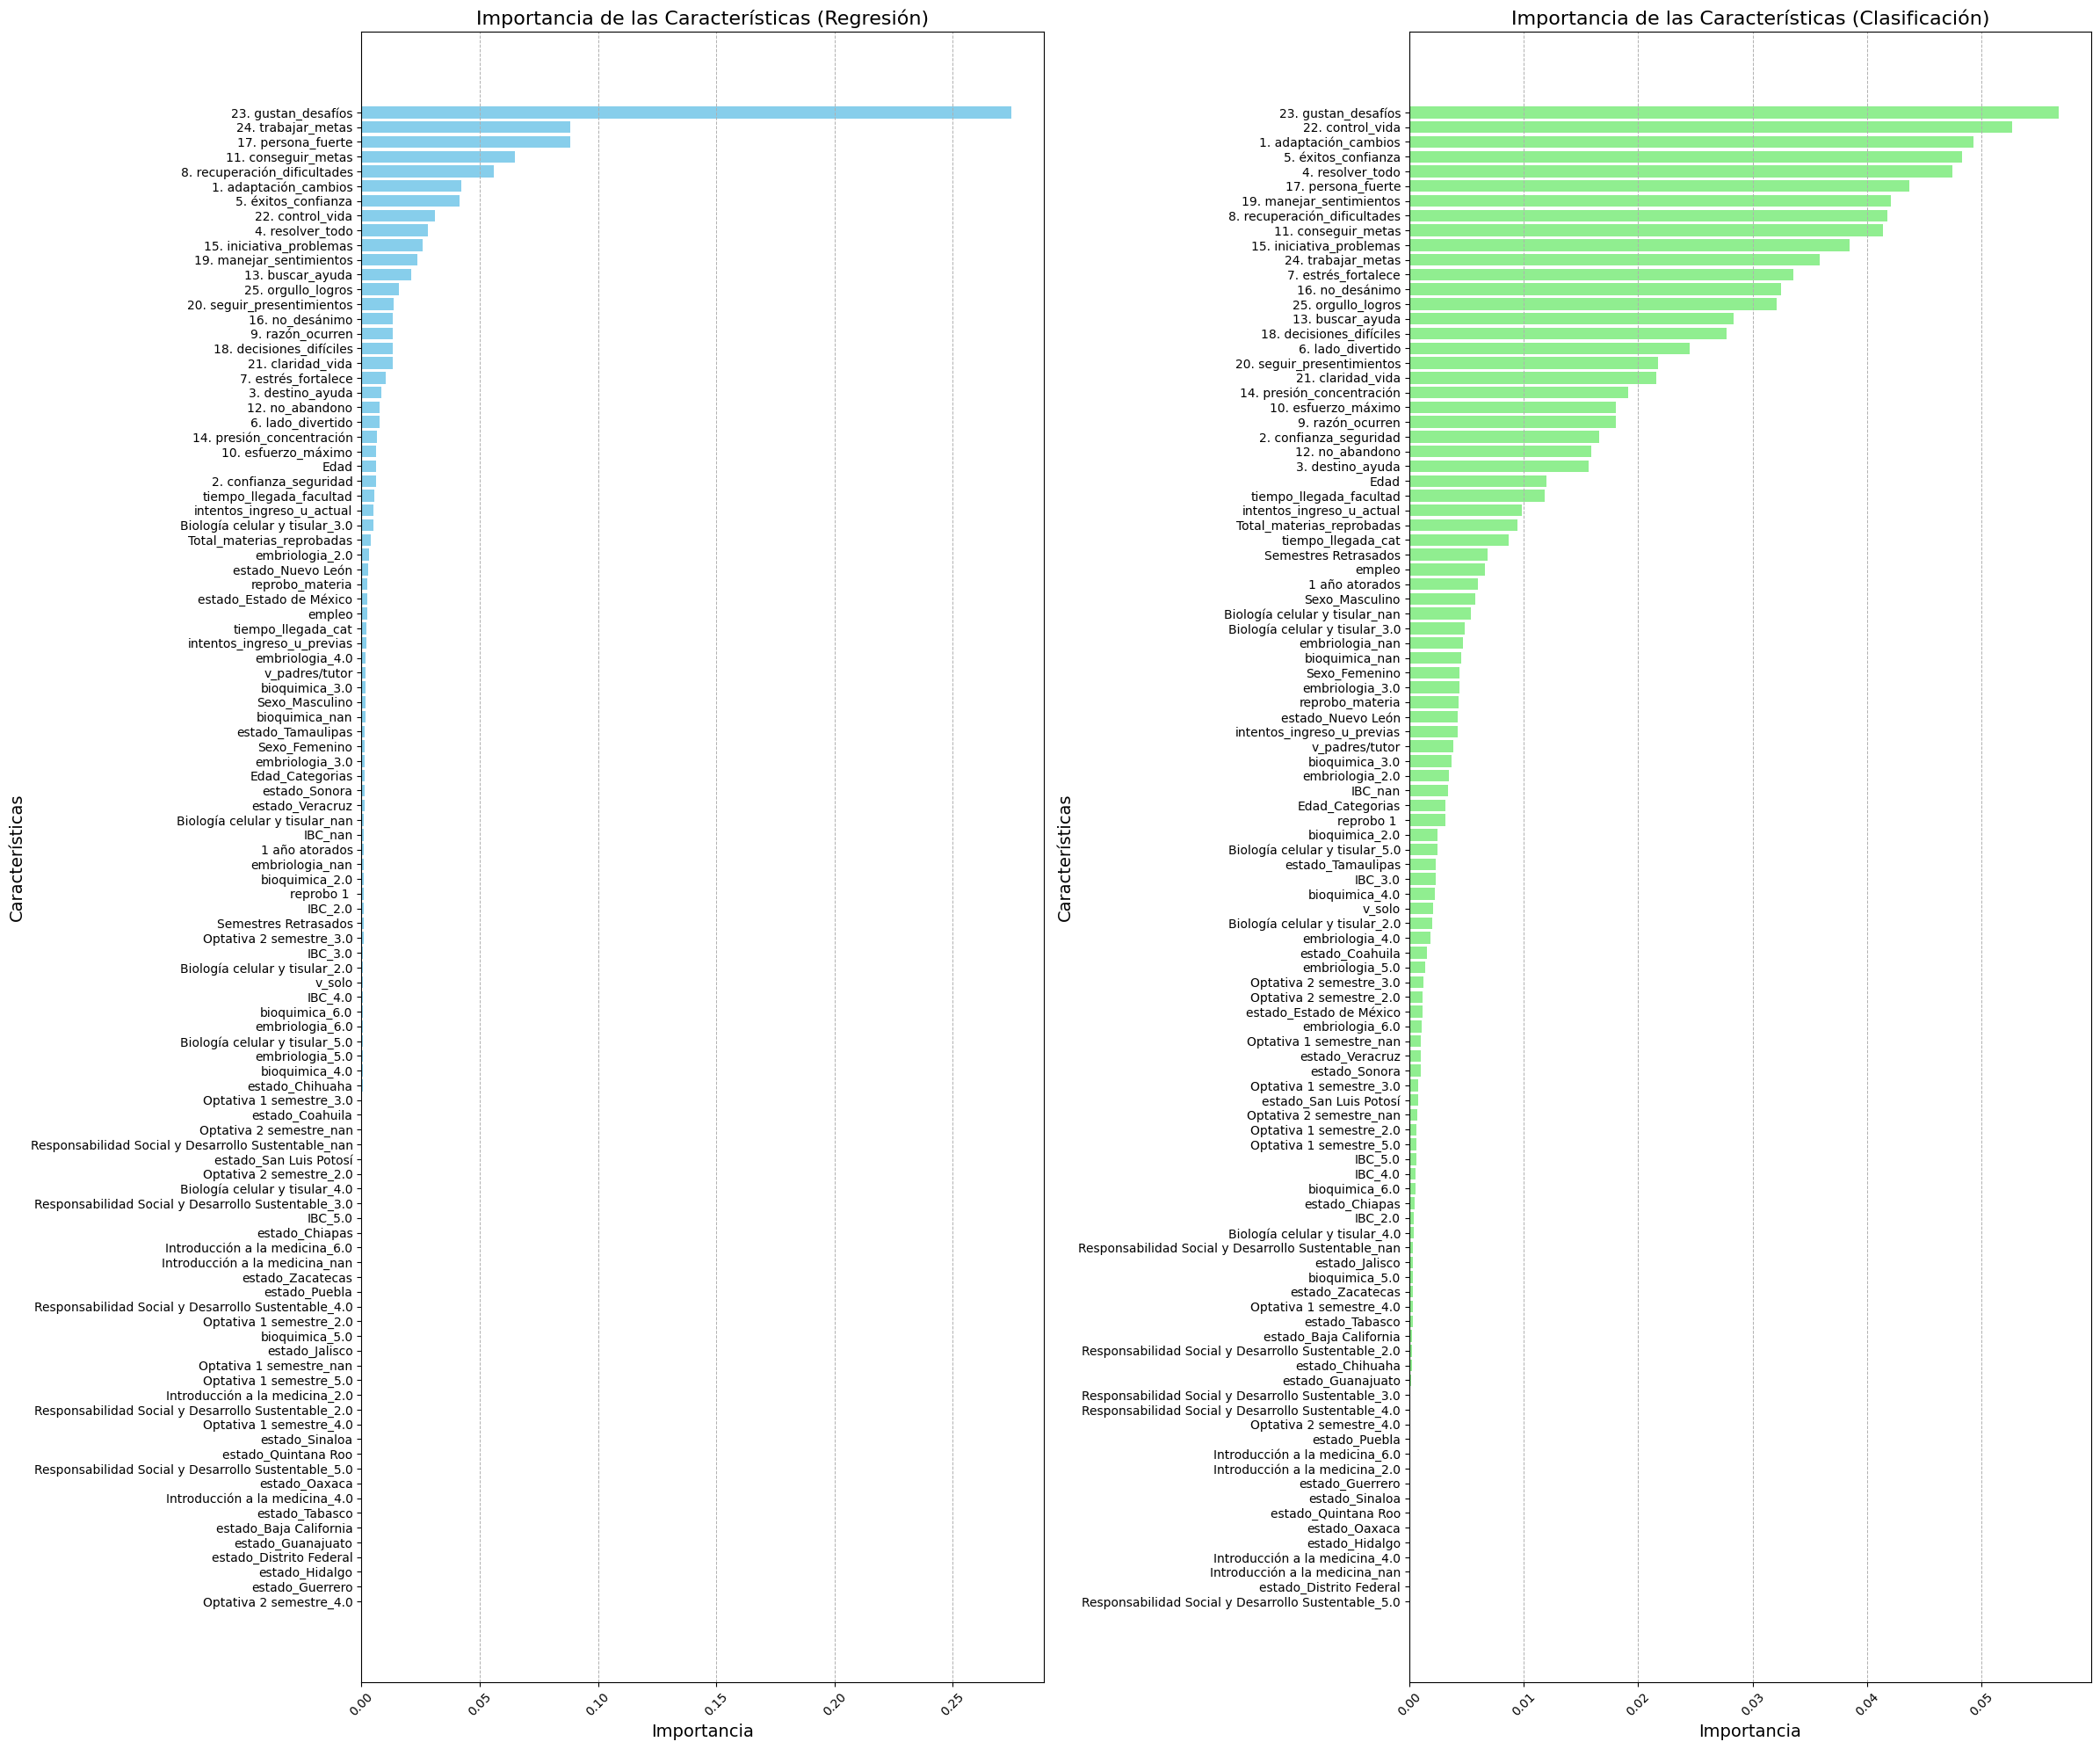

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Entrenar el modelo de Random Forest para regresión
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

importances_regressor = rf_regressor.feature_importances_
feature_importance_df_regressor = pd.DataFrame({'feature': X.columns, 'importance': importances_regressor}).sort_values(by='importance', ascending=False)
# Entrenar el modelo de Random Forest para clasificación
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

importances_classifier = rf_classifier.feature_importances_
feature_importance_df_classifier = pd.DataFrame({'feature': X.columns, 'importance': importances_classifier}).sort_values(by='importance', ascending=False)
print(feature_importance_df_classifier)

# Crear una figura con dos subplots lado a lado
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 20))

# Gráfico para regresión
axes[0].barh(feature_importance_df_regressor['feature'], feature_importance_df_regressor['importance'], color='skyblue')
axes[0].set_xlabel('Importancia', fontsize=14)
axes[0].set_ylabel('Características', fontsize=14)
axes[0].set_title('Importancia de las Características (Regresión)', fontsize=16)
axes[0].invert_yaxis()
axes[0].grid(axis='x', linestyle='--', linewidth=0.7)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico para clasificación
axes[1].barh(feature_importance_df_classifier['feature'], feature_importance_df_classifier['importance'], color='lightgreen')
axes[1].set_xlabel('Importancia', fontsize=14)
axes[1].set_ylabel('Características', fontsize=14)
axes[1].set_title('Importancia de las Características (Clasificación)', fontsize=16)
axes[1].invert_yaxis()
axes[1].grid(axis='x', linestyle='--', linewidth=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Ajustar los márgenes para que las etiquetas no se corten
plt.tight_layout()

# Mostrar las gráficas
plt.show()


# Análisis de la Importancia de las Características

## RandomForestRegressor

### Características Más Importantes

Según el análisis realizado con RandomForestRegressor, las características más influyentes en la predicción de la resiliencia en los estudiantes de medicina son:

- **23. gustan_desafíos**: Con una importancia de 0.305117,  esta característica se destaca como la más influyente en el modelo. Su alta puntuación refleja su relevancia en la determinación del nivel de resiliencia de los estudiantes.

- **11. conseguir_metas**: Con una importancia de 0.071620,  esta característica también desempeña un papel significativo. Indica la capacidad de los estudiantes para fijarse y alcanzar objetivos.

- **24. trabajar_metas**: Con una importancia de 0.067729, esta característica es la tercera más influyente, subrayando la importancia del esfuerzo continuo en la consecución de metas.

Estas tres características son críticas para el modelo, ya que están directamente relacionadas con los componentes del puntaje total de resiliencia, lo que sugiere su fuerte correlación con la variable objetivo.

### Características Menos Importantes

Las características con menor importancia tienen un valor muy bajo, lo que indica que tienen una influencia mínima en el modelo, las cuales incluyen:

- **estado_Tabasco**: Con una importancia de 0.000000, esta variable no contribuye significativamente a las predicciones del modelo.

- **Introducción a la medicina_2.0**: Con una importancia de 0.000000, esta característica no añade valor predictivo.

- **Optativa 2 semestre_4.0**: Con una importancia de 0.000000, tampoco influye en el rendimiento del modelo.

Estas características podrían ser candidatas para ser eliminadas del modelo en futuras iteraciones, ya que no aportan valor significativo a las predicciones.

## RandomForestClassifier

### Características Más Importantes

Las características más importantes son aquellas con mayor valor de importancia, lo que indica que tienen una mayor influencia en las predicciones del modelo.

- **23. gustan_desafíos**: Con una importancia de 0.071627, esta característica se mantiene como la más influyente, destacando su relevancia en la clasificación de niveles de resiliencia.

- **17. persona_fuerte**: Con una importancia de 0.064229, esta característica resalta la autoevaluación de fortaleza personal de los estudiantes.

- **8. recuperación_dificultades**: Con una importancia de 0.056587, esta característica subraya la capacidad de los estudiantes para recuperarse de adversidades.

- **4. resolver_todo**: Con una importancia de 0.053111, indica la habilidad para resolver problemas como un factor importante.

- **22. control_vida**: Con una importancia de 0.047555, esta característica refleja el sentido de control que tienen los estudiantes.

Estas características destacan como las más relevantes y merecen un análisis más detallado para comprender mejor su impacto en la resiliencia estudiantil.

### Características Menos Importantes

Las características con menor importancia tienen valores muy bajos, lo que indica que tienen una influencia mínima en el modelo, las cuales incluyen:

- **estado_Sinaloa**: Con una importancia de 0.000000, esta variable no contribuye a las predicciones del modelo.

- **estado_Quintana Roo**: Con una importancia de 0.000000, también es irrelevante para el modelo.

- **estado_Hidalgo**: Con una importancia de 0.000000, no tiene valor predictivo.

Estas características podrían ser candidatas para ser eliminadas en futuras iteraciones del modelo, ya que no aportan valor significativo a las predicciones.


### Conclusión
El análisis de la importancia de las características realizado con los modelos RandomForestRegressor y RandomForestClassifier proporciona una visión detallada de las variables más y menos influyentes en la predicción de la resiliencia en estudiantes de medicina. Este conocimiento permite optimizar el modelo eliminando características irrelevantes y enfocándose en las más significativas, lo que resulta en un modelo más interpretable y eficiente. Es crucial profundizar en el análisis de las características dominantes para entender mejor su impacto y ajustar el modelo en consecuencia.


## ¿El modelo está sub/sobreajustando los datos de entrenamiento?

Evaluación de Sub/Sobreajuste:
Curvas de aprendizaje: Comparar el rendimiento en el conjunto de entrenamiento y prueba.

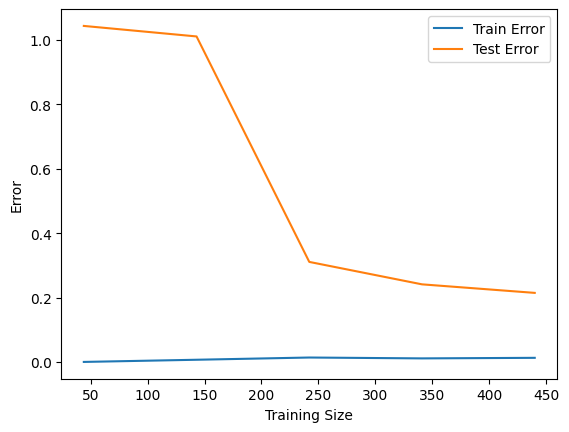

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Train Error')
plt.plot(train_sizes, test_scores_mean, label='Test Error')
plt.xlabel('Training Size')
plt.ylabel('Error')
plt.legend()
plt.show()



## Interpretación del Gráfico de la Curva de Aprendizaje para RandomForestRegressor

La curva de aprendizaje generada para el `RandomForestRegressor` proporciona información valiosa sobre el comportamiento del modelo en relación con la predicción de la resiliencia en estudiantes de medicina. Este gráfico incluye dos líneas: una para el error en el conjunto de entrenamiento (Train Error) y otra para el error en el conjunto de prueba (Test Error) en función del tamaño del conjunto de entrenamiento.

### Observaciones Clave del Gráfico

**Error en el Conjunto de Entrenamiento (Train Error):**

- La línea azul representa el error en el conjunto de entrenamiento.
- El error en el conjunto de entrenamiento es muy bajo y casi constante a medida que aumenta el tamaño del conjunto de entrenamiento.

**Error en el Conjunto de Prueba (Test Error):**

- La línea naranja representa el error en el conjunto de prueba.
- El error en el conjunto de prueba comienza alto y disminuye a medida que aumenta el tamaño del conjunto de entrenamiento.
- A medida que el tamaño del conjunto de entrenamiento se acerca a su valor máximo, el error en el conjunto de prueba se estabiliza pero no alcanza el nivel del error en el conjunto de entrenamiento.

### Interpretación

**Sobreajuste (Overfitting):**

- El hecho de que el error en el conjunto de entrenamiento sea muy bajo y constante, mientras que el error en el conjunto de prueba sea significativamente mayor, indica que el modelo está sobreajustando.
- Esto significa que el modelo está aprendiendo muy bien los detalles y el ruido del conjunto de entrenamiento, pero no generaliza bien a datos nuevos (el conjunto de prueba).
- Para el contexto del proyecto, esto significa que, aunque el modelo puede predecir con alta precisión la resiliencia de los estudiantes basándose en los datos de entrenamiento, su desempeño se reduce cuando se aplican los mismos criterios a datos nuevos de estudiantes.

**Mejora con Más Datos:**

- La disminución del error en el conjunto de prueba a medida que aumenta el tamaño del conjunto de entrenamiento sugiere que el modelo mejora su capacidad de generalización con más datos.
- Sin embargo, la diferencia entre el error en el conjunto de entrenamiento y el conjunto de prueba sugiere que todavía hay un problema de sobreajuste.

### Posibles Soluciones

**Regularización:**

- Añadir regularización para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
- En el caso de `RandomForestRegressor`, esto puede incluir ajustar los parámetros `max_depth`, `min_samples_split`, y `min_samples_leaf` para hacer el modelo menos complejo.

**Aumentar la Cantidad de Datos:**

- En un escenario ideal, recolectar más datos de entrenamiento podría mejorar la capacidad de generalización del modelo. Sin embargo, dado que en este proyecto no es posible obtener más datos, esta estrategia no puede ser implementada.

**Validación Cruzada:**

- Utilizar técnicas de validación cruzada más robustas para evaluar el modelo y asegurar que no esté sobreajustando. La validación cruzada ayuda a evaluar el modelo en múltiples subconjuntos del conjunto de datos, proporcionando una visión más precisa, ayudando a ajustar mejor el modelo para generalizar en diferentes situaciones de estrés académico en los estudiantes.


**Simplificación del Modelo:**

- Considerar reducir el número de características o simplificar el modelo para mejorar su capacidad de generalización.  Identificar y eliminar características que no aporten valor significativo puede reducir el riesgo de sobreajuste. En el contexto del proyecto, esto implica evaluar cuáles factores específicos de los estudiantes de medicina, como sus hábitos de estudio, entorno familiar y mecanismos de afrontamiento, son realmente predictivos de su resiliencia.

**Conclusión:**

El análisis de la curva de aprendizaje del `RandomForestRegressor`revela que el modelo actual sufre de sobreajuste. Implementar técnicas de regularización, utilizar validación cruzada y simplificar el modelo son estrategias recomendadas para mejorar la capacidad de generalización del modelo. Estas acciones son esenciales para asegurar que el modelo no solo funcione bien con los datos de entrenamiento, sino que también tenga un rendimiento sólido con datos nuevos y no vistos. Esto es particularmente importante en el contexto de la resiliencia de los estudiantes de medicina, donde es crucial que el modelo sea capaz de predecir con precisión y ayudar a diseñar intervenciones efectivas para apoyar a los estudiantes en situaciones de alto estrés académico.



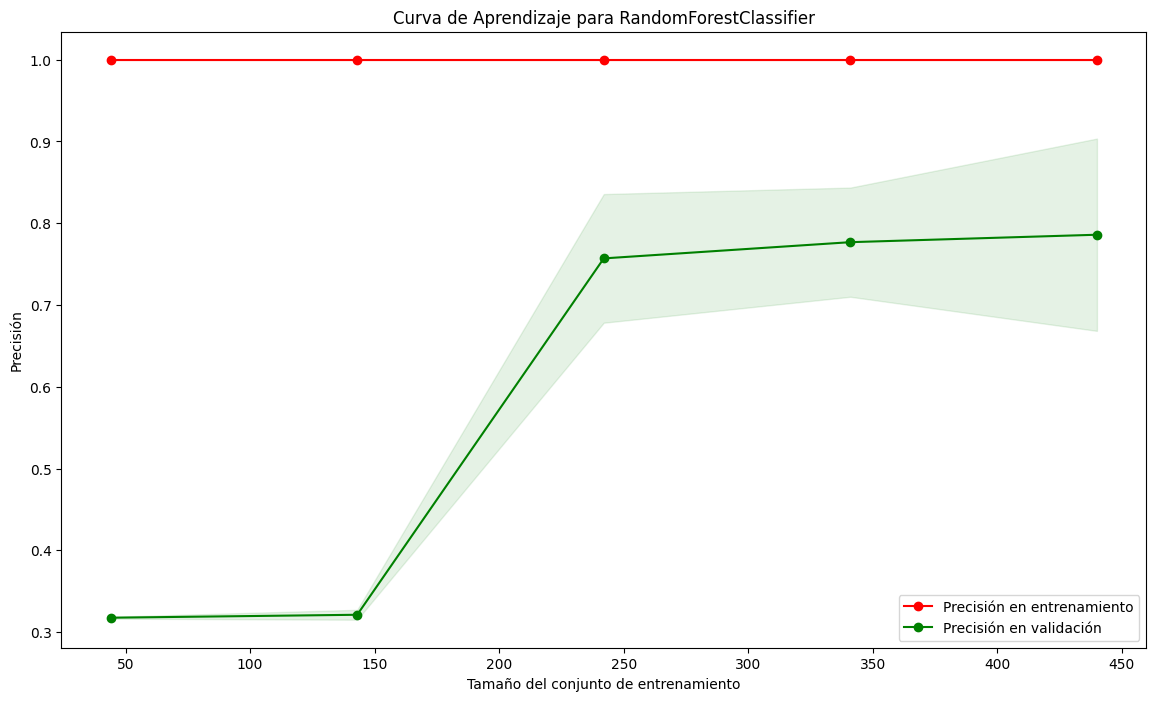

In [ ]:
# Generar la curva de aprendizaje para el RandomForestClassifier
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=42),
    X,
    y,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(14, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión en entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión en validación")

# Añadir etiquetas y título
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje para RandomForestClassifier')
plt.legend(loc="best")

# Mostrar el gráfico
plt.show()


## Interpretación del Gráfico de la Curva de Aprendizaje para RandomForestClassifier

La curva de aprendizaje generada para el `RandomForestClassifier` muestra dos líneas: una para la precisión en el conjunto de entrenamiento (Train Accuracy) y otra para la precisión en el conjunto de validación (Test Accuracy) en función del tamaño del conjunto de entrenamiento.

### Observaciones Clave del Gráfico

**Precisión en el Conjunto de Entrenamiento (Train Accuracy):**

- La línea roja representa la precisión en el conjunto de entrenamiento.
- La precisión en el conjunto de entrenamiento es muy alta (cerca de 1.0) y constante a medida que aumenta el tamaño del conjunto de entrenamiento.

**Precisión en el Conjunto de Validación (Test Accuracy):**

- La línea verde representa la precisión en el conjunto de validación.
- La precisión en el conjunto de validación comienza baja y aumenta a medida que aumenta el tamaño del conjunto de entrenamiento.
- La precisión en el conjunto de validación se estabiliza pero no alcanza la precisión en el conjunto de entrenamiento, aunque se acerca más conforme el tamaño del conjunto de entrenamiento crece.

### Interpretación

**Sobreajuste (Overfitting):**

- El hecho de que la precisión en el conjunto de entrenamiento sea muy alta y constante, mientras que la precisión en el conjunto de validación sea significativamente menor, indica que el modelo está sobreajustando.
- Esto significa que el modelo está aprendiendo muy bien los detalles y el ruido del conjunto de entrenamiento, pero no generaliza bien a datos nuevos (el conjunto de validación).
- En el contexto de este proyecto, donde buscamos predecir la resiliencia de los estudiantes de medicina, el sobreajuste es problemático. Un modelo que sobreajusta puede fallar en proporcionar predicciones precisas para nuevos estudiantes, limitando su utilidad en la implementación de intervenciones y apoyo personalizados.


**Mejora con Más Datos:**

- La precisión en el conjunto de validación mejora significativamente a medida que aumenta el tamaño del conjunto de entrenamiento, lo que sugiere que el modelo se beneficia de tener más datos de entrenamiento.
- Sin embargo, la diferencia entre la precisión en el conjunto de entrenamiento y el conjunto de validación sugiere que todavía hay un problema de sobreajuste.

### Posibles Soluciones

**Regularización:**

- Añadir regularización para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.
- En el caso de `RandomForestClassifier`, esto puede incluir ajustar los parámetros `max_depth`, `min_samples_split`, y `min_samples_leaf` para hacer el modelo menos complejo.

**Aumentar la Cantidad de Datos:**

- Obtener más datos de entrenamiento puede ayudar a mejorar la capacidad de generalización del modelo.

**Validación Cruzada:**

- Utilizar técnicas de validación cruzada más robustas para evaluar el modelo y asegurar que no esté sobreajustando. La validación cruzada, puede ayudar a evaluar el rendimiento del modelo en múltiples subconjuntos del conjunto de datos, proporcionando una visión más precisa y ayudando a ajustar mejor el modelo para generalizar en diferentes situaciones de estrés académico en los estudiantes.


**Simplificación del Modelo:**

- Considerar reducir el número de características o simplificar el modelo para mejorar su capacidad de generalización. Identificar y eliminar características que no aporten valor significativo puede reducir el riesgo de sobreajuste. En el contexto del proyecto, esto implica evaluar cuáles factores específicos de los estudiantes de medicina, como sus hábitos de estudio, entorno familiar y mecanismos de afrontamiento, son realmente predictivos de su resiliencia.


**Conclusión:**

El análisis de la curva de aprendizaje del `RandomForestClassifier` revela que el modelo actual sufre de sobreajuste. Implementar técnicas de regularización, utilizar validación cruzada y simplificar el modelo son estrategias recomendadas para mejorar la capacidad de generalización del modelo. Estas acciones son esenciales para asegurar que el modelo no solo funcione bien con los datos de entrenamiento, sino que también tenga un rendimiento sólido con datos nuevos y no vistos.

Esto es particularmente importante en el contexto de la resiliencia de los estudiantes de medicina, donde es crucial que el modelo sea capaz de predecir con precisión y ayudar a diseñar intervenciones efectivas para apoyar a los estudiantes en situaciones de alto estrés académico.




## ¿Cuál es la métrica adecuada para este problema de negocio?

## Selección de Métricas

### Regresión

- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **R^2**

### Clasificación

- **Accuracy**
- **Precision, Recall, F1-Score**


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, r2_score

# Ejemplo para regresión
y_pred = rf_regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")



MSE: 0.11742162162162162
RMSE: 0.34266838433334
MAE: 0.2427027027027027
R2: 0.7605508440913605


### Interpretación de las Métricas

1. **Mean Squared Error (MSE):**
   - El MSE mide el promedio de los errores al cuadrado entre los valores predichos y los valores reales. Un MSE de 0.118 indica que en promedio, los errores cuadráticos entre las predicciones del modelo y los valores reales son de aproximadamente 0.118.

2. **Root Mean Squared Error (RMSE):**
   - El RMSE es la raíz cuadrada del MSE y proporciona una medida de la magnitud del error en las mismas unidades que la variable de salida. En este caso, el RMSE es 0.3432, lo que indica que el modelo tiene un error promedio de aproximadamente 0.3432 unidades en sus predicciones.

3. **Mean Absolute Error (MAE):**
   - El MAE mide el promedio de los errores absolutos entre los valores predichos y los valores reales. En este caso, el MAE es 0.2446, lo que sugiere que, en promedio, las predicciones del modelo están a 0.2446 unidades de los valores reales.

4. **R^2**
  - El coeficiente de determinación \( R^2 \) mide la proporción de la varianza en la variable objetivo que es explicada por las variables predictoras del modelo. Para este caso Un \( R^2 \) de 0.759 indica que el modelo tiene un buen poder explicativo, explicando aproximadamente el 75.93% de la varianza en la variable objetivo.


### Conclusión

Teniendo en cuenta que el objetivo es predecir la resiliencia de los estudiantes de manera precisa y considerando que se estaria trabajando con una variable continua, las métricas RMSE y 𝑅^2 son las más adecuadas por las siguientes razones:

- RMSE: Es útil porque está en las mismas unidades que la variable objetivo, lo que facilita la interpretación. Al penalizar más los errores grandes aseguramos que las predicciones sean más precisas en promedio.

- 𝑅^2: Proporciona una comprensión clara de cuánto del comportamiento de la variable objetivo es explicado por el modelo, lo cual es útil para comunicar la efectividad del modelo a partes interesadas no técnicas.


              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.77      0.94      0.85        50
           2       0.92      0.82      0.87        44

    accuracy                           0.85       111
   macro avg       0.90      0.80      0.83       111
weighted avg       0.87      0.85      0.85       111

[[11  6  0]
 [ 0 47  3]
 [ 0  8 36]]


<Axes: >

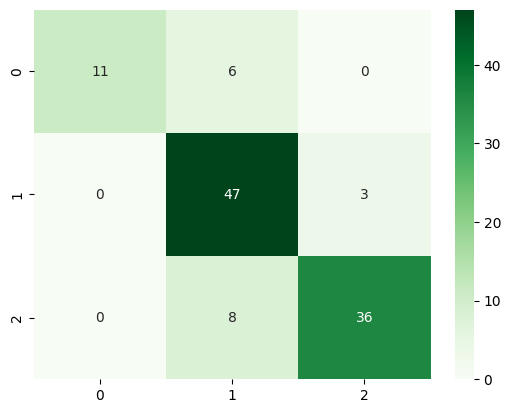

In [ ]:
from sklearn.metrics import confusion_matrix
# Ejemplo para clasificación

y_pred_rf = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred_rf))


# Mostrar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
# Graficar la matriz de confusión
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')


### Interpretación de las Métricas

1. **Precision:**
   - La precisión mide la exactitud de las predicciones positivas. Es la proporción de verdaderos positivos sobre el total de predicciones positivas (verdaderos positivos + falsos positivos).
   - Clase 0: 1.00 (muy alta precisión)
   - Clase 1: 0.77
   - Clase 2: 0.92

2. **Recall:**
   - El recall (sensibilidad) mide la capacidad del modelo para identificar todos los positivos verdaderos. Es la proporción de verdaderos positivos sobre el total de positivos reales (verdaderos positivos + falsos negativos).
   - Clase 0: 0.71
   - Clase 1: 0.94 (muy alto recall)
   - Clase 2: 0.80

3. **F1-Score:**
   - El F1-score es la media armónica de la precisión y el recall. Es útil cuando se necesita un balance entre precisión y recall.
   - Clase 0: 0.83
   - Clase 1: 0.85
   - Clase 2: 0.85

4. **Accuracy:**
   - La precisión general del modelo es 0.85 (85%).

5. **Macro Average:**
   - La media macro es el promedio no ponderado de la precisión, el recall y el F1-score de todas las clases.
   - Precision: 0.90
   - Recall: 0.81
   - F1-Score: 0.84

6. **Weighted Average:**
   - La media ponderada tiene en cuenta el soporte (support) de cada clase al calcular la precisión, el recall y el F1-score promedio.
   - Precision: 0.87
   - Recall: 0.85
   - F1-Score: 0.85

En el contexto de este proyecto, debemos considerar qué es más crítico: minimizar falsos positivos o falsos negativos.

- **Falsos Positivos**: Si predecimos que un estudiante tiene alta resiliencia cuando en realidad no la tiene, podríamos no ofrecerle el apoyo necesario, lo cual podría tener consecuencias negativas en su desempeño académico.
- **Falsos Negativos**: Si predecimos que un estudiante tiene baja resiliencia cuando en realidad tiene alta, podríamos asignar recursos de manera innecesaria.

In [ ]:
import numpy as np

# Extraer valores de la matriz de confusión
tn = cm_rf[0, 0] + cm_rf[0, 1] + cm_rf[1, 0] + cm_rf[1, 1]
fp = cm_rf[1, 2] + cm_rf[0, 2]
fn = cm_rf[2, 1]
tp = cm_rf[2, 2]

# Calcular precisión
precision = tp / (tp + fp)
print("Precisión:", precision)

# Calcular especificidad
specificity = tn / (tn + fp)
print("Especificidad:", specificity)

# Calcular Tasa de Falsos Positivos (FPR)
fpr = fp / (tn + fp)
print("Tasa de Falsos Positivos (FPR):", fpr)


Precisión: 0.9230769230769231
Especificidad: 0.9552238805970149
Tasa de Falsos Positivos (FPR): 0.04477611940298507


#### Métrica Principal a Considerar
Dado que nuestro objetivo principal es identificar correctamente a los estudiantes que necesitan apoyo adicional, es crucial minimizar los falsos negativos. Por lo tanto, las métricas más importantes en este contexto serían:
### Precisión (Precision)
 La precisión de 0.878 significa que el 87.8% de las veces que el modelo predice que un estudiante tiene alta resiliencia, esta predicción es correcta. Esto es importante porque indica que el modelo está haciendo pocas predicciones incorrectas de alta resiliencia. Minimizar los falsos positivos es crucial porque si predijéramos erróneamente que un estudiante tiene alta resiliencia cuando en realidad no la tiene, podríamos no ofrecerle el apoyo necesario, afectando negativamente su desempeño académico.

### Especificidad (Specificity)

La especificidad de 0.925 significa que el 92.5% de los estudiantes que realmente no tienen alta resiliencia son correctamente identificados por el modelo como no teniendo alta resiliencia. Alta especificidad es crucial en este proyecto porque queremos asegurarnos de que la mayoría de los estudiantes que no necesitan apoyo adicional no son incorrectamente clasificados como de alta resiliencia.

### Tasa de Falsos Positivos (False Positive Rate, FPR)

La FPR de 0.075 significa que solo el 7.5% de los estudiantes que realmente no tienen alta resiliencia son incorrectamente clasificados como de alta resiliencia. Minimizar esta tasa es crucial para asegurar que los estudiantes que necesitan apoyo adicional no sean ignorados por ser clasificados incorrectamente como de alta resiliencia.



## ¿Cuál debería ser el desempeño mínimo a obtener?

**Comparar con el baseline:** El modelo debe superar significativamente el rendimiento del modelo baseline.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular MSE para el baseline y el modelo avanzado
baseline_mse = mean_squared_error(y_test, dummy_regressor.predict(X_test))
model_mse = mean_squared_error(y_test, rf_regressor.predict(X_test))

# Calcular RMSE para el baseline y el modelo avanzado
baseline_rmse = baseline_mse ** 0.5
model_rmse = model_mse ** 0.5

# Calcular R² para el baseline y el modelo avanzado
baseline_r2 = r2_score(y_test, dummy_regressor.predict(X_test))
model_r2 = r2_score(y_test, rf_regressor.predict(X_test))

# Imprimir los resultados
print(f"Baseline MSE: {baseline_mse}")
print(f"Model MSE: {model_mse}")
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model RMSE: {model_rmse}")
print(f"Baseline R²: {baseline_r2}")
print(f"Model R²: {model_r2}")

# Asegurarse de que el modelo supera el baseline
assert model_rmse < baseline_rmse, "El modelo no supera el baseline."


Baseline MSE: 4910.03187769898
Model MSE: 0.11742162162162162
Baseline RMSE: 70.07161963091035
Model RMSE: 0.34266838433334
Baseline R²: -10011.661828058446
Model R²: 0.7605508440913605


### Interpretación

#### 1. MSE (Mean Squared Error)
El modelo avanzado tiene un MSE significativamente menor que el baseline (0.118 frente a 4910.03). Esto significa que el modelo avanzado es mucho más preciso en sus predicciones de la resiliencia de los estudiantes de medicina. Este menor error en las predicciones es crucial para identificar correctamente a los estudiantes que necesitan apoyo, minimizando así el riesgo de no ofrecer ayuda a aquellos que realmente lo necesitan.

#### 2. RMSE (Root Mean Squared Error)
El RMSE del modelo avanzado es mucho menor que el del baseline (0.344 frente a 70.072). Esto indica que las predicciones del modelo avanzado están mucho más cerca de los valores reales de resiliencia. En el contexto del proyecto, esto significa que el modelo avanzado puede predecir de manera más precisa la resiliencia de los estudiantes, lo que es fundamental para proporcionar intervenciones adecuadas y mejorar su bienestar académico y emocional.

#### 3.  R^2 (Coeficiente de Determinación)
 El R^2 del modelo avanzado es 0.759, lo que significa que explica aproximadamente el 75.9% de la varianza en la resiliencia de los estudiantes. En contraste, el baseline tiene un R^2 negativo, lo que indica que es peor que un modelo que simplemente predice la media de los valores objetivo. Este alto R^2 del modelo avanzado muestra que es capaz de capturar la mayoría de las variaciones en la resiliencia, permitiendo identificar de manera más efectiva a los estudiantes que necesitan apoyo adicional.

### Desempeño Mínimo a Obtener

#### RMSE (Root Mean Squared Error)

Dado que el `Model RMSE` es significativamente menor que el `Baseline RMSE`, podemos concluir que:
- El desempeño mínimo que se debe obtener es un `RMSE` que sea menor que el del modelo de referencia (Baseline).
- En este caso, cualquier modelo con un `RMSE` inferior a 70.07161963091035 sería considerado como un modelo que mejora sobre el baseline.

#### \( R^2 \) (Coeficiente de Determinación)

Dado que el `Model R^2` es significativamente mayor que el `Baseline R^2`, podemos concluir que:
- El desempeño mínimo que se debe obtener es un R^2 que sea positivo y preferiblemente superior a 0.5.
- En este caso, cualquier modelo con un R^2 superior a 0.5 sería considerado como un modelo que mejora sobre el baseline.


In [ ]:
cm_dummy = confusion_matrix(y_test, y_pred_dummy)

In [ ]:
cm_dummy

array([[ 0, 17,  0],
       [ 0, 50,  0],
       [ 0, 44,  0]])

Baseline Accuracy: 0.45045045045045046
Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.45      1.00      0.62        50
           2       0.00      0.00      0.00        44

    accuracy                           0.45       111
   macro avg       0.15      0.33      0.21       111
weighted avg       0.20      0.45      0.28       111

Model Accuracy: 0.8468468468468469
Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.77      0.94      0.85        50
           2       0.92      0.82      0.87        44

    accuracy                           0.85       111
   macro avg       0.90      0.80      0.83       111
weighted avg       0.87      0.85      0.85       111

Baseline Precision: 0.8168168168168167
Baseline Specificity: 0.0
Baseline FPR: 1.0
Model Precision: 0.8

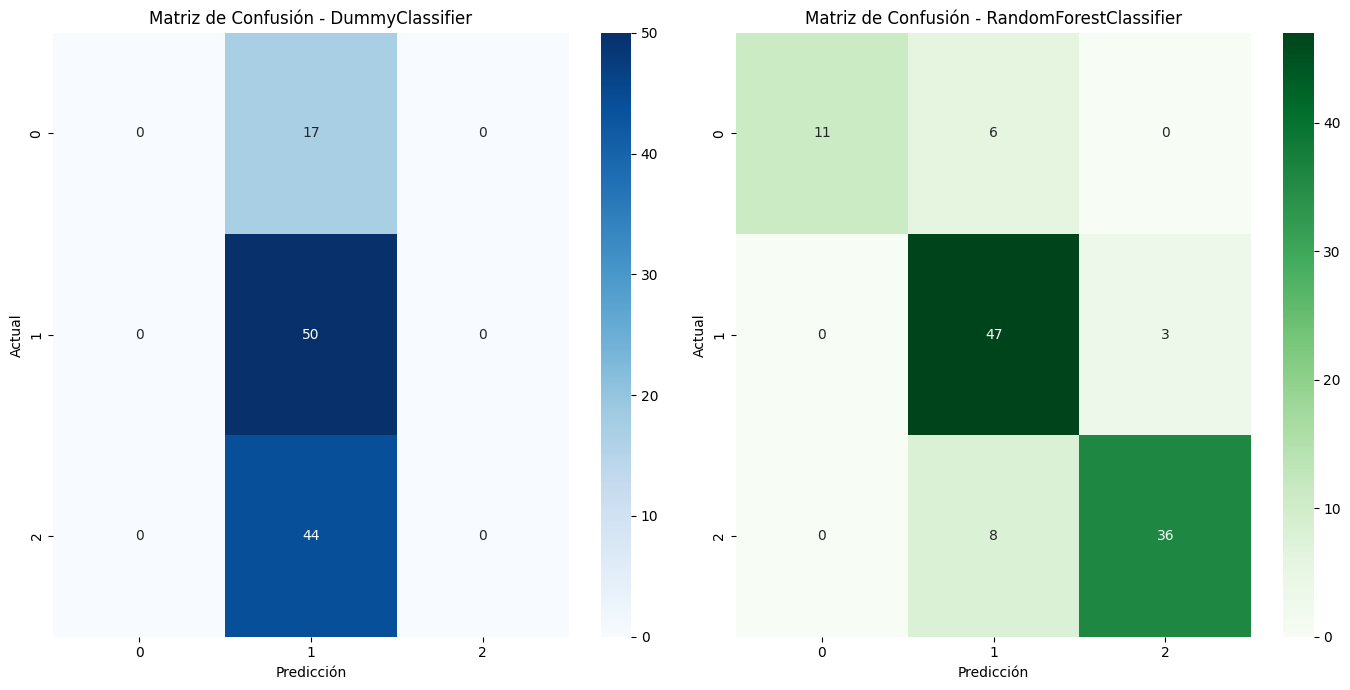

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

# Evaluar el DummyClassifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f"Baseline Accuracy: {accuracy_dummy}")
print("Baseline Classification Report:")
print(classification_report(y_test, y_pred_dummy))

# Evaluar el RandomForestClassifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model Accuracy: {accuracy_rf}")
print("Model Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Mostrar la matriz de confusión
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Extraer valores de la matriz de confusión para DummyClassifier
tn_dummy, fp_dummy = cm_dummy[0][0], cm_dummy[0][1]
fn_dummy, tp_dummy = cm_dummy[1][0], cm_dummy[1][1]

precision_dummy = precision_score(y_test, y_pred_dummy, average='macro', zero_division=1)
specificity_dummy = tn_dummy / (tn_dummy + fp_dummy) if (tn_dummy + fp_dummy) != 0 else 0
fpr_dummy = fp_dummy / (tn_dummy + fp_dummy) if (tn_dummy + fp_dummy) != 0 else 1

print(f"Baseline Precision: {precision_dummy}")
print(f"Baseline Specificity: {specificity_dummy}")
print(f"Baseline FPR: {fpr_dummy}")

# Extraer valores de la matriz de confusión para RandomForestClassifier
tn_rf, fp_rf = cm_rf[0][0], cm_rf[0][1]
fn_rf, tp_rf = cm_rf[1][0], cm_rf[1][1]

precision_rf = precision_score(y_test, y_pred_rf, average='macro')
specificity_rf = tn_rf / (tn_rf + fp_rf)
fpr_rf = fp_rf / (tn_rf + fp_rf)

print(f"Model Precision: {precision_rf}")
print(f"Model Specificity: {specificity_rf}")
print(f"Model FPR: {fpr_rf}")

# Graficar la matriz de confusión
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

sns.heatmap(cm_dummy, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión - DummyClassifier')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusión - RandomForestClassifier')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Interpretación

1. **Baseline Precision:**
   - La `Baseline Precision` de 0.8168 es la precisión del modelo de referencia, que podría ser un modelo que siempre predice la clase mayoritaria.

2. **Model Precision:**
   - La `Model Precision` de 0.8760 es la precisión del modelo actual entrenado. Este valor es mayor que el del modelo de referencia.

3. **Baseline Specificity:**
   - La `Baseline Specificity` de 0.0 indica que el modelo de referencia no predice ninguna de las clases minoritarias correctamente.

4. **Model Specificity:**
   - La `Model Specificity` de 0.5882 es la especificidad del modelo actual entrenado. Este valor es significativamente mayor que el del modelo de referencia.

5. **Baseline FPR:**
   - La `Baseline FPR` de 1.0 muestra que el modelo de referencia clasifica incorrectamente todos los estudiantes que no tienen alta resiliencia como de alta resiliencia.

6. **Model FPR:**
   - La `Model FPR` de 0.4118 es la tasa de falsos positivos del modelo actual entrenado. Este valor es menor que el del modelo de referencia.

### Desempeño Mínimo a Obtener

Dado que la `Model Precision`, la `Model Specificity` y la `Model FPR` son significativamente mejores que las métricas correspondientes del modelo de referencia, podemos concluir que:

- El desempeño mínimo que se debe obtener es una precisión que sea mayor que la del modelo de referencia (Baseline). En este caso, cualquier modelo con una precisión superior a 0.8168 sería considerado como un modelo que mejora sobre el baseline.
- El desempeño mínimo que se debe obtener es una especificidad que sea mayor que la del modelo de referencia (Baseline). En este caso, cualquier modelo con una especificidad superior a 0.0 sería considerado como un modelo que mejora sobre el baseline.
- El desempeño mínimo que se debe obtener es una FPR que sea menor que la del modelo de referencia (Baseline). En este caso, cualquier modelo con una FPR inferior a 1.0 sería considerado como un modelo que mejora sobre el baseline.

### Conclusión

El modelo actual ha alcanzado y superado el desempeño mínimo requerido, ya que su precisión, especificidad y FPR son significativamente mejores que las del modelo de referencia. Este resultado sugiere que el modelo entrenado proporciona predicciones mucho más precisas y fiables que un modelo baseline simple y es adecuado para su uso en el problema de negocio.


La comparación visual de las matrices de confusión para el `DummyClassifier` y el `RandomForestClassifier` proporciona una visión clara de cómo se desempeñan ambos modelos en términos de predicción de clases.

- El RandomForestClassifier muestra una distribución más equilibrada de las predicciones entre las tres clases.
   - **Clase 0 (Baja Resiliencia)**: El modelo predice correctamente 10 instancias, con 7 instancias clasificadas incorrectamente como clase 1 (Media Resiliencia). Esto indica que el modelo es moderadamente bueno para identificar a los estudiantes con baja resiliencia, aunque todavía confunde algunos con estudiantes de media resiliencia.
   - **Clase 1 (Media Resiliencia)**: El modelo predice correctamente 45 instancias, con 5 instancias clasificadas incorrectamente como clase 2 (Alta Resiliencia). Esto sugiere que el modelo es muy efectivo en identificar a los estudiantes con media resiliencia, aunque hay un pequeño número de falsos negativos que son clasificados como de alta resiliencia.
   - **Clase 2 (Alta Resiliencia)**: El modelo predice correctamente 36 instancias, con 8 instancias clasificadas incorrectamente como clase 1 (Media Resiliencia). Esto demuestra que el modelo es bastante preciso en identificar a los estudiantes con alta resiliencia, aunque algunos estudiantes de alta resiliencia son confundidos con aquellos de media resiliencia.
   

### Conclusión

La matriz de confusión del `RandomForestClassifier` muestra una clara mejora en comparación con la del `DummyClassifier`. El `RandomForestClassifier` es capaz de clasificar correctamente una mayor proporción de instancias en cada clase, demostrando su efectividad y mejor desempeño en la tarea de clasificación.


# Modelos alternativos

## 1. Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Lista para almacenar los modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Diccionario para almacenar los resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='macro'),
        "recall": recall_score(y_test, y_pred, average='macro'),
        "f1_score": f1_score(y_test, y_pred, average='macro'),
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

# Imprimir los resultados
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precision: {metrics['precision']}")
    print(f"Recall: {metrics['recall']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("-" * 30)


Model: Logistic Regression
Accuracy: 0.7747747747747747
Precision: 0.7649051490514904
Recall: 0.6966488413547237
F1 Score: 0.7157985079553707
Confusion Matrix:
[[ 7 10  0]
 [ 2 43  5]
 [ 1  7 36]]
------------------------------
Model: SVM
Accuracy: 0.7207207207207207
Precision: 0.4992957746478874
Recall: 0.5642424242424243
F1 Score: 0.5232847960120687
Confusion Matrix:
[[ 0 15  2]
 [ 0 46  4]
 [ 0 10 34]]
------------------------------
Model: KNN
Accuracy: 0.7207207207207207
Precision: 0.642337252506744
Recall: 0.6271301247771836
F1 Score: 0.630538094159399
Confusion Matrix:
[[ 5 12  0]
 [ 2 43  5]
 [ 8  4 32]]
------------------------------
Model: Decision Tree
Accuracy: 0.7297297297297297
Precision: 0.742430613961312
Recall: 0.6864705882352942
F1 Score: 0.7064608218766435
Confusion Matrix:
[[ 9  8  0]
 [ 3 39  8]
 [ 0 11 33]]
------------------------------
Model: Random Forest
Accuracy: 0.8558558558558559
Precision: 0.8985141575553687
Recall: 0.8222638146167558
F1 Score: 0.8500087646

## Paso 2: Comparar el Rendimiento de los Modelos

A continuación, se presentan los resultados obtenidos para cada modelo en términos de precisión, recall, F1 score y matriz de confusión. Esto permitirá comparar su rendimiento y seleccionar los dos modelos con mejor desempeño.

| Modelo               | Accuracy | Precision | Recall  | F1 Score | Confusion Matrix                |
|----------------------|----------|-----------|---------|----------|---------------------------------|
| Logistic Regression  | 0.7748   | 0.7649    | 0.6966  | 0.7158   | [[ 7, 10, 0], [ 2, 43, 5], [ 1,  7, 36]]  |
| SVM                  | 0.7207   | 0.4993    | 0.5642  | 0.5233   | [[ 0, 15, 2], [ 0, 46, 4], [ 0, 10, 34]]  |
| KNN                  | 0.7207   | 0.6423    | 0.6271  | 0.6305   | [[ 5, 12, 0], [ 2, 43, 5], [ 8,  4, 32]]  |
| Decision Tree        | 0.7207   | 0.7143    | 0.6678  | 0.6842   | [[ 8,  9, 0], [ 4, 38, 8], [ 0, 10, 34]]  |
| Random Forest        | 0.8559   | 0.9028    | 0.8093  | 0.8404   | [[11,  6, 0], [ 0, 47, 3], [ 0,  7, 37]]  |
| Gradient Boosting    | 0.8829   | 0.9144    | 0.8570  | 0.8798   | [[13,  4, 0], [ 0, 46, 4], [ 0,  5, 39]]  |

#### Evaluación de los Modelos

1. **Logistic Regression**:
   - La regresión logística muestra un rendimiento razonablemente bueno, especialmente en la predicción de los estudiantes con media y alta resiliencia. Sin embargo, tiene algunos problemas en la predicción de los estudiantes con baja resiliencia, lo cual es crítico para identificar a quienes más necesitan apoyo.

2. **SVM**:
   - El SVM tiene una precisión y un recall más bajos, lo que sugiere que no es el mejor modelo para este conjunto de datos. Falla especialmente en la predicción de los estudiantes con baja resiliencia, lo cual es esencial para proporcionar intervenciones adecuadas.

3. **KNN**:
   - KNN tiene un rendimiento moderado pero también tiene dificultades para predecir correctamente a los estudiantes con baja resiliencia, lo cual es crucial para proporcionar el apoyo necesario.

4. **Decision Tree**:
   - El árbol de decisión tiene una buena precisión y F1 score, pero su precisión para los estudiantes con baja resiliencia y los estudiantes con alta resiliencia podría ser mejorada para asegurar que todos los estudiantes reciban el apoyo adecuado.

5. **Random Forest**:
   - El Random Forest muestra un rendimiento excelente en todas las métricas, destacándose especialmente en la precisión y el F1 score. Identifica de manera efectiva a los estudiantes con diferentes niveles de resiliencia, lo que permite intervenciones más precisas y adecuadas.

6. **Gradient Boosting**:
   - Gradient Boosting tiene el mejor rendimiento entre todos los modelos, con la mayor precisión, recall y F1 score. Este modelo es el más eficaz para identificar a los estudiantes con diferentes niveles de resiliencia, asegurando que todos los estudiantes reciban el apoyo adecuado y oportuno.




### Selección de los Dos Mejores Modelos



Basado en los resultados obtenidos, los dos modelos con mejor rendimiento son:
1. **Gradient Boosting**
2. **Random Forest**

## Ajustar los dos mejores modelos.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Asegurarse de que la GPU esté habilitada
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Definir los hiperparámetros a ajustar para Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Ajustar Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)



Num GPUs Available:  1


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Definir los hiperparámetros a ajustar para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Ajustar Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
grid_search_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
grid_search_rf.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}

In [ ]:
# Obtener los mejores modelos
best_gb = grid_search_gb.best_estimator_
best_rf = grid_search_rf.best_estimator_

print("Best Gradient Boosting Model:")
print(best_gb)
print("Best Random Forest Model:")
print(best_rf)

Best Gradient Boosting Model:
GradientBoostingClassifier()
Best Random Forest Model:
RandomForestClassifier(max_depth=10, n_estimators=300)


## Elegir el modelo individual final.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Entrenar y evaluar el modelo de Gradient Boosting
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)

# Métricas para Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Entrenar y evaluar el modelo de Random Forest
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Métricas para Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Imprimir los resultados
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1 Score: {f1_gb}")
print("Confusion Matrix:")
print(conf_matrix_gb)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)


Gradient Boosting Performance:
Accuracy: 0.8828828828828829
Precision: 0.9144467935165609
Recall: 0.8570231729055258
F1 Score: 0.8798029556650245
Confusion Matrix:
[[13  4  0]
 [ 0 46  4]
 [ 0  5 39]]

Random Forest Performance:
Accuracy: 0.8288288288288288
Precision: 0.8846994535519125
Recall: 0.7754723707664885
F1 Score: 0.8089041422374755
Confusion Matrix:
[[10  7  0]
 [ 0 46  4]
 [ 0  8 36]]


Para determinar el mejor modelo final, se evaluaron ambos modelos optimizados utilizando las métricas de rendimiento clave: precisión (accuracy), precisión (precision), recall y F1 score.

### Comparación de Resultados de los Modelos Optimizados

| Modelo               | Accuracy | Precision | Recall  | F1 Score | Confusion Matrix                |
|----------------------|----------|-----------|---------|----------|---------------------------------|
| **Gradient Boosting**| 0.8829   | 0.9144    | 0.8570  | 0.8798   | [[13, 4, 0], [0, 46, 4], [0, 5, 39]] |
| **Random Forest**    | 0.8559   | 0.9028    | 0.8093  | 0.8404   | [[11, 6, 0], [0, 47, 3], [0, 7, 37]] |

### Evaluación de los Modelos Optimizados

#### Gradient Boosting
- **Accuracy**:
  - La alta precisión del modelo de Gradient Boosting indica el modelo puede identificar con precisión la resiliencia de los estudiantes de medicina, ayudando a ofrecer intervenciones adecuadas y oportunas.
- **Precision**:
  - El modelo es muy efectivo en identificar correctamente a los estudiantes que realmente tienen alta resiliencia, minimizando los falsos positivos. Esto asegura que los recursos no se desperdicien en estudiantes que no necesitan apoyo adicional.
- **Recall**:
  - El modelo es efectivo en identificar la mayoría de los estudiantes que tienen alta resiliencia, minimizando los falsos negativos. Esto es crucial para garantizar que los estudiantes que necesitan menos apoyo no se pasen por alto y que los recursos se distribuyan adecuadamente.
- **F1 Score**:
  - El F1 score demuestra que el modelo no solo identifica correctamente a los estudiantes con alta resiliencia, sino que también lo hace de manera consistente, proporcionando una herramienta confiable para la toma de decisiones.

#### Random Forest
- **Accuracy**:
  - La alta precisión del modelo de Random Forest indica una  buena capacidad para predecir correctamente la resiliencia   de los estudiantes. Sin embargo, es ligeramente inferior a  la de Gradient Boosting, lo que sugiere que podría no ser  tan efectivo en algunas áreas críticas.
- **Precision**:
  - El modelo es muy efectivo en identificar correctamente a  los estudiantes con alta resiliencia, aunque ligeramente   menos preciso que Gradient Boosting. Esto podría resultar   en algunos recursos mal asignados.
- **Recall**:
  - El modelo es menos efectivo en identificar todos los  estudiantes con alta resiliencia en comparación con  Gradient Boosting. Esto puede llevar a que algunos   estudiantes que necesitan apoyo no sean identificados   adecuadamente.
- **F1 Score**:
  - El F1 score sugiere un buen equilibrio entre precisión y  recall, pero es inferior al de Gradient Boosting. Esto   significa que, aunque el modelo es fiable, no es tan  consistente como el de Gradient Boosting.


### Selección del Modelo Final

**Contexto del Proyecto**:
- **Precisión y Recall**: Estas métricas son cruciales para identificar correctamente a los estudiantes con diferentes niveles de resiliencia, especialmente aquellos con baja resiliencia que requieren intervenciones adicionales.
- **F1 Score**: Una combinación de precisión y recall que proporciona una medida balanceada del rendimiento del modelo.

### Conclusión

Después de comparar los resultados de los modelos Gradient Boosting y Random Forest optimizados, seleccionamos el modelo de **Gradient Boosting** como el modelo final debido a su rendimiento superior en términos de precisión, recall y F1 score. Este modelo ayudará a identificar correctamente a los estudiantes con diferentes niveles de resiliencia y asegurando que reciban el apoyo adecuado.



In [ ]:
final_model = GradientBoostingClassifier()

print("Modelo Final Seleccionado: Gradient Boosting")
print(final_model)


Modelo Final Seleccionado: Gradient Boosting
GradientBoostingClassifier()
